## Importing the libraries

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
import time
from sklearn.model_selection import TimeSeriesSplit


from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.svm import SVR
import warnings
from sklearn.pipeline import Pipeline


## Importing the Dataset

In [33]:
df = pd.read_csv(r'E:\Python\DengAI\dengue_features_train.csv')
target = pd.read_csv(r'E:\Python\DengAI\dengue_labels_train.csv')

In [3]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,30-04-1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,07-05-1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,14-05-1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,21-05-1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,28-05-1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


## Exploratory Data Analysis

In [4]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [5]:
df.shape

(1456, 24)

In [6]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [8]:
df.isnull().any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

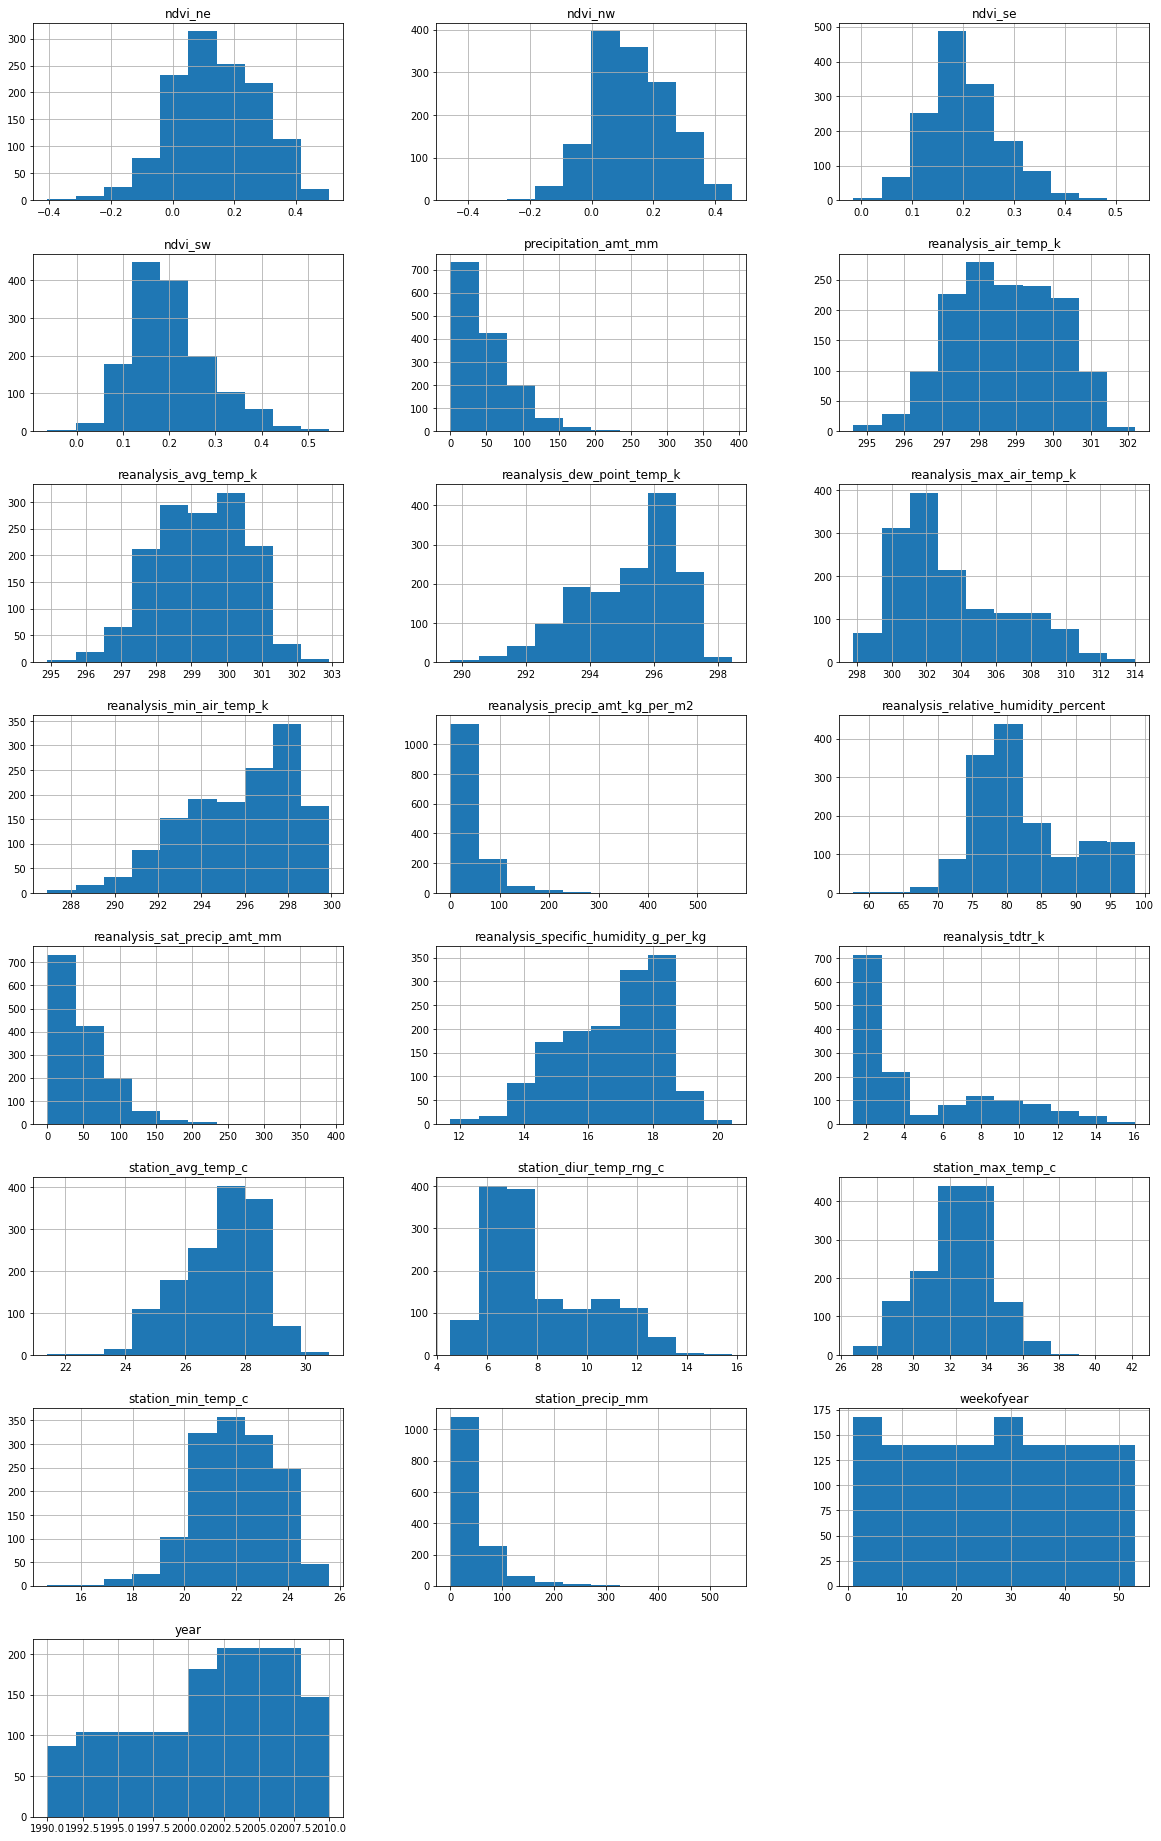

In [9]:
df.hist(figsize=(20,50),layout=(12,3))
plt.show()

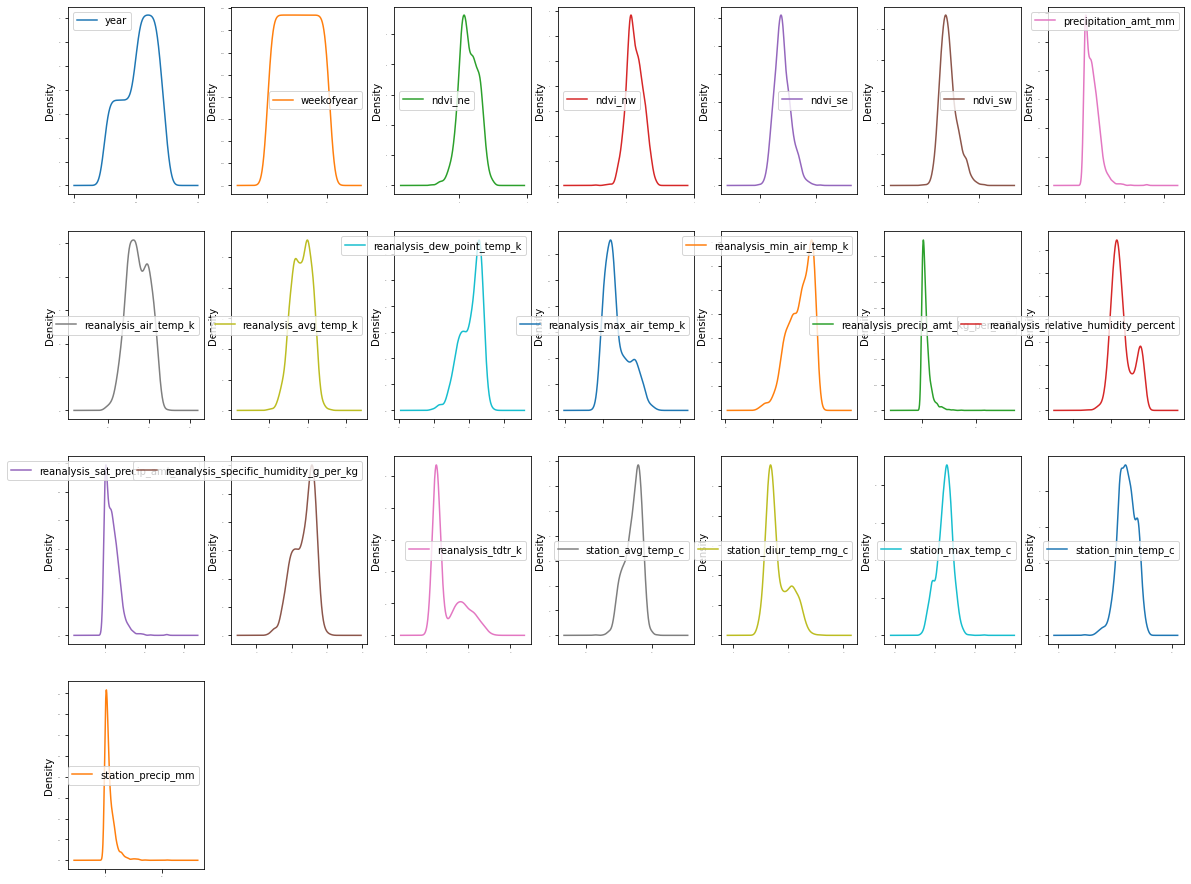

In [10]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=True, fontsize=1,figsize = (20,20))
plt.show()

In [11]:
target.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


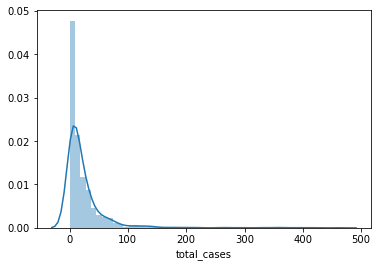

In [12]:
#Exploring the distribution of our y values
sns.distplot(target.total_cases)
plt.show()

In [13]:
target1 = target[target.city=='sj']
target2 = target[target.city=='iq']

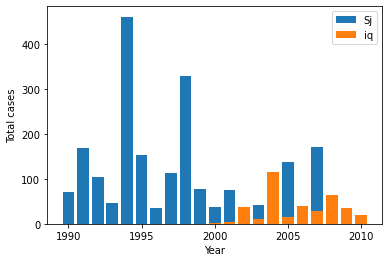

In [14]:
# Exploring the dependent feature for different cities
# using Bar chart 
plt.bar(target1['year'],target1["total_cases"],label = "Sj")
plt.bar(target2['year'],target2["total_cases"],label = "iq")
plt.xlabel("Year")
plt.ylabel("Total cases")
plt.legend()
plt.show()

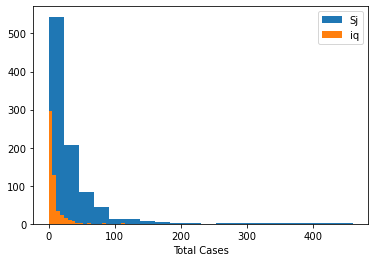

In [15]:
# Exploring the dependent feature for different cities
# using Bar chart 

plt.hist(target1["total_cases"],label = "Sj",bins = 20 )
plt.hist(target2["total_cases"],label = "iq",bins = 20 )
plt.xlabel("Total Cases")
#plt.ylabel("Total cases")
plt.legend()
plt.show()

In [16]:
target.total_cases.mean()

24.67513736263736

In [17]:
target.total_cases.median()

12.0

In [18]:
target.total_cases.std()

43.59600016310749

In [19]:
def yearly_pattern(city, year, ylim = (0,200)):
    df = target[target['city'] == city][target['year'] == year]
    df.plot.bar('weekofyear', 'total_cases', legend=False, ylim = ylim)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


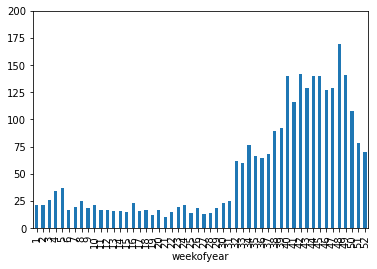

In [20]:
yearly_pattern('sj', 1991)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


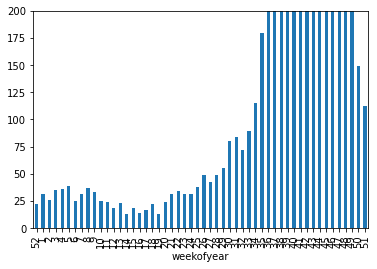

In [21]:
yearly_pattern('sj', 1994)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


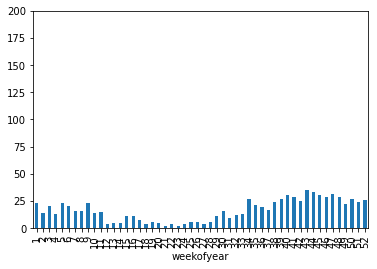

In [22]:
yearly_pattern('sj', 1996)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


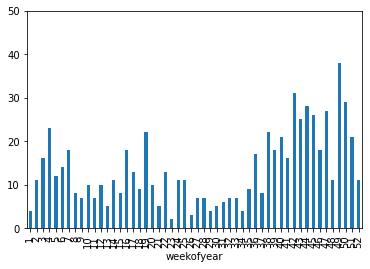

In [23]:
yearly_pattern('iq', 2002, (0,50))

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


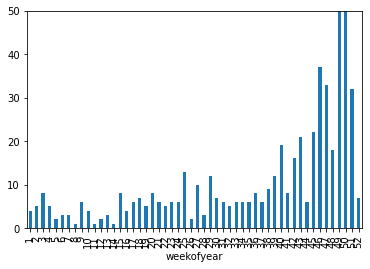

In [24]:
yearly_pattern('iq', 2004, (0,50))

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


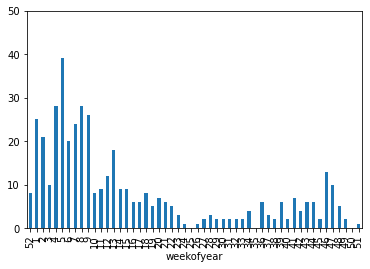

In [25]:
yearly_pattern('iq', 2006, (0,50))

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


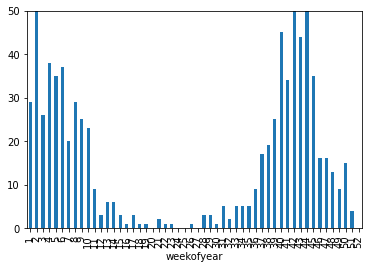

In [26]:
yearly_pattern('iq', 2008, (0,50))

#### By looking at the above graph and plot, We can conclud that the data distribution for two different cities is imbalance.
So We will train our model separately for different Cities

# Feature Engineering

#### Handling Missing Values
During Data Exploration we discovered that the column 'ndvi_ne' has ~20% null vales

In [34]:
def missingvalues(X):
    # remove the column that has ~20% null values, also ranks low on feature importance
    X.drop(['ndvi_ne'], axis=1, inplace=True)
    
    # Filling the rest using linear interpolation
    X.interpolate(inplace=True)

In [35]:
def standardizing(X):
    scaler = StandardScaler()
    X[X.columns] = scaler.fit_transform(X)

In [36]:
def proces(X,y = pd.Series()):
        
    #taking care of missing values
    missingvalues(X)
    
    # Converting the city column into a boolean, since we just have two cities
    sj = X.city == 'sj'
    
    
    # Removing the dates info for now
    X.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1, inplace=True)
    
    # Standardizing the data
    standardizing(X)
    

    #sperating the cities data
    X_sj = X.loc[sj]
    X_iq = X.loc[~sj]

    if y.empty:
        return X_sj, X_iq
    
    #seperating the total no. of cases according to the cities data
    y = y.total_cases    
    y_sj = y.loc[X_sj.index]
    y_iq = y.loc[X_iq.index]
 
    return X_sj,y_sj,X_iq,y_iq
    

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [37]:
X_sj,y_sj,X_iq,y_iq = process(df,target)

In [39]:
print(X_sj.shape,y_sj.shape,X_iq.shape,y_iq.shape)

(936, 20) (936,) (520, 20) (520,)


# Feature Selection

In [40]:
def f_classifier(X,y):
    """ In this func we will calculate the p value of all the feature of the dataset
    """
    #Import the f_classif function and feed in the features and response:
    [f_stat, f_p_value] = f_classif(X, y)
    
    #create a DataFrame of feature names, F-statistics, and p-values, and show it sorted on p-value:
    f_test_df = pd.DataFrame({'Feature':X_sj.columns,
                              'F statistic':f_stat,
                              'p value':f_p_value})
    print(f_test_df.sort_values('p value'))
    
    return f_test_df

In [41]:
def best_feature(X,y):
    """ This func will return the best feature for our model building
    """
    # Import the SelectPercentile class:
     #To select the top 50% of features according to the F-test
    #from sklearn.feature_selection import SelectPercentile
    #Use the .fit method to fit the object on our features and response data, similar to how a model would be fit:
    
    selector = SelectPercentile(f_classif, percentile=50)
    selector.fit(X_sj, y_sj)
    
    #Capture the indices of the selected features in an array named best_feature_ix:
    best_feature_ix = selector.get_support()
    
    #The feature names can be obtained using all but the last element (the response variable name) of our features_response list by indexing with :-1:
    features = X.columns
    
    best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]
    print(best_features)

In [42]:
def get_corr_matrix(X,y):
    #correlation map
    f,ax = plt.subplots(figsize=(14, 14))
    sns.heatmap(X.join(y).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Let's find the p value, the best feature and correlation matrix of our cities seperately 

For San Juan

In [43]:
f_test_df = f_classifier(X_sj,y_sj)

                                  Feature  F statistic   p value
13                      reanalysis_tdtr_k     1.326632  0.012643
8               reanalysis_min_air_temp_k     1.294788  0.020590
7               reanalysis_max_air_temp_k     1.293196  0.021085
4                   reanalysis_air_temp_k     1.277514  0.026544
5                   reanalysis_avg_temp_k     1.250387  0.038941
12  reanalysis_specific_humidity_g_per_kg     1.236918  0.046762
17                     station_min_temp_c     1.206535  0.069387
6             reanalysis_dew_point_temp_k     1.176606  0.099774
10   reanalysis_relative_humidity_percent     1.122821  0.179323
3                    precipitation_amt_mm     1.119865  0.184724
11           reanalysis_sat_precip_amt_mm     1.119865  0.184724
14                     station_avg_temp_c     1.094905  0.234763
16                     station_max_temp_c     1.094477  0.235692
9         reanalysis_precip_amt_kg_per_m2     1.062744  0.310589
18                      s

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [19] are constant.
  UserWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [44]:
best_feature(X_sj,y_sj)

['precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_min_temp_c']


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [19] are constant.
  UserWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


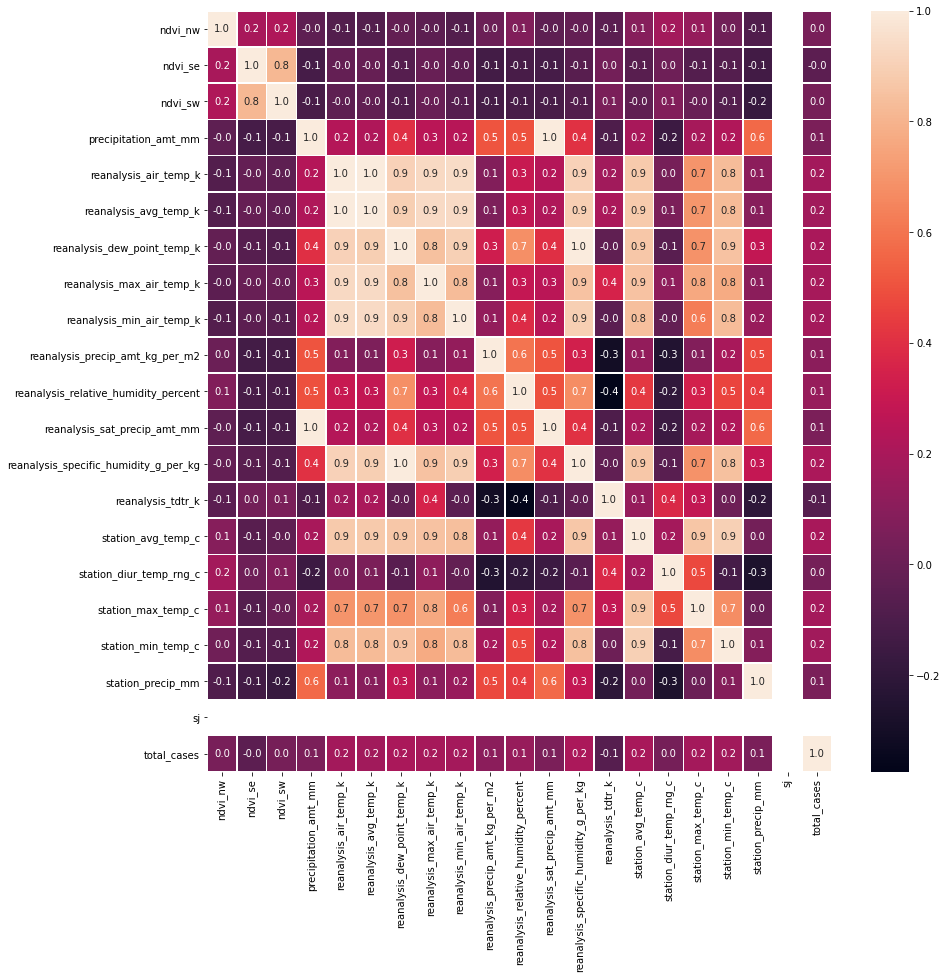

In [45]:
get_corr_matrix(X_sj,y_sj)

For Iquitos

In [46]:
f_test_df = f_classifier(X_iq,y_iq)

                                  Feature  F statistic   p value
12  reanalysis_specific_humidity_g_per_kg     2.345125  0.000005
6             reanalysis_dew_point_temp_k     2.215467  0.000023
15                station_diur_temp_rng_c     1.953351  0.000356
13                      reanalysis_tdtr_k     1.633854  0.007374
17                     station_min_temp_c     1.581301  0.011600
8               reanalysis_min_air_temp_k     1.501397  0.022423
14                     station_avg_temp_c     1.488214  0.024907
10   reanalysis_relative_humidity_percent     1.448819  0.033872
16                     station_max_temp_c     1.421593  0.041642
7               reanalysis_max_air_temp_k     1.290201  0.104727
3                    precipitation_amt_mm     1.281996  0.110451
11           reanalysis_sat_precip_amt_mm     1.281996  0.110451
9         reanalysis_precip_amt_kg_per_m2     1.257552  0.129001
18                      station_precip_mm     1.105893  0.300610
5                   reana

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [19] are constant.
  UserWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [47]:
best_feature(X_iq,y_iq)

['precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_min_temp_c']


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [19] are constant.
  UserWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


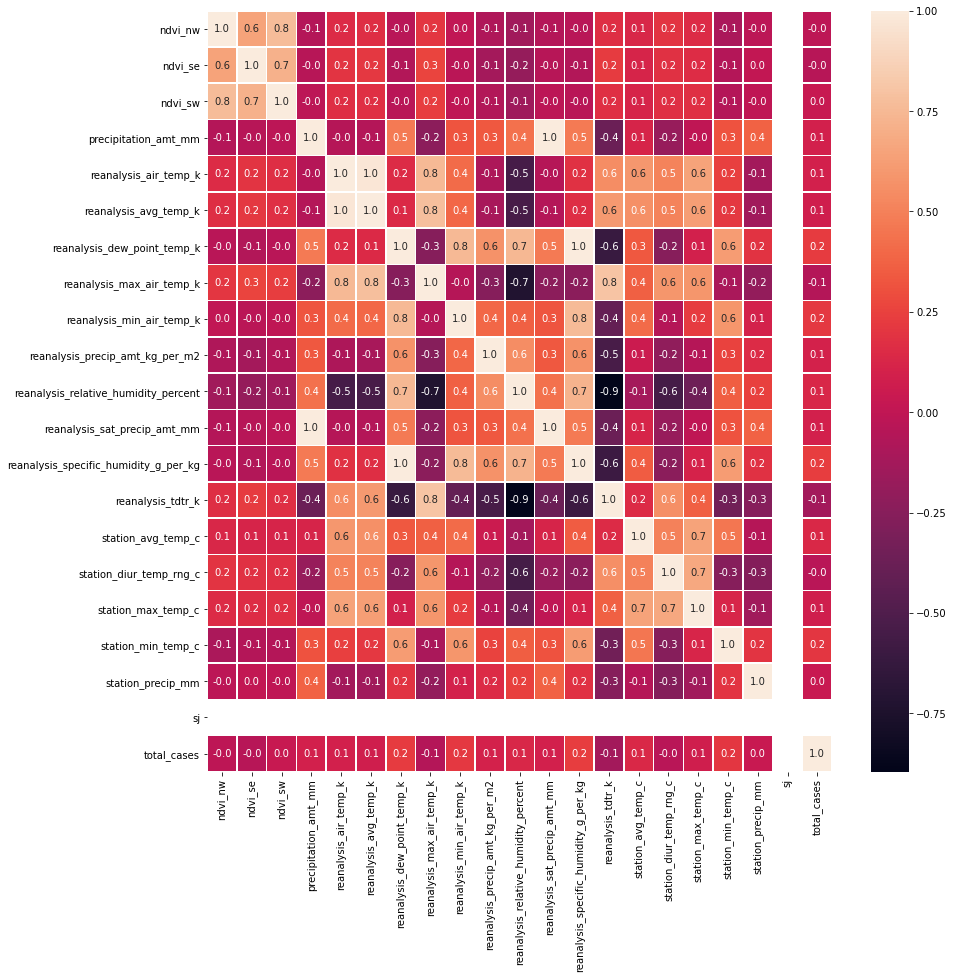

In [48]:
get_corr_matrix(X_iq,y_iq)

In [49]:
def split(X_sj, X_iq, y_sj, y_iq):

    # train and test split
    sj_split_data = train_test_split(X_sj, y_sj, shuffle = False)
    iq_split_data = train_test_split(X_iq, y_iq, shuffle = False)

    return sj_split_data, iq_split_data

In [50]:
(X_sj_train, X_sj_test, Y_sj_train, Y_sj_test), (X_iq_train, X_iq_test, Y_iq_train, Y_iq_test) = split(X_sj, X_iq, y_sj, y_iq)

In [51]:
def random(Y_test, Y_train):
    y_p = np.full(len(Y_test), np.mean(Y_train))
    return mean_absolute_error(Y_test, y_p)

In [52]:
random(Y_sj_test, Y_sj_train)

28.027284681130833

In [53]:
random(Y_iq_test, Y_iq_train)

8.287337278106508

In [54]:
Y_test = Y_sj_test.append(Y_iq_test)
Y_train = Y_sj_train.append(Y_iq_train)

In [55]:
random(Y_test, Y_train)

20.337127158555734

## Create Baseline model on the Training set

In [56]:
models_list = []
models_list.append(('LR', LinearRegression()))
models_list.append(('SVR', SVR()))
models_list.append(('CART', DecisionTreeRegressor()))
models_list.append(('RF', RandomForestRegressor()))
models_list.append(('XGB', XGBRegressor()))
models_list.append(('CBOOST', CatBoostRegressor()))

In [57]:
models_list

[('LR', LinearRegression()),
 ('SVR', SVR()),
 ('CART', DecisionTreeRegressor()),
 ('RF', RandomForestRegressor()),
 ('XGB',
  XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None)),
 ('CBOOST', <catboost.core.CatBoostRegressor at 0x1e78d6015c0>)]

## Evaluation using Cross Validation

In [58]:
num_folds = 10
results_sj= []
results_iq = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results_sj = cross_val_score(model, X_sj_train,Y_sj_train, cv=kfold, scoring=make_scorer(mean_absolute_error))
    cv_results_iq = cross_val_score(model, X_iq_train, Y_iq_train, cv=kfold, scoring=make_scorer(mean_absolute_error))
    end = time.time()
    results_sj.append(cv_results_sj)
    results_iq.append(cv_results_iq)
    names.append(name)
    print( "%s: (sj: %f,iq: %f) (run time: %f)" % (name, cv_results_sj.mean(), cv_results_iq.mean(), end-start))

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: (sj: 35.836504,iq: 6.108038) (run time: 0.271734)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVR: (sj: 27.776616,iq: 5.402782) (run time: 0.813015)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: (sj: 41.701569,iq: 8.274359) (run time: 0.466956)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: (sj: 35.377572,iq: 6.733410) (run time: 24.112604)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: (sj: 34.810964,iq: 6.877724) (run time: 3.433574)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Learning rate set to 0.035959
0:	learn: 58.5484658	total: 80.8ms	remaining: 1m 20s
1:	learn: 58.3623847	total: 86.6ms	remaining: 43.2s
2:	learn: 57.8034254	total: 91.5ms	remaining: 30.4s
3:	learn: 57.5099016	total: 99.3ms	remaining: 24.7s
4:	learn: 57.2735087	total: 104ms	remaining: 20.8s
5:	learn: 57.0132274	total: 110ms	remaining: 18.2s
6:	learn: 56.6393701	total: 116ms	remaining: 16.5s
7:	learn: 56.3267331	total: 122ms	remaining: 15.1s
8:	learn: 56.1704254	total: 128ms	remaining: 14.1s
9:	learn: 55.9799326	total: 135ms	remaining: 13.4s
10:	learn: 55.7903008	total: 141ms	remaining: 12.7s
11:	learn: 55.6117380	total: 146ms	remaining: 12s
12:	learn: 55.1896118	total: 152ms	remaining: 11.6s
13:	learn: 54.6775205	total: 159ms	remaining: 11.2s
14:	learn: 54.4883667	total: 165ms	remaining: 10.8s
15:	learn: 53.7478709	total: 171ms	remaining: 10.5s
16:	learn: 53.2977635	total: 175ms	remaining: 10.1s
17:	learn: 53.1415924	total: 180ms	remaining: 9.83s
18:	learn: 52.9451293	total: 185ms	remain

178:	learn: 28.4573436	total: 800ms	remaining: 3.67s
179:	learn: 28.3921767	total: 803ms	remaining: 3.66s
180:	learn: 28.3342724	total: 806ms	remaining: 3.65s
181:	learn: 28.1741390	total: 809ms	remaining: 3.63s
182:	learn: 28.0938123	total: 811ms	remaining: 3.62s
183:	learn: 27.9439204	total: 814ms	remaining: 3.61s
184:	learn: 27.8800738	total: 817ms	remaining: 3.6s
185:	learn: 27.7739756	total: 819ms	remaining: 3.58s
186:	learn: 27.7201258	total: 822ms	remaining: 3.57s
187:	learn: 27.6510367	total: 826ms	remaining: 3.57s
188:	learn: 27.5800104	total: 830ms	remaining: 3.56s
189:	learn: 27.5319302	total: 833ms	remaining: 3.55s
190:	learn: 27.4925433	total: 838ms	remaining: 3.55s
191:	learn: 27.4154215	total: 842ms	remaining: 3.54s
192:	learn: 27.3643457	total: 846ms	remaining: 3.54s
193:	learn: 27.2197207	total: 850ms	remaining: 3.53s
194:	learn: 27.1689481	total: 854ms	remaining: 3.52s
195:	learn: 27.0919950	total: 858ms	remaining: 3.52s
196:	learn: 27.0445111	total: 863ms	remaining: 

337:	learn: 19.8022441	total: 1.44s	remaining: 2.83s
338:	learn: 19.7696115	total: 1.45s	remaining: 2.82s
339:	learn: 19.7236166	total: 1.45s	remaining: 2.82s
340:	learn: 19.6793380	total: 1.46s	remaining: 2.81s
341:	learn: 19.6321877	total: 1.46s	remaining: 2.81s
342:	learn: 19.5412768	total: 1.47s	remaining: 2.81s
343:	learn: 19.5058617	total: 1.47s	remaining: 2.8s
344:	learn: 19.4563623	total: 1.47s	remaining: 2.79s
345:	learn: 19.4159107	total: 1.48s	remaining: 2.79s
346:	learn: 19.3897613	total: 1.48s	remaining: 2.78s
347:	learn: 19.3308752	total: 1.48s	remaining: 2.78s
348:	learn: 19.3194823	total: 1.49s	remaining: 2.77s
349:	learn: 19.2837985	total: 1.49s	remaining: 2.77s
350:	learn: 19.2465905	total: 1.49s	remaining: 2.76s
351:	learn: 19.1701052	total: 1.5s	remaining: 2.75s
352:	learn: 19.1266941	total: 1.5s	remaining: 2.75s
353:	learn: 19.0838588	total: 1.5s	remaining: 2.74s
354:	learn: 19.0428960	total: 1.5s	remaining: 2.73s
355:	learn: 19.0006770	total: 1.51s	remaining: 2.73

503:	learn: 14.3332358	total: 2.1s	remaining: 2.07s
504:	learn: 14.3072127	total: 2.1s	remaining: 2.06s
505:	learn: 14.2619602	total: 2.11s	remaining: 2.06s
506:	learn: 14.2436432	total: 2.11s	remaining: 2.05s
507:	learn: 14.2302152	total: 2.11s	remaining: 2.05s
508:	learn: 14.2035093	total: 2.12s	remaining: 2.04s
509:	learn: 14.1897644	total: 2.12s	remaining: 2.04s
510:	learn: 14.1651041	total: 2.12s	remaining: 2.03s
511:	learn: 14.1585652	total: 2.13s	remaining: 2.03s
512:	learn: 14.1306725	total: 2.13s	remaining: 2.02s
513:	learn: 14.0801076	total: 2.13s	remaining: 2.02s
514:	learn: 14.0628479	total: 2.14s	remaining: 2.01s
515:	learn: 14.0145175	total: 2.14s	remaining: 2.01s
516:	learn: 13.9853546	total: 2.14s	remaining: 2s
517:	learn: 13.9786219	total: 2.15s	remaining: 2s
518:	learn: 13.9465744	total: 2.15s	remaining: 2s
519:	learn: 13.9214312	total: 2.16s	remaining: 1.99s
520:	learn: 13.8954421	total: 2.16s	remaining: 1.99s
521:	learn: 13.8748188	total: 2.16s	remaining: 1.98s
522:

661:	learn: 10.9068254	total: 2.76s	remaining: 1.41s
662:	learn: 10.8813064	total: 2.76s	remaining: 1.4s
663:	learn: 10.8672954	total: 2.77s	remaining: 1.4s
664:	learn: 10.8528686	total: 2.77s	remaining: 1.4s
665:	learn: 10.8376541	total: 2.78s	remaining: 1.39s
666:	learn: 10.8192388	total: 2.78s	remaining: 1.39s
667:	learn: 10.8014310	total: 2.78s	remaining: 1.38s
668:	learn: 10.7838576	total: 2.79s	remaining: 1.38s
669:	learn: 10.7545616	total: 2.79s	remaining: 1.38s
670:	learn: 10.7417001	total: 2.8s	remaining: 1.37s
671:	learn: 10.7227665	total: 2.8s	remaining: 1.37s
672:	learn: 10.6949218	total: 2.81s	remaining: 1.36s
673:	learn: 10.6922327	total: 2.81s	remaining: 1.36s
674:	learn: 10.6742489	total: 2.81s	remaining: 1.35s
675:	learn: 10.6526185	total: 2.82s	remaining: 1.35s
676:	learn: 10.6471749	total: 2.82s	remaining: 1.35s
677:	learn: 10.6227704	total: 2.83s	remaining: 1.34s
678:	learn: 10.6097026	total: 2.83s	remaining: 1.34s
679:	learn: 10.5929026	total: 2.84s	remaining: 1.33

829:	learn: 8.4678716	total: 3.41s	remaining: 699ms
830:	learn: 8.4653933	total: 3.42s	remaining: 695ms
831:	learn: 8.4560802	total: 3.42s	remaining: 691ms
832:	learn: 8.4400369	total: 3.42s	remaining: 687ms
833:	learn: 8.4375924	total: 3.43s	remaining: 682ms
834:	learn: 8.4211601	total: 3.43s	remaining: 678ms
835:	learn: 8.4061825	total: 3.44s	remaining: 674ms
836:	learn: 8.3937733	total: 3.44s	remaining: 670ms
837:	learn: 8.3882324	total: 3.44s	remaining: 665ms
838:	learn: 8.3824941	total: 3.44s	remaining: 661ms
839:	learn: 8.3635040	total: 3.45s	remaining: 657ms
840:	learn: 8.3500432	total: 3.45s	remaining: 652ms
841:	learn: 8.3482244	total: 3.45s	remaining: 648ms
842:	learn: 8.3357791	total: 3.46s	remaining: 644ms
843:	learn: 8.3237880	total: 3.46s	remaining: 640ms
844:	learn: 8.3154771	total: 3.46s	remaining: 636ms
845:	learn: 8.3065037	total: 3.47s	remaining: 632ms
846:	learn: 8.2853905	total: 3.47s	remaining: 627ms
847:	learn: 8.2643563	total: 3.48s	remaining: 623ms
848:	learn: 

996:	learn: 6.7021749	total: 4.06s	remaining: 12.2ms
997:	learn: 6.6908963	total: 4.07s	remaining: 8.15ms
998:	learn: 6.6814032	total: 4.07s	remaining: 4.08ms
999:	learn: 6.6700736	total: 4.08s	remaining: 0us
Learning rate set to 0.035959
0:	learn: 56.9010580	total: 10.5ms	remaining: 10.5s
1:	learn: 56.5627977	total: 15.8ms	remaining: 7.89s
2:	learn: 56.0643247	total: 22.6ms	remaining: 7.51s
3:	learn: 55.8205798	total: 28.6ms	remaining: 7.12s
4:	learn: 55.5923917	total: 33.7ms	remaining: 6.71s
5:	learn: 55.1141796	total: 38.7ms	remaining: 6.41s
6:	learn: 54.6322172	total: 44.2ms	remaining: 6.27s
7:	learn: 54.4952589	total: 50.3ms	remaining: 6.23s
8:	learn: 54.3105825	total: 55.4ms	remaining: 6.1s
9:	learn: 54.0743935	total: 59.9ms	remaining: 5.93s
10:	learn: 53.8159343	total: 65ms	remaining: 5.84s
11:	learn: 53.5221761	total: 70.5ms	remaining: 5.8s
12:	learn: 53.2415042	total: 75.6ms	remaining: 5.74s
13:	learn: 52.7258128	total: 80.5ms	remaining: 5.67s
14:	learn: 52.4418540	total: 85.5

161:	learn: 26.2963760	total: 647ms	remaining: 3.35s
162:	learn: 26.2377208	total: 651ms	remaining: 3.34s
163:	learn: 26.1995678	total: 655ms	remaining: 3.34s
164:	learn: 26.1671250	total: 659ms	remaining: 3.34s
165:	learn: 26.1299168	total: 663ms	remaining: 3.33s
166:	learn: 26.0592153	total: 666ms	remaining: 3.32s
167:	learn: 26.0068103	total: 669ms	remaining: 3.31s
168:	learn: 25.8787398	total: 672ms	remaining: 3.31s
169:	learn: 25.8282718	total: 675ms	remaining: 3.3s
170:	learn: 25.7495133	total: 678ms	remaining: 3.29s
171:	learn: 25.6838249	total: 682ms	remaining: 3.28s
172:	learn: 25.6633601	total: 686ms	remaining: 3.28s
173:	learn: 25.5662732	total: 688ms	remaining: 3.27s
174:	learn: 25.4957242	total: 691ms	remaining: 3.26s
175:	learn: 25.4605704	total: 695ms	remaining: 3.25s
176:	learn: 25.3949769	total: 698ms	remaining: 3.25s
177:	learn: 25.3573263	total: 702ms	remaining: 3.24s
178:	learn: 25.3275297	total: 706ms	remaining: 3.24s
179:	learn: 25.2570922	total: 711ms	remaining: 

350:	learn: 16.3786331	total: 1.48s	remaining: 2.73s
351:	learn: 16.3121476	total: 1.48s	remaining: 2.73s
352:	learn: 16.2667114	total: 1.49s	remaining: 2.72s
353:	learn: 16.2294602	total: 1.49s	remaining: 2.72s
354:	learn: 16.1929603	total: 1.5s	remaining: 2.72s
355:	learn: 16.1743659	total: 1.5s	remaining: 2.71s
356:	learn: 16.1331775	total: 1.5s	remaining: 2.71s
357:	learn: 16.1174742	total: 1.51s	remaining: 2.71s
358:	learn: 16.0850238	total: 1.51s	remaining: 2.7s
359:	learn: 16.0538258	total: 1.52s	remaining: 2.71s
360:	learn: 16.0188548	total: 1.53s	remaining: 2.7s
361:	learn: 15.9729754	total: 1.53s	remaining: 2.7s
362:	learn: 15.9432349	total: 1.53s	remaining: 2.69s
363:	learn: 15.9121008	total: 1.54s	remaining: 2.69s
364:	learn: 15.8718865	total: 1.54s	remaining: 2.68s
365:	learn: 15.8479649	total: 1.55s	remaining: 2.68s
366:	learn: 15.8180912	total: 1.55s	remaining: 2.67s
367:	learn: 15.7666960	total: 1.55s	remaining: 2.67s
368:	learn: 15.7461215	total: 1.56s	remaining: 2.66s

545:	learn: 11.1719552	total: 2.3s	remaining: 1.91s
546:	learn: 11.1538126	total: 2.31s	remaining: 1.91s
547:	learn: 11.1303530	total: 2.31s	remaining: 1.91s
548:	learn: 11.1197671	total: 2.31s	remaining: 1.9s
549:	learn: 11.1017848	total: 2.32s	remaining: 1.9s
550:	learn: 11.0857148	total: 2.32s	remaining: 1.89s
551:	learn: 11.0635381	total: 2.32s	remaining: 1.89s
552:	learn: 11.0383316	total: 2.33s	remaining: 1.88s
553:	learn: 11.0168305	total: 2.33s	remaining: 1.88s
554:	learn: 11.0042655	total: 2.33s	remaining: 1.87s
555:	learn: 10.9908584	total: 2.34s	remaining: 1.86s
556:	learn: 10.9684564	total: 2.34s	remaining: 1.86s
557:	learn: 10.9527702	total: 2.34s	remaining: 1.86s
558:	learn: 10.9243970	total: 2.35s	remaining: 1.85s
559:	learn: 10.8956394	total: 2.35s	remaining: 1.85s
560:	learn: 10.8667257	total: 2.36s	remaining: 1.84s
561:	learn: 10.8559674	total: 2.36s	remaining: 1.84s
562:	learn: 10.8212260	total: 2.36s	remaining: 1.83s
563:	learn: 10.8073663	total: 2.37s	remaining: 1.

735:	learn: 8.2260238	total: 3.13s	remaining: 1.12s
736:	learn: 8.2073649	total: 3.14s	remaining: 1.12s
737:	learn: 8.1911986	total: 3.14s	remaining: 1.11s
738:	learn: 8.1779131	total: 3.14s	remaining: 1.11s
739:	learn: 8.1557045	total: 3.15s	remaining: 1.11s
740:	learn: 8.1293577	total: 3.15s	remaining: 1.1s
741:	learn: 8.1219549	total: 3.15s	remaining: 1.1s
742:	learn: 8.1119447	total: 3.16s	remaining: 1.09s
743:	learn: 8.1009287	total: 3.16s	remaining: 1.09s
744:	learn: 8.0925839	total: 3.16s	remaining: 1.08s
745:	learn: 8.0727117	total: 3.17s	remaining: 1.08s
746:	learn: 8.0569336	total: 3.17s	remaining: 1.07s
747:	learn: 8.0457978	total: 3.18s	remaining: 1.07s
748:	learn: 8.0344904	total: 3.18s	remaining: 1.07s
749:	learn: 8.0280550	total: 3.19s	remaining: 1.06s
750:	learn: 8.0140671	total: 3.19s	remaining: 1.06s
751:	learn: 7.9998628	total: 3.2s	remaining: 1.05s
752:	learn: 7.9860579	total: 3.2s	remaining: 1.05s
753:	learn: 7.9741779	total: 3.21s	remaining: 1.04s
754:	learn: 7.97

923:	learn: 6.1265007	total: 3.96s	remaining: 326ms
924:	learn: 6.1191091	total: 3.97s	remaining: 322ms
925:	learn: 6.1111408	total: 3.97s	remaining: 317ms
926:	learn: 6.0994584	total: 3.98s	remaining: 313ms
927:	learn: 6.0900398	total: 3.98s	remaining: 309ms
928:	learn: 6.0812151	total: 3.98s	remaining: 305ms
929:	learn: 6.0740461	total: 3.99s	remaining: 300ms
930:	learn: 6.0683085	total: 3.99s	remaining: 296ms
931:	learn: 6.0591258	total: 4s	remaining: 292ms
932:	learn: 6.0451996	total: 4s	remaining: 287ms
933:	learn: 6.0336412	total: 4s	remaining: 283ms
934:	learn: 6.0315177	total: 4.01s	remaining: 279ms
935:	learn: 6.0251381	total: 4.01s	remaining: 274ms
936:	learn: 6.0241553	total: 4.02s	remaining: 270ms
937:	learn: 6.0175419	total: 4.02s	remaining: 266ms
938:	learn: 6.0104704	total: 4.03s	remaining: 262ms
939:	learn: 5.9962123	total: 4.03s	remaining: 257ms
940:	learn: 5.9857880	total: 4.04s	remaining: 253ms
941:	learn: 5.9777403	total: 4.04s	remaining: 249ms
942:	learn: 5.9600643

112:	learn: 33.8430622	total: 501ms	remaining: 3.93s
113:	learn: 33.7914187	total: 505ms	remaining: 3.92s
114:	learn: 33.6748453	total: 509ms	remaining: 3.91s
115:	learn: 33.6076789	total: 512ms	remaining: 3.9s
116:	learn: 33.5591401	total: 516ms	remaining: 3.89s
117:	learn: 33.4774672	total: 519ms	remaining: 3.88s
118:	learn: 33.3152876	total: 522ms	remaining: 3.87s
119:	learn: 33.2441846	total: 525ms	remaining: 3.85s
120:	learn: 33.1771897	total: 529ms	remaining: 3.84s
121:	learn: 33.1176779	total: 534ms	remaining: 3.84s
122:	learn: 32.9697348	total: 539ms	remaining: 3.84s
123:	learn: 32.8492824	total: 544ms	remaining: 3.85s
124:	learn: 32.7165934	total: 549ms	remaining: 3.84s
125:	learn: 32.5590142	total: 554ms	remaining: 3.84s
126:	learn: 32.5149391	total: 558ms	remaining: 3.83s
127:	learn: 32.4577956	total: 563ms	remaining: 3.83s
128:	learn: 32.3948570	total: 567ms	remaining: 3.83s
129:	learn: 32.2541140	total: 572ms	remaining: 3.83s
130:	learn: 32.1389903	total: 576ms	remaining: 

302:	learn: 22.2213904	total: 1.33s	remaining: 3.06s
303:	learn: 22.1752492	total: 1.33s	remaining: 3.05s
304:	learn: 22.1030661	total: 1.34s	remaining: 3.05s
305:	learn: 22.0450545	total: 1.34s	remaining: 3.04s
306:	learn: 21.9997755	total: 1.34s	remaining: 3.04s
307:	learn: 21.9498447	total: 1.35s	remaining: 3.03s
308:	learn: 21.9151875	total: 1.35s	remaining: 3.03s
309:	learn: 21.8389032	total: 1.36s	remaining: 3.02s
310:	learn: 21.7814050	total: 1.36s	remaining: 3.02s
311:	learn: 21.7098760	total: 1.36s	remaining: 3.01s
312:	learn: 21.6576889	total: 1.37s	remaining: 3.01s
313:	learn: 21.6247418	total: 1.38s	remaining: 3.01s
314:	learn: 21.6024644	total: 1.38s	remaining: 3s
315:	learn: 21.5633644	total: 1.39s	remaining: 3s
316:	learn: 21.5347534	total: 1.39s	remaining: 3s
317:	learn: 21.5151987	total: 1.4s	remaining: 2.99s
318:	learn: 21.4664387	total: 1.4s	remaining: 2.99s
319:	learn: 21.4464956	total: 1.41s	remaining: 2.99s
320:	learn: 21.4182818	total: 1.41s	remaining: 2.98s
321:

493:	learn: 15.3358874	total: 2.15s	remaining: 2.21s
494:	learn: 15.2940281	total: 2.16s	remaining: 2.2s
495:	learn: 15.2695164	total: 2.16s	remaining: 2.2s
496:	learn: 15.2358273	total: 2.17s	remaining: 2.19s
497:	learn: 15.2165688	total: 2.17s	remaining: 2.19s
498:	learn: 15.1799147	total: 2.18s	remaining: 2.19s
499:	learn: 15.1634960	total: 2.18s	remaining: 2.18s
500:	learn: 15.1623367	total: 2.19s	remaining: 2.18s
501:	learn: 15.1435139	total: 2.19s	remaining: 2.17s
502:	learn: 15.0895529	total: 2.19s	remaining: 2.17s
503:	learn: 15.0635298	total: 2.2s	remaining: 2.16s
504:	learn: 15.0489159	total: 2.2s	remaining: 2.16s
505:	learn: 15.0223069	total: 2.2s	remaining: 2.15s
506:	learn: 14.9987787	total: 2.21s	remaining: 2.14s
507:	learn: 14.9433435	total: 2.21s	remaining: 2.14s
508:	learn: 14.9203698	total: 2.21s	remaining: 2.13s
509:	learn: 14.9074936	total: 2.21s	remaining: 2.13s
510:	learn: 14.8847465	total: 2.22s	remaining: 2.12s
511:	learn: 14.8476480	total: 2.22s	remaining: 2.12

688:	learn: 11.1916317	total: 2.99s	remaining: 1.35s
689:	learn: 11.1794061	total: 2.99s	remaining: 1.34s
690:	learn: 11.1685168	total: 3s	remaining: 1.34s
691:	learn: 11.1563603	total: 3s	remaining: 1.34s
692:	learn: 11.1340969	total: 3.01s	remaining: 1.33s
693:	learn: 11.1196204	total: 3.01s	remaining: 1.33s
694:	learn: 11.0851007	total: 3.02s	remaining: 1.32s
695:	learn: 11.0603682	total: 3.02s	remaining: 1.32s
696:	learn: 11.0391504	total: 3.02s	remaining: 1.31s
697:	learn: 11.0198478	total: 3.03s	remaining: 1.31s
698:	learn: 11.0023538	total: 3.03s	remaining: 1.31s
699:	learn: 10.9804965	total: 3.04s	remaining: 1.3s
700:	learn: 10.9515600	total: 3.04s	remaining: 1.3s
701:	learn: 10.9246238	total: 3.05s	remaining: 1.29s
702:	learn: 10.9065950	total: 3.05s	remaining: 1.29s
703:	learn: 10.8980702	total: 3.06s	remaining: 1.28s
704:	learn: 10.8691739	total: 3.06s	remaining: 1.28s
705:	learn: 10.8583815	total: 3.06s	remaining: 1.27s
706:	learn: 10.8397236	total: 3.07s	remaining: 1.27s
7

868:	learn: 8.6220210	total: 3.77s	remaining: 568ms
869:	learn: 8.6118886	total: 3.77s	remaining: 564ms
870:	learn: 8.5976205	total: 3.78s	remaining: 560ms
871:	learn: 8.5900754	total: 3.78s	remaining: 555ms
872:	learn: 8.5815853	total: 3.78s	remaining: 551ms
873:	learn: 8.5723026	total: 3.79s	remaining: 546ms
874:	learn: 8.5616698	total: 3.79s	remaining: 541ms
875:	learn: 8.5532717	total: 3.79s	remaining: 537ms
876:	learn: 8.5431759	total: 3.8s	remaining: 532ms
877:	learn: 8.5316638	total: 3.8s	remaining: 528ms
878:	learn: 8.5274521	total: 3.8s	remaining: 524ms
879:	learn: 8.5094155	total: 3.81s	remaining: 519ms
880:	learn: 8.5075534	total: 3.81s	remaining: 515ms
881:	learn: 8.4883103	total: 3.81s	remaining: 510ms
882:	learn: 8.4757500	total: 3.82s	remaining: 506ms
883:	learn: 8.4665722	total: 3.82s	remaining: 502ms
884:	learn: 8.4523021	total: 3.83s	remaining: 497ms
885:	learn: 8.4499175	total: 3.83s	remaining: 493ms
886:	learn: 8.4382023	total: 3.84s	remaining: 489ms
887:	learn: 8.4

31:	learn: 30.3368244	total: 169ms	remaining: 5.11s
32:	learn: 30.2135606	total: 174ms	remaining: 5.09s
33:	learn: 30.0803586	total: 179ms	remaining: 5.09s
34:	learn: 29.9568303	total: 184ms	remaining: 5.08s
35:	learn: 29.8403560	total: 189ms	remaining: 5.06s
36:	learn: 29.7539490	total: 193ms	remaining: 5.04s
37:	learn: 29.6369116	total: 199ms	remaining: 5.03s
38:	learn: 29.5036562	total: 203ms	remaining: 4.99s
39:	learn: 29.3906155	total: 207ms	remaining: 4.96s
40:	learn: 29.2847836	total: 211ms	remaining: 4.94s
41:	learn: 29.1879019	total: 215ms	remaining: 4.91s
42:	learn: 29.0820265	total: 220ms	remaining: 4.9s
43:	learn: 28.9731870	total: 225ms	remaining: 4.88s
44:	learn: 28.8691653	total: 229ms	remaining: 4.86s
45:	learn: 28.7605377	total: 234ms	remaining: 4.84s
46:	learn: 28.7152868	total: 238ms	remaining: 4.83s
47:	learn: 28.6305140	total: 242ms	remaining: 4.8s
48:	learn: 28.5525354	total: 247ms	remaining: 4.79s
49:	learn: 28.4655152	total: 252ms	remaining: 4.78s
50:	learn: 28.

217:	learn: 19.3760397	total: 997ms	remaining: 3.58s
218:	learn: 19.3579309	total: 1s	remaining: 3.57s
219:	learn: 19.3058720	total: 1.01s	remaining: 3.57s
220:	learn: 19.2654931	total: 1.01s	remaining: 3.56s
221:	learn: 19.2463235	total: 1.01s	remaining: 3.55s
222:	learn: 19.1850323	total: 1.02s	remaining: 3.55s
223:	learn: 19.1510289	total: 1.02s	remaining: 3.54s
224:	learn: 19.0979873	total: 1.02s	remaining: 3.53s
225:	learn: 19.0196897	total: 1.03s	remaining: 3.52s
226:	learn: 18.9676806	total: 1.03s	remaining: 3.51s
227:	learn: 18.9362654	total: 1.03s	remaining: 3.5s
228:	learn: 18.8956625	total: 1.04s	remaining: 3.49s
229:	learn: 18.8601485	total: 1.04s	remaining: 3.48s
230:	learn: 18.8048413	total: 1.04s	remaining: 3.47s
231:	learn: 18.7540479	total: 1.05s	remaining: 3.47s
232:	learn: 18.6901002	total: 1.05s	remaining: 3.46s
233:	learn: 18.6619289	total: 1.06s	remaining: 3.46s
234:	learn: 18.6347973	total: 1.06s	remaining: 3.45s
235:	learn: 18.5915750	total: 1.06s	remaining: 3.4

408:	learn: 13.2067737	total: 1.83s	remaining: 2.65s
409:	learn: 13.1652604	total: 1.84s	remaining: 2.65s
410:	learn: 13.1408796	total: 1.85s	remaining: 2.65s
411:	learn: 13.1107372	total: 1.85s	remaining: 2.64s
412:	learn: 13.1078055	total: 1.85s	remaining: 2.64s
413:	learn: 13.0937845	total: 1.86s	remaining: 2.63s
414:	learn: 13.0588162	total: 1.86s	remaining: 2.63s
415:	learn: 13.0235370	total: 1.86s	remaining: 2.62s
416:	learn: 12.9911882	total: 1.87s	remaining: 2.61s
417:	learn: 12.9797597	total: 1.87s	remaining: 2.61s
418:	learn: 12.9291329	total: 1.88s	remaining: 2.6s
419:	learn: 12.9100008	total: 1.88s	remaining: 2.6s
420:	learn: 12.8902824	total: 1.88s	remaining: 2.59s
421:	learn: 12.8634233	total: 1.89s	remaining: 2.58s
422:	learn: 12.8387888	total: 1.89s	remaining: 2.58s
423:	learn: 12.8162829	total: 1.89s	remaining: 2.57s
424:	learn: 12.7985175	total: 1.89s	remaining: 2.56s
425:	learn: 12.7519532	total: 1.9s	remaining: 2.56s
426:	learn: 12.7297658	total: 1.9s	remaining: 2.5

565:	learn: 10.0748629	total: 2.45s	remaining: 1.88s
566:	learn: 10.0527280	total: 2.46s	remaining: 1.88s
567:	learn: 10.0418122	total: 2.46s	remaining: 1.87s
568:	learn: 10.0311391	total: 2.46s	remaining: 1.86s
569:	learn: 10.0258045	total: 2.47s	remaining: 1.86s
570:	learn: 9.9936621	total: 2.47s	remaining: 1.85s
571:	learn: 9.9728445	total: 2.47s	remaining: 1.85s
572:	learn: 9.9533463	total: 2.48s	remaining: 1.84s
573:	learn: 9.9474903	total: 2.48s	remaining: 1.84s
574:	learn: 9.9216405	total: 2.48s	remaining: 1.83s
575:	learn: 9.9031964	total: 2.48s	remaining: 1.83s
576:	learn: 9.8908102	total: 2.49s	remaining: 1.82s
577:	learn: 9.8869412	total: 2.49s	remaining: 1.82s
578:	learn: 9.8737659	total: 2.49s	remaining: 1.81s
579:	learn: 9.8572633	total: 2.5s	remaining: 1.81s
580:	learn: 9.8557533	total: 2.5s	remaining: 1.8s
581:	learn: 9.8524654	total: 2.5s	remaining: 1.8s
582:	learn: 9.8290318	total: 2.51s	remaining: 1.79s
583:	learn: 9.8190589	total: 2.51s	remaining: 1.79s
584:	learn: 

738:	learn: 7.7112297	total: 3.11s	remaining: 1.1s
739:	learn: 7.6857829	total: 3.11s	remaining: 1.09s
740:	learn: 7.6730159	total: 3.12s	remaining: 1.09s
741:	learn: 7.6626311	total: 3.12s	remaining: 1.08s
742:	learn: 7.6596625	total: 3.13s	remaining: 1.08s
743:	learn: 7.6475218	total: 3.13s	remaining: 1.08s
744:	learn: 7.6456487	total: 3.13s	remaining: 1.07s
745:	learn: 7.6246724	total: 3.14s	remaining: 1.07s
746:	learn: 7.6043028	total: 3.14s	remaining: 1.06s
747:	learn: 7.5952041	total: 3.14s	remaining: 1.06s
748:	learn: 7.5870948	total: 3.15s	remaining: 1.05s
749:	learn: 7.5788952	total: 3.15s	remaining: 1.05s
750:	learn: 7.5693615	total: 3.15s	remaining: 1.04s
751:	learn: 7.5685081	total: 3.16s	remaining: 1.04s
752:	learn: 7.5522793	total: 3.16s	remaining: 1.04s
753:	learn: 7.5410956	total: 3.16s	remaining: 1.03s
754:	learn: 7.5313954	total: 3.17s	remaining: 1.03s
755:	learn: 7.5201502	total: 3.17s	remaining: 1.02s
756:	learn: 7.5045742	total: 3.17s	remaining: 1.02s
757:	learn: 7

932:	learn: 5.9432182	total: 3.94s	remaining: 283ms
933:	learn: 5.9403522	total: 3.94s	remaining: 279ms
934:	learn: 5.9333297	total: 3.95s	remaining: 274ms
935:	learn: 5.9226501	total: 3.95s	remaining: 270ms
936:	learn: 5.9081923	total: 3.95s	remaining: 266ms
937:	learn: 5.8977659	total: 3.96s	remaining: 262ms
938:	learn: 5.8948165	total: 3.96s	remaining: 257ms
939:	learn: 5.8844887	total: 3.96s	remaining: 253ms
940:	learn: 5.8773846	total: 3.96s	remaining: 249ms
941:	learn: 5.8653116	total: 3.97s	remaining: 244ms
942:	learn: 5.8609709	total: 3.97s	remaining: 240ms
943:	learn: 5.8521193	total: 3.98s	remaining: 236ms
944:	learn: 5.8397922	total: 3.98s	remaining: 232ms
945:	learn: 5.8362916	total: 3.99s	remaining: 228ms
946:	learn: 5.8267607	total: 3.99s	remaining: 223ms
947:	learn: 5.8254321	total: 4s	remaining: 219ms
948:	learn: 5.8159659	total: 4s	remaining: 215ms
949:	learn: 5.8074194	total: 4s	remaining: 211ms
950:	learn: 5.7974354	total: 4.01s	remaining: 207ms
951:	learn: 5.7934775

104:	learn: 33.9565323	total: 487ms	remaining: 4.15s
105:	learn: 33.8828385	total: 492ms	remaining: 4.15s
106:	learn: 33.7575772	total: 496ms	remaining: 4.14s
107:	learn: 33.6876787	total: 500ms	remaining: 4.13s
108:	learn: 33.6230862	total: 504ms	remaining: 4.12s
109:	learn: 33.4674590	total: 507ms	remaining: 4.1s
110:	learn: 33.4186366	total: 511ms	remaining: 4.09s
111:	learn: 33.3496300	total: 514ms	remaining: 4.07s
112:	learn: 33.2752674	total: 517ms	remaining: 4.05s
113:	learn: 33.2277272	total: 519ms	remaining: 4.04s
114:	learn: 33.1779887	total: 523ms	remaining: 4.03s
115:	learn: 33.1054623	total: 527ms	remaining: 4.02s
116:	learn: 33.0437611	total: 531ms	remaining: 4s
117:	learn: 32.9915660	total: 534ms	remaining: 3.99s
118:	learn: 32.8956559	total: 539ms	remaining: 3.99s
119:	learn: 32.8481228	total: 543ms	remaining: 3.98s
120:	learn: 32.7945040	total: 548ms	remaining: 3.98s
121:	learn: 32.7486063	total: 552ms	remaining: 3.98s
122:	learn: 32.6714448	total: 557ms	remaining: 3.9

266:	learn: 22.8592277	total: 1.15s	remaining: 3.15s
267:	learn: 22.8293017	total: 1.15s	remaining: 3.14s
268:	learn: 22.7318772	total: 1.15s	remaining: 3.14s
269:	learn: 22.6771671	total: 1.16s	remaining: 3.13s
270:	learn: 22.6402270	total: 1.16s	remaining: 3.12s
271:	learn: 22.5970311	total: 1.16s	remaining: 3.11s
272:	learn: 22.5623330	total: 1.17s	remaining: 3.1s
273:	learn: 22.5178995	total: 1.17s	remaining: 3.1s
274:	learn: 22.4758276	total: 1.17s	remaining: 3.09s
275:	learn: 22.4057118	total: 1.17s	remaining: 3.08s
276:	learn: 22.3845986	total: 1.18s	remaining: 3.08s
277:	learn: 22.3444135	total: 1.18s	remaining: 3.07s
278:	learn: 22.2766284	total: 1.18s	remaining: 3.06s
279:	learn: 22.2546227	total: 1.19s	remaining: 3.05s
280:	learn: 22.1907170	total: 1.19s	remaining: 3.05s
281:	learn: 22.1417945	total: 1.2s	remaining: 3.04s
282:	learn: 22.0914339	total: 1.2s	remaining: 3.04s
283:	learn: 22.0680515	total: 1.2s	remaining: 3.04s
284:	learn: 22.0449073	total: 1.21s	remaining: 3.03

435:	learn: 16.0449167	total: 1.8s	remaining: 2.33s
436:	learn: 16.0082403	total: 1.81s	remaining: 2.33s
437:	learn: 15.9671278	total: 1.81s	remaining: 2.32s
438:	learn: 15.9373410	total: 1.81s	remaining: 2.32s
439:	learn: 15.9101917	total: 1.82s	remaining: 2.31s
440:	learn: 15.8761159	total: 1.82s	remaining: 2.31s
441:	learn: 15.8281403	total: 1.82s	remaining: 2.3s
442:	learn: 15.8176284	total: 1.83s	remaining: 2.3s
443:	learn: 15.8028344	total: 1.83s	remaining: 2.29s
444:	learn: 15.7728831	total: 1.83s	remaining: 2.29s
445:	learn: 15.7545291	total: 1.84s	remaining: 2.28s
446:	learn: 15.7180658	total: 1.84s	remaining: 2.28s
447:	learn: 15.6949994	total: 1.85s	remaining: 2.28s
448:	learn: 15.6470908	total: 1.85s	remaining: 2.27s
449:	learn: 15.6334056	total: 1.86s	remaining: 2.27s
450:	learn: 15.5894453	total: 1.86s	remaining: 2.27s
451:	learn: 15.5533865	total: 1.87s	remaining: 2.26s
452:	learn: 15.5423060	total: 1.87s	remaining: 2.26s
453:	learn: 15.5005460	total: 1.88s	remaining: 2.

591:	learn: 12.2223257	total: 2.46s	remaining: 1.7s
592:	learn: 12.1902525	total: 2.47s	remaining: 1.69s
593:	learn: 12.1617677	total: 2.47s	remaining: 1.69s
594:	learn: 12.1256508	total: 2.48s	remaining: 1.69s
595:	learn: 12.1143763	total: 2.48s	remaining: 1.68s
596:	learn: 12.0980038	total: 2.48s	remaining: 1.68s
597:	learn: 12.0774976	total: 2.49s	remaining: 1.67s
598:	learn: 12.0601138	total: 2.49s	remaining: 1.67s
599:	learn: 12.0420359	total: 2.5s	remaining: 1.66s
600:	learn: 12.0164242	total: 2.5s	remaining: 1.66s
601:	learn: 11.9934056	total: 2.5s	remaining: 1.66s
602:	learn: 11.9623535	total: 2.51s	remaining: 1.65s
603:	learn: 11.9323180	total: 2.51s	remaining: 1.65s
604:	learn: 11.9092254	total: 2.52s	remaining: 1.64s
605:	learn: 11.8960778	total: 2.52s	remaining: 1.64s
606:	learn: 11.8761361	total: 2.53s	remaining: 1.64s
607:	learn: 11.8499424	total: 2.53s	remaining: 1.63s
608:	learn: 11.8372429	total: 2.54s	remaining: 1.63s
609:	learn: 11.8144085	total: 2.54s	remaining: 1.6

748:	learn: 9.3078562	total: 3.13s	remaining: 1.05s
749:	learn: 9.2901127	total: 3.13s	remaining: 1.04s
750:	learn: 9.2726358	total: 3.14s	remaining: 1.04s
751:	learn: 9.2674264	total: 3.14s	remaining: 1.04s
752:	learn: 9.2413248	total: 3.15s	remaining: 1.03s
753:	learn: 9.2324670	total: 3.15s	remaining: 1.03s
754:	learn: 9.2166470	total: 3.16s	remaining: 1.02s
755:	learn: 9.2019869	total: 3.16s	remaining: 1.02s
756:	learn: 9.1776884	total: 3.16s	remaining: 1.01s
757:	learn: 9.1599440	total: 3.17s	remaining: 1.01s
758:	learn: 9.1517283	total: 3.17s	remaining: 1.01s
759:	learn: 9.1230431	total: 3.17s	remaining: 1s
760:	learn: 9.1014644	total: 3.18s	remaining: 998ms
761:	learn: 9.0875995	total: 3.18s	remaining: 993ms
762:	learn: 9.0796851	total: 3.18s	remaining: 989ms
763:	learn: 9.0747285	total: 3.19s	remaining: 984ms
764:	learn: 9.0705094	total: 3.19s	remaining: 980ms
765:	learn: 9.0581375	total: 3.19s	remaining: 976ms
766:	learn: 9.0518116	total: 3.2s	remaining: 972ms
767:	learn: 9.03

941:	learn: 7.0529189	total: 3.96s	remaining: 244ms
942:	learn: 7.0433782	total: 3.96s	remaining: 239ms
943:	learn: 7.0371487	total: 3.96s	remaining: 235ms
944:	learn: 7.0287789	total: 3.97s	remaining: 231ms
945:	learn: 7.0252944	total: 3.97s	remaining: 227ms
946:	learn: 7.0116665	total: 3.97s	remaining: 222ms
947:	learn: 7.0039288	total: 3.98s	remaining: 218ms
948:	learn: 6.9939547	total: 3.98s	remaining: 214ms
949:	learn: 6.9807962	total: 3.98s	remaining: 210ms
950:	learn: 6.9717246	total: 3.99s	remaining: 205ms
951:	learn: 6.9610348	total: 3.99s	remaining: 201ms
952:	learn: 6.9500934	total: 4s	remaining: 197ms
953:	learn: 6.9403329	total: 4s	remaining: 193ms
954:	learn: 6.9332331	total: 4.01s	remaining: 189ms
955:	learn: 6.9260365	total: 4.01s	remaining: 185ms
956:	learn: 6.9115850	total: 4.01s	remaining: 180ms
957:	learn: 6.8933567	total: 4.02s	remaining: 176ms
958:	learn: 6.8852275	total: 4.02s	remaining: 172ms
959:	learn: 6.8797019	total: 4.02s	remaining: 168ms
960:	learn: 6.8765

110:	learn: 32.6070503	total: 497ms	remaining: 3.98s
111:	learn: 32.5130346	total: 503ms	remaining: 3.98s
112:	learn: 32.4771912	total: 507ms	remaining: 3.98s
113:	learn: 32.4488620	total: 513ms	remaining: 3.98s
114:	learn: 32.3780003	total: 518ms	remaining: 3.99s
115:	learn: 32.3276136	total: 523ms	remaining: 3.98s
116:	learn: 32.2968729	total: 527ms	remaining: 3.98s
117:	learn: 32.2046290	total: 531ms	remaining: 3.97s
118:	learn: 32.1797366	total: 535ms	remaining: 3.96s
119:	learn: 32.1147579	total: 538ms	remaining: 3.95s
120:	learn: 32.0764530	total: 543ms	remaining: 3.94s
121:	learn: 32.0199837	total: 547ms	remaining: 3.94s
122:	learn: 31.8407605	total: 552ms	remaining: 3.94s
123:	learn: 31.7895080	total: 557ms	remaining: 3.94s
124:	learn: 31.7192606	total: 563ms	remaining: 3.94s
125:	learn: 31.5715073	total: 567ms	remaining: 3.94s
126:	learn: 31.4876976	total: 572ms	remaining: 3.93s
127:	learn: 31.3670241	total: 577ms	remaining: 3.93s
128:	learn: 31.2614318	total: 581ms	remaining:

283:	learn: 21.6961129	total: 1.26s	remaining: 3.17s
284:	learn: 21.6618906	total: 1.26s	remaining: 3.16s
285:	learn: 21.6147770	total: 1.26s	remaining: 3.15s
286:	learn: 21.5688758	total: 1.27s	remaining: 3.15s
287:	learn: 21.4977981	total: 1.27s	remaining: 3.14s
288:	learn: 21.4805467	total: 1.27s	remaining: 3.13s
289:	learn: 21.4354001	total: 1.28s	remaining: 3.13s
290:	learn: 21.4045640	total: 1.28s	remaining: 3.12s
291:	learn: 21.3508182	total: 1.28s	remaining: 3.11s
292:	learn: 21.2917273	total: 1.28s	remaining: 3.1s
293:	learn: 21.2638391	total: 1.29s	remaining: 3.09s
294:	learn: 21.2156298	total: 1.29s	remaining: 3.09s
295:	learn: 21.1534474	total: 1.3s	remaining: 3.08s
296:	learn: 21.1205166	total: 1.3s	remaining: 3.08s
297:	learn: 21.0798127	total: 1.3s	remaining: 3.07s
298:	learn: 21.0224281	total: 1.31s	remaining: 3.06s
299:	learn: 20.9759936	total: 1.31s	remaining: 3.06s
300:	learn: 20.9560789	total: 1.31s	remaining: 3.05s
301:	learn: 20.8818260	total: 1.32s	remaining: 3.0

443:	learn: 15.5974574	total: 1.92s	remaining: 2.4s
444:	learn: 15.5753324	total: 1.92s	remaining: 2.4s
445:	learn: 15.5508645	total: 1.93s	remaining: 2.39s
446:	learn: 15.5139409	total: 1.93s	remaining: 2.39s
447:	learn: 15.4931544	total: 1.93s	remaining: 2.38s
448:	learn: 15.4467848	total: 1.94s	remaining: 2.38s
449:	learn: 15.3998735	total: 1.94s	remaining: 2.37s
450:	learn: 15.3652044	total: 1.94s	remaining: 2.36s
451:	learn: 15.3234956	total: 1.94s	remaining: 2.36s
452:	learn: 15.3043319	total: 1.95s	remaining: 2.35s
453:	learn: 15.2726645	total: 1.95s	remaining: 2.35s
454:	learn: 15.2457529	total: 1.95s	remaining: 2.34s
455:	learn: 15.2304699	total: 1.96s	remaining: 2.33s
456:	learn: 15.2251061	total: 1.96s	remaining: 2.33s
457:	learn: 15.1927068	total: 1.96s	remaining: 2.33s
458:	learn: 15.1705617	total: 1.97s	remaining: 2.32s
459:	learn: 15.1384005	total: 1.97s	remaining: 2.31s
460:	learn: 15.1272721	total: 1.98s	remaining: 2.31s
461:	learn: 15.0760704	total: 1.98s	remaining: 2

629:	learn: 11.3469484	total: 2.67s	remaining: 1.57s
630:	learn: 11.3446937	total: 2.68s	remaining: 1.56s
631:	learn: 11.3309105	total: 2.68s	remaining: 1.56s
632:	learn: 11.2948843	total: 2.69s	remaining: 1.56s
633:	learn: 11.2753909	total: 2.69s	remaining: 1.55s
634:	learn: 11.2593895	total: 2.69s	remaining: 1.55s
635:	learn: 11.2426983	total: 2.7s	remaining: 1.54s
636:	learn: 11.2293736	total: 2.7s	remaining: 1.54s
637:	learn: 11.2101779	total: 2.7s	remaining: 1.53s
638:	learn: 11.1816365	total: 2.71s	remaining: 1.53s
639:	learn: 11.1516205	total: 2.71s	remaining: 1.52s
640:	learn: 11.1386315	total: 2.71s	remaining: 1.52s
641:	learn: 11.1138158	total: 2.72s	remaining: 1.51s
642:	learn: 11.0982020	total: 2.72s	remaining: 1.51s
643:	learn: 11.0843636	total: 2.72s	remaining: 1.5s
644:	learn: 11.0811088	total: 2.73s	remaining: 1.5s
645:	learn: 11.0666640	total: 2.73s	remaining: 1.5s
646:	learn: 11.0423586	total: 2.73s	remaining: 1.49s
647:	learn: 11.0212610	total: 2.73s	remaining: 1.49s

811:	learn: 8.5822395	total: 3.47s	remaining: 805ms
812:	learn: 8.5592420	total: 3.48s	remaining: 800ms
813:	learn: 8.5429899	total: 3.48s	remaining: 796ms
814:	learn: 8.5317953	total: 3.49s	remaining: 791ms
815:	learn: 8.5224846	total: 3.49s	remaining: 787ms
816:	learn: 8.5020341	total: 3.49s	remaining: 782ms
817:	learn: 8.4896945	total: 3.5s	remaining: 778ms
818:	learn: 8.4789743	total: 3.5s	remaining: 773ms
819:	learn: 8.4672091	total: 3.5s	remaining: 769ms
820:	learn: 8.4506274	total: 3.51s	remaining: 764ms
821:	learn: 8.4295023	total: 3.51s	remaining: 760ms
822:	learn: 8.4151357	total: 3.52s	remaining: 756ms
823:	learn: 8.4024103	total: 3.52s	remaining: 752ms
824:	learn: 8.3858125	total: 3.52s	remaining: 748ms
825:	learn: 8.3747755	total: 3.53s	remaining: 743ms
826:	learn: 8.3506318	total: 3.53s	remaining: 739ms
827:	learn: 8.3419680	total: 3.54s	remaining: 735ms
828:	learn: 8.3291137	total: 3.54s	remaining: 731ms
829:	learn: 8.3115863	total: 3.55s	remaining: 726ms
830:	learn: 8.3

969:	learn: 6.8483103	total: 4.14s	remaining: 128ms
970:	learn: 6.8392694	total: 4.14s	remaining: 124ms
971:	learn: 6.8281520	total: 4.14s	remaining: 119ms
972:	learn: 6.8120909	total: 4.15s	remaining: 115ms
973:	learn: 6.8108890	total: 4.15s	remaining: 111ms
974:	learn: 6.8073886	total: 4.15s	remaining: 106ms
975:	learn: 6.7949801	total: 4.16s	remaining: 102ms
976:	learn: 6.7845220	total: 4.16s	remaining: 97.9ms
977:	learn: 6.7658395	total: 4.16s	remaining: 93.6ms
978:	learn: 6.7501336	total: 4.17s	remaining: 89.4ms
979:	learn: 6.7359254	total: 4.17s	remaining: 85.1ms
980:	learn: 6.7284225	total: 4.17s	remaining: 80.8ms
981:	learn: 6.7263479	total: 4.18s	remaining: 76.6ms
982:	learn: 6.7170993	total: 4.18s	remaining: 72.3ms
983:	learn: 6.7098884	total: 4.19s	remaining: 68.1ms
984:	learn: 6.7022117	total: 4.19s	remaining: 63.8ms
985:	learn: 6.6941374	total: 4.2s	remaining: 59.6ms
986:	learn: 6.6827601	total: 4.2s	remaining: 55.3ms
987:	learn: 6.6815769	total: 4.21s	remaining: 51.1ms
98

148:	learn: 24.2817556	total: 657ms	remaining: 3.75s
149:	learn: 24.2631916	total: 661ms	remaining: 3.75s
150:	learn: 24.1396981	total: 665ms	remaining: 3.74s
151:	learn: 24.0766870	total: 669ms	remaining: 3.73s
152:	learn: 23.9934681	total: 672ms	remaining: 3.72s
153:	learn: 23.9018502	total: 675ms	remaining: 3.71s
154:	learn: 23.8453305	total: 677ms	remaining: 3.69s
155:	learn: 23.7824184	total: 680ms	remaining: 3.68s
156:	learn: 23.7073017	total: 684ms	remaining: 3.67s
157:	learn: 23.5930365	total: 687ms	remaining: 3.66s
158:	learn: 23.5291732	total: 690ms	remaining: 3.65s
159:	learn: 23.4876162	total: 693ms	remaining: 3.64s
160:	learn: 23.4592784	total: 696ms	remaining: 3.63s
161:	learn: 23.4066753	total: 700ms	remaining: 3.62s
162:	learn: 23.3683491	total: 702ms	remaining: 3.6s
163:	learn: 23.3146282	total: 706ms	remaining: 3.6s
164:	learn: 23.2571367	total: 709ms	remaining: 3.59s
165:	learn: 23.1925517	total: 714ms	remaining: 3.58s
166:	learn: 23.1679603	total: 717ms	remaining: 3

311:	learn: 17.2733825	total: 1.32s	remaining: 2.91s
312:	learn: 17.2217362	total: 1.33s	remaining: 2.91s
313:	learn: 17.1910932	total: 1.33s	remaining: 2.91s
314:	learn: 17.1533521	total: 1.34s	remaining: 2.91s
315:	learn: 17.1127392	total: 1.34s	remaining: 2.9s
316:	learn: 17.0775383	total: 1.35s	remaining: 2.9s
317:	learn: 17.0284840	total: 1.35s	remaining: 2.9s
318:	learn: 17.0015864	total: 1.35s	remaining: 2.89s
319:	learn: 16.9917959	total: 1.36s	remaining: 2.89s
320:	learn: 16.9656184	total: 1.36s	remaining: 2.88s
321:	learn: 16.9198445	total: 1.37s	remaining: 2.88s
322:	learn: 16.8672893	total: 1.37s	remaining: 2.88s
323:	learn: 16.8378912	total: 1.38s	remaining: 2.87s
324:	learn: 16.8077291	total: 1.38s	remaining: 2.87s
325:	learn: 16.7735810	total: 1.38s	remaining: 2.86s
326:	learn: 16.7470581	total: 1.39s	remaining: 2.86s
327:	learn: 16.7216720	total: 1.39s	remaining: 2.85s
328:	learn: 16.6798341	total: 1.4s	remaining: 2.85s
329:	learn: 16.6580857	total: 1.4s	remaining: 2.85

504:	learn: 12.3113106	total: 2.14s	remaining: 2.1s
505:	learn: 12.2814982	total: 2.15s	remaining: 2.1s
506:	learn: 12.2463920	total: 2.15s	remaining: 2.09s
507:	learn: 12.2432981	total: 2.15s	remaining: 2.09s
508:	learn: 12.2187368	total: 2.16s	remaining: 2.08s
509:	learn: 12.2138698	total: 2.16s	remaining: 2.08s
510:	learn: 12.2008634	total: 2.16s	remaining: 2.07s
511:	learn: 12.1945899	total: 2.17s	remaining: 2.06s
512:	learn: 12.1890423	total: 2.17s	remaining: 2.06s
513:	learn: 12.1758359	total: 2.17s	remaining: 2.05s
514:	learn: 12.1566088	total: 2.18s	remaining: 2.05s
515:	learn: 12.1330871	total: 2.18s	remaining: 2.05s
516:	learn: 12.1247218	total: 2.19s	remaining: 2.04s
517:	learn: 12.1204887	total: 2.19s	remaining: 2.04s
518:	learn: 12.0912196	total: 2.19s	remaining: 2.03s
519:	learn: 12.0744293	total: 2.2s	remaining: 2.03s
520:	learn: 12.0435901	total: 2.2s	remaining: 2.03s
521:	learn: 12.0255798	total: 2.21s	remaining: 2.02s
522:	learn: 12.0019461	total: 2.21s	remaining: 2.0

664:	learn: 9.7035744	total: 2.81s	remaining: 1.42s
665:	learn: 9.6870082	total: 2.82s	remaining: 1.41s
666:	learn: 9.6763303	total: 2.82s	remaining: 1.41s
667:	learn: 9.6671351	total: 2.83s	remaining: 1.4s
668:	learn: 9.6590922	total: 2.83s	remaining: 1.4s
669:	learn: 9.6464250	total: 2.83s	remaining: 1.4s
670:	learn: 9.6371695	total: 2.84s	remaining: 1.39s
671:	learn: 9.6177189	total: 2.84s	remaining: 1.39s
672:	learn: 9.6155444	total: 2.85s	remaining: 1.38s
673:	learn: 9.6048973	total: 2.85s	remaining: 1.38s
674:	learn: 9.5898456	total: 2.85s	remaining: 1.37s
675:	learn: 9.5839512	total: 2.85s	remaining: 1.37s
676:	learn: 9.5749500	total: 2.86s	remaining: 1.36s
677:	learn: 9.5590584	total: 2.86s	remaining: 1.36s
678:	learn: 9.5465224	total: 2.86s	remaining: 1.35s
679:	learn: 9.5278363	total: 2.87s	remaining: 1.35s
680:	learn: 9.5170633	total: 2.87s	remaining: 1.34s
681:	learn: 9.5105061	total: 2.87s	remaining: 1.34s
682:	learn: 9.4859966	total: 2.88s	remaining: 1.33s
683:	learn: 9.4

831:	learn: 7.5943932	total: 3.46s	remaining: 700ms
832:	learn: 7.5774839	total: 3.47s	remaining: 696ms
833:	learn: 7.5670308	total: 3.47s	remaining: 691ms
834:	learn: 7.5557810	total: 3.48s	remaining: 687ms
835:	learn: 7.5432441	total: 3.48s	remaining: 683ms
836:	learn: 7.5286791	total: 3.49s	remaining: 679ms
837:	learn: 7.5228784	total: 3.49s	remaining: 675ms
838:	learn: 7.5070798	total: 3.5s	remaining: 671ms
839:	learn: 7.5013293	total: 3.5s	remaining: 667ms
840:	learn: 7.4843624	total: 3.51s	remaining: 663ms
841:	learn: 7.4780807	total: 3.51s	remaining: 659ms
842:	learn: 7.4722869	total: 3.52s	remaining: 655ms
843:	learn: 7.4642958	total: 3.52s	remaining: 651ms
844:	learn: 7.4547591	total: 3.53s	remaining: 647ms
845:	learn: 7.4478096	total: 3.53s	remaining: 643ms
846:	learn: 7.4306215	total: 3.54s	remaining: 639ms
847:	learn: 7.4163415	total: 3.54s	remaining: 635ms
848:	learn: 7.4012221	total: 3.55s	remaining: 631ms
849:	learn: 7.3909198	total: 3.55s	remaining: 627ms
850:	learn: 7.

Learning rate set to 0.035969
0:	learn: 58.0222073	total: 11ms	remaining: 11s
1:	learn: 57.6467255	total: 20.9ms	remaining: 10.4s
2:	learn: 57.3373643	total: 28.7ms	remaining: 9.54s
3:	learn: 57.0637621	total: 34.6ms	remaining: 8.62s
4:	learn: 56.8212466	total: 40.5ms	remaining: 8.06s
5:	learn: 56.5929475	total: 46.2ms	remaining: 7.66s
6:	learn: 56.3954407	total: 51.8ms	remaining: 7.35s
7:	learn: 55.7012457	total: 56.6ms	remaining: 7.02s
8:	learn: 55.4922362	total: 61.3ms	remaining: 6.75s
9:	learn: 54.6537510	total: 66ms	remaining: 6.53s
10:	learn: 54.0360979	total: 70.7ms	remaining: 6.36s
11:	learn: 53.9489416	total: 75.3ms	remaining: 6.2s
12:	learn: 53.4602162	total: 79.6ms	remaining: 6.04s
13:	learn: 52.8350309	total: 84.5ms	remaining: 5.95s
14:	learn: 52.6105729	total: 88.9ms	remaining: 5.84s
15:	learn: 52.1792671	total: 93.5ms	remaining: 5.75s
16:	learn: 52.0141349	total: 98.4ms	remaining: 5.69s
17:	learn: 51.7162059	total: 103ms	remaining: 5.61s
18:	learn: 50.8800107	total: 107ms

196:	learn: 26.8381376	total: 822ms	remaining: 3.35s
197:	learn: 26.7430967	total: 825ms	remaining: 3.34s
198:	learn: 26.7171644	total: 829ms	remaining: 3.33s
199:	learn: 26.6312753	total: 831ms	remaining: 3.33s
200:	learn: 26.5046702	total: 835ms	remaining: 3.32s
201:	learn: 26.4728842	total: 837ms	remaining: 3.31s
202:	learn: 26.4215140	total: 840ms	remaining: 3.3s
203:	learn: 26.3167289	total: 843ms	remaining: 3.29s
204:	learn: 26.2566608	total: 846ms	remaining: 3.28s
205:	learn: 26.1904345	total: 849ms	remaining: 3.27s
206:	learn: 26.1540315	total: 852ms	remaining: 3.26s
207:	learn: 26.1071545	total: 856ms	remaining: 3.26s
208:	learn: 26.0179073	total: 860ms	remaining: 3.25s
209:	learn: 25.9839447	total: 865ms	remaining: 3.25s
210:	learn: 25.9439476	total: 869ms	remaining: 3.25s
211:	learn: 25.9166370	total: 873ms	remaining: 3.25s
212:	learn: 25.8875866	total: 878ms	remaining: 3.24s
213:	learn: 25.8364451	total: 882ms	remaining: 3.24s
214:	learn: 25.8096587	total: 887ms	remaining: 

379:	learn: 18.3977448	total: 1.6s	remaining: 2.61s
380:	learn: 18.3434691	total: 1.6s	remaining: 2.6s
381:	learn: 18.3047760	total: 1.61s	remaining: 2.6s
382:	learn: 18.2710073	total: 1.61s	remaining: 2.6s
383:	learn: 18.2321930	total: 1.62s	remaining: 2.6s
384:	learn: 18.1598657	total: 1.62s	remaining: 2.59s
385:	learn: 18.1525370	total: 1.63s	remaining: 2.59s
386:	learn: 18.1338523	total: 1.63s	remaining: 2.59s
387:	learn: 18.0812777	total: 1.64s	remaining: 2.58s
388:	learn: 18.0756269	total: 1.64s	remaining: 2.58s
389:	learn: 18.0438014	total: 1.65s	remaining: 2.58s
390:	learn: 18.0184305	total: 1.65s	remaining: 2.57s
391:	learn: 17.9470579	total: 1.66s	remaining: 2.57s
392:	learn: 17.9339450	total: 1.66s	remaining: 2.56s
393:	learn: 17.8990802	total: 1.66s	remaining: 2.56s
394:	learn: 17.8479487	total: 1.67s	remaining: 2.56s
395:	learn: 17.8066808	total: 1.67s	remaining: 2.55s
396:	learn: 17.7808456	total: 1.68s	remaining: 2.55s
397:	learn: 17.7675395	total: 1.68s	remaining: 2.54s

535:	learn: 13.5810474	total: 2.26s	remaining: 1.96s
536:	learn: 13.5766360	total: 2.27s	remaining: 1.95s
537:	learn: 13.5560696	total: 2.27s	remaining: 1.95s
538:	learn: 13.5224446	total: 2.27s	remaining: 1.94s
539:	learn: 13.5182738	total: 2.28s	remaining: 1.94s
540:	learn: 13.4849633	total: 2.28s	remaining: 1.94s
541:	learn: 13.4586844	total: 2.29s	remaining: 1.93s
542:	learn: 13.4275081	total: 2.29s	remaining: 1.93s
543:	learn: 13.4155752	total: 2.29s	remaining: 1.92s
544:	learn: 13.3955955	total: 2.3s	remaining: 1.92s
545:	learn: 13.3881947	total: 2.3s	remaining: 1.91s
546:	learn: 13.3666004	total: 2.31s	remaining: 1.91s
547:	learn: 13.3382804	total: 2.31s	remaining: 1.91s
548:	learn: 13.3363253	total: 2.31s	remaining: 1.9s
549:	learn: 13.3012802	total: 2.32s	remaining: 1.9s
550:	learn: 13.2708586	total: 2.32s	remaining: 1.89s
551:	learn: 13.2379188	total: 2.33s	remaining: 1.89s
552:	learn: 13.2079430	total: 2.33s	remaining: 1.88s
553:	learn: 13.2057749	total: 2.33s	remaining: 1.8

702:	learn: 10.6432564	total: 2.91s	remaining: 1.23s
703:	learn: 10.6251036	total: 2.92s	remaining: 1.23s
704:	learn: 10.6237408	total: 2.92s	remaining: 1.22s
705:	learn: 10.6070279	total: 2.92s	remaining: 1.22s
706:	learn: 10.5980103	total: 2.93s	remaining: 1.21s
707:	learn: 10.5694894	total: 2.93s	remaining: 1.21s
708:	learn: 10.5555001	total: 2.93s	remaining: 1.2s
709:	learn: 10.5431391	total: 2.94s	remaining: 1.2s
710:	learn: 10.5278439	total: 2.94s	remaining: 1.2s
711:	learn: 10.5147300	total: 2.94s	remaining: 1.19s
712:	learn: 10.4997279	total: 2.94s	remaining: 1.19s
713:	learn: 10.4807350	total: 2.95s	remaining: 1.18s
714:	learn: 10.4597170	total: 2.95s	remaining: 1.18s
715:	learn: 10.4401258	total: 2.95s	remaining: 1.17s
716:	learn: 10.4240575	total: 2.96s	remaining: 1.17s
717:	learn: 10.3868178	total: 2.96s	remaining: 1.16s
718:	learn: 10.3700186	total: 2.97s	remaining: 1.16s
719:	learn: 10.3430721	total: 2.97s	remaining: 1.16s
720:	learn: 10.3254188	total: 2.98s	remaining: 1.

870:	learn: 8.1086814	total: 3.57s	remaining: 528ms
871:	learn: 8.0974553	total: 3.57s	remaining: 524ms
872:	learn: 8.0781465	total: 3.57s	remaining: 520ms
873:	learn: 8.0690656	total: 3.58s	remaining: 516ms
874:	learn: 8.0682992	total: 3.58s	remaining: 512ms
875:	learn: 8.0550912	total: 3.58s	remaining: 507ms
876:	learn: 8.0397867	total: 3.59s	remaining: 503ms
877:	learn: 8.0236912	total: 3.59s	remaining: 499ms
878:	learn: 8.0082144	total: 3.59s	remaining: 495ms
879:	learn: 7.9980646	total: 3.6s	remaining: 490ms
880:	learn: 7.9784103	total: 3.6s	remaining: 486ms
881:	learn: 7.9642876	total: 3.6s	remaining: 482ms
882:	learn: 7.9497538	total: 3.61s	remaining: 478ms
883:	learn: 7.9358054	total: 3.61s	remaining: 474ms
884:	learn: 7.9248881	total: 3.62s	remaining: 470ms
885:	learn: 7.9066519	total: 3.62s	remaining: 466ms
886:	learn: 7.9041984	total: 3.62s	remaining: 462ms
887:	learn: 7.8825206	total: 3.63s	remaining: 458ms
888:	learn: 7.8710573	total: 3.63s	remaining: 454ms
889:	learn: 7.8

28:	learn: 47.0551634	total: 164ms	remaining: 5.51s
29:	learn: 46.9140321	total: 169ms	remaining: 5.46s
30:	learn: 46.7610537	total: 174ms	remaining: 5.44s
31:	learn: 46.6153853	total: 178ms	remaining: 5.37s
32:	learn: 46.1663729	total: 181ms	remaining: 5.32s
33:	learn: 45.8867331	total: 185ms	remaining: 5.25s
34:	learn: 45.5978644	total: 188ms	remaining: 5.2s
35:	learn: 45.1189746	total: 192ms	remaining: 5.13s
36:	learn: 44.9926927	total: 194ms	remaining: 5.06s
37:	learn: 44.9027318	total: 198ms	remaining: 5.01s
38:	learn: 44.7996984	total: 201ms	remaining: 4.95s
39:	learn: 44.3175271	total: 204ms	remaining: 4.89s
40:	learn: 43.9760515	total: 208ms	remaining: 4.86s
41:	learn: 43.9037851	total: 213ms	remaining: 4.85s
42:	learn: 43.6175899	total: 216ms	remaining: 4.81s
43:	learn: 43.4578213	total: 221ms	remaining: 4.8s
44:	learn: 43.3653301	total: 226ms	remaining: 4.79s
45:	learn: 42.9261550	total: 231ms	remaining: 4.79s
46:	learn: 42.5981016	total: 234ms	remaining: 4.75s
47:	learn: 42.

204:	learn: 26.1399545	total: 820ms	remaining: 3.18s
205:	learn: 26.0925981	total: 823ms	remaining: 3.17s
206:	learn: 26.0521026	total: 827ms	remaining: 3.17s
207:	learn: 26.0424303	total: 833ms	remaining: 3.17s
208:	learn: 25.9765850	total: 836ms	remaining: 3.17s
209:	learn: 25.9164320	total: 840ms	remaining: 3.16s
210:	learn: 25.8517223	total: 844ms	remaining: 3.16s
211:	learn: 25.7753038	total: 847ms	remaining: 3.15s
212:	learn: 25.6523171	total: 851ms	remaining: 3.14s
213:	learn: 25.6123710	total: 853ms	remaining: 3.13s
214:	learn: 25.5082476	total: 856ms	remaining: 3.13s
215:	learn: 25.4560305	total: 859ms	remaining: 3.12s
216:	learn: 25.4226358	total: 861ms	remaining: 3.11s
217:	learn: 25.3953893	total: 865ms	remaining: 3.1s
218:	learn: 25.3651777	total: 868ms	remaining: 3.1s
219:	learn: 25.3179720	total: 872ms	remaining: 3.09s
220:	learn: 25.2694858	total: 876ms	remaining: 3.09s
221:	learn: 25.2025735	total: 880ms	remaining: 3.08s
222:	learn: 25.1753594	total: 883ms	remaining: 3

370:	learn: 18.2593948	total: 1.48s	remaining: 2.5s
371:	learn: 18.2356112	total: 1.48s	remaining: 2.5s
372:	learn: 18.1890611	total: 1.49s	remaining: 2.5s
373:	learn: 18.1604981	total: 1.49s	remaining: 2.49s
374:	learn: 18.1215874	total: 1.49s	remaining: 2.49s
375:	learn: 18.0801659	total: 1.5s	remaining: 2.48s
376:	learn: 18.0442403	total: 1.5s	remaining: 2.48s
377:	learn: 18.0258162	total: 1.5s	remaining: 2.47s
378:	learn: 18.0047162	total: 1.51s	remaining: 2.47s
379:	learn: 17.9584981	total: 1.51s	remaining: 2.46s
380:	learn: 17.9192180	total: 1.51s	remaining: 2.46s
381:	learn: 17.8900116	total: 1.52s	remaining: 2.45s
382:	learn: 17.8679399	total: 1.52s	remaining: 2.45s
383:	learn: 17.8290926	total: 1.52s	remaining: 2.45s
384:	learn: 17.8066420	total: 1.53s	remaining: 2.44s
385:	learn: 17.7481048	total: 1.53s	remaining: 2.44s
386:	learn: 17.7255250	total: 1.54s	remaining: 2.44s
387:	learn: 17.6849144	total: 1.54s	remaining: 2.43s
388:	learn: 17.6609604	total: 1.55s	remaining: 2.43s

528:	learn: 13.7150293	total: 2.14s	remaining: 1.91s
529:	learn: 13.6647503	total: 2.15s	remaining: 1.9s
530:	learn: 13.6335848	total: 2.15s	remaining: 1.9s
531:	learn: 13.6091697	total: 2.15s	remaining: 1.9s
532:	learn: 13.5791335	total: 2.16s	remaining: 1.89s
533:	learn: 13.5658805	total: 2.17s	remaining: 1.89s
534:	learn: 13.5514048	total: 2.17s	remaining: 1.89s
535:	learn: 13.5053907	total: 2.17s	remaining: 1.88s
536:	learn: 13.4706733	total: 2.18s	remaining: 1.88s
537:	learn: 13.4280425	total: 2.18s	remaining: 1.88s
538:	learn: 13.4027072	total: 2.19s	remaining: 1.87s
539:	learn: 13.3914315	total: 2.19s	remaining: 1.87s
540:	learn: 13.3758128	total: 2.2s	remaining: 1.86s
541:	learn: 13.3506805	total: 2.2s	remaining: 1.86s
542:	learn: 13.3406654	total: 2.21s	remaining: 1.86s
543:	learn: 13.3315049	total: 2.21s	remaining: 1.85s
544:	learn: 13.2976679	total: 2.22s	remaining: 1.85s
545:	learn: 13.2719162	total: 2.22s	remaining: 1.85s
546:	learn: 13.2273663	total: 2.23s	remaining: 1.84

723:	learn: 9.8618525	total: 2.97s	remaining: 1.13s
724:	learn: 9.8560164	total: 2.97s	remaining: 1.13s
725:	learn: 9.8426372	total: 2.98s	remaining: 1.12s
726:	learn: 9.8305029	total: 2.98s	remaining: 1.12s
727:	learn: 9.8182827	total: 2.99s	remaining: 1.12s
728:	learn: 9.8092011	total: 2.99s	remaining: 1.11s
729:	learn: 9.7879494	total: 3s	remaining: 1.11s
730:	learn: 9.7742142	total: 3s	remaining: 1.1s
731:	learn: 9.7537642	total: 3s	remaining: 1.1s
732:	learn: 9.7247226	total: 3.01s	remaining: 1.09s
733:	learn: 9.7204715	total: 3.01s	remaining: 1.09s
734:	learn: 9.7074194	total: 3.02s	remaining: 1.09s
735:	learn: 9.6994356	total: 3.02s	remaining: 1.08s
736:	learn: 9.6842680	total: 3.02s	remaining: 1.08s
737:	learn: 9.6628593	total: 3.03s	remaining: 1.07s
738:	learn: 9.6452659	total: 3.03s	remaining: 1.07s
739:	learn: 9.6344292	total: 3.04s	remaining: 1.07s
740:	learn: 9.6267550	total: 3.04s	remaining: 1.06s
741:	learn: 9.6216290	total: 3.05s	remaining: 1.06s
742:	learn: 9.5996664	t

890:	learn: 7.5989654	total: 3.62s	remaining: 443ms
891:	learn: 7.5908468	total: 3.63s	remaining: 439ms
892:	learn: 7.5844942	total: 3.63s	remaining: 435ms
893:	learn: 7.5659444	total: 3.63s	remaining: 431ms
894:	learn: 7.5576813	total: 3.64s	remaining: 427ms
895:	learn: 7.5516178	total: 3.64s	remaining: 423ms
896:	learn: 7.5488988	total: 3.65s	remaining: 419ms
897:	learn: 7.5396032	total: 3.65s	remaining: 415ms
898:	learn: 7.5330581	total: 3.66s	remaining: 411ms
899:	learn: 7.5228426	total: 3.66s	remaining: 407ms
900:	learn: 7.5144469	total: 3.67s	remaining: 403ms
901:	learn: 7.5098729	total: 3.67s	remaining: 399ms
902:	learn: 7.5008339	total: 3.67s	remaining: 395ms
903:	learn: 7.4832487	total: 3.68s	remaining: 391ms
904:	learn: 7.4690867	total: 3.68s	remaining: 387ms
905:	learn: 7.4582891	total: 3.69s	remaining: 383ms
906:	learn: 7.4567064	total: 3.69s	remaining: 379ms
907:	learn: 7.4374586	total: 3.69s	remaining: 374ms
908:	learn: 7.4231113	total: 3.7s	remaining: 370ms
909:	learn: 7

66:	learn: 38.1728582	total: 332ms	remaining: 4.62s
67:	learn: 38.0096130	total: 335ms	remaining: 4.6s
68:	learn: 37.9213758	total: 340ms	remaining: 4.58s
69:	learn: 37.7603257	total: 343ms	remaining: 4.56s
70:	learn: 37.6532198	total: 346ms	remaining: 4.53s
71:	learn: 37.5134403	total: 349ms	remaining: 4.5s
72:	learn: 37.4464372	total: 357ms	remaining: 4.53s
73:	learn: 37.2316745	total: 361ms	remaining: 4.51s
74:	learn: 37.0444715	total: 365ms	remaining: 4.5s
75:	learn: 36.9413031	total: 370ms	remaining: 4.49s
76:	learn: 36.7148802	total: 374ms	remaining: 4.48s
77:	learn: 36.6724570	total: 377ms	remaining: 4.46s
78:	learn: 36.5119892	total: 381ms	remaining: 4.45s
79:	learn: 36.3994099	total: 386ms	remaining: 4.44s
80:	learn: 36.2491825	total: 389ms	remaining: 4.42s
81:	learn: 36.0314606	total: 393ms	remaining: 4.4s
82:	learn: 35.9298340	total: 398ms	remaining: 4.39s
83:	learn: 35.6450902	total: 401ms	remaining: 4.37s
84:	learn: 35.3725195	total: 405ms	remaining: 4.36s
85:	learn: 35.25

230:	learn: 24.1454875	total: 992ms	remaining: 3.3s
231:	learn: 24.0715637	total: 995ms	remaining: 3.29s
232:	learn: 24.0153034	total: 998ms	remaining: 3.29s
233:	learn: 23.9952475	total: 1s	remaining: 3.28s
234:	learn: 23.9589410	total: 1s	remaining: 3.27s
235:	learn: 23.9017165	total: 1.01s	remaining: 3.26s
236:	learn: 23.8306451	total: 1.01s	remaining: 3.25s
237:	learn: 23.7469740	total: 1.01s	remaining: 3.25s
238:	learn: 23.6824642	total: 1.02s	remaining: 3.24s
239:	learn: 23.6190583	total: 1.02s	remaining: 3.24s
240:	learn: 23.5520098	total: 1.03s	remaining: 3.23s
241:	learn: 23.5038787	total: 1.03s	remaining: 3.23s
242:	learn: 23.4414900	total: 1.03s	remaining: 3.22s
243:	learn: 23.3895543	total: 1.04s	remaining: 3.22s
244:	learn: 23.3494245	total: 1.04s	remaining: 3.22s
245:	learn: 23.2911573	total: 1.05s	remaining: 3.21s
246:	learn: 23.2550649	total: 1.05s	remaining: 3.21s
247:	learn: 23.1979865	total: 1.05s	remaining: 3.2s
248:	learn: 23.1612513	total: 1.06s	remaining: 3.2s
24

397:	learn: 16.6090680	total: 1.65s	remaining: 2.49s
398:	learn: 16.5726178	total: 1.65s	remaining: 2.49s
399:	learn: 16.5361392	total: 1.66s	remaining: 2.48s
400:	learn: 16.5088368	total: 1.66s	remaining: 2.48s
401:	learn: 16.4769500	total: 1.66s	remaining: 2.47s
402:	learn: 16.4256852	total: 1.67s	remaining: 2.47s
403:	learn: 16.3858850	total: 1.67s	remaining: 2.46s
404:	learn: 16.3627248	total: 1.67s	remaining: 2.46s
405:	learn: 16.3334866	total: 1.68s	remaining: 2.45s
406:	learn: 16.2953594	total: 1.68s	remaining: 2.45s
407:	learn: 16.2741628	total: 1.68s	remaining: 2.44s
408:	learn: 16.2378980	total: 1.69s	remaining: 2.44s
409:	learn: 16.1952198	total: 1.69s	remaining: 2.43s
410:	learn: 16.1650935	total: 1.7s	remaining: 2.43s
411:	learn: 16.1264216	total: 1.7s	remaining: 2.42s
412:	learn: 16.1214651	total: 1.7s	remaining: 2.42s
413:	learn: 16.0909999	total: 1.71s	remaining: 2.41s
414:	learn: 16.0674364	total: 1.71s	remaining: 2.41s
415:	learn: 16.0491220	total: 1.71s	remaining: 2.

567:	learn: 12.1569846	total: 2.3s	remaining: 1.75s
568:	learn: 12.1379400	total: 2.31s	remaining: 1.75s
569:	learn: 12.1018875	total: 2.31s	remaining: 1.74s
570:	learn: 12.0672882	total: 2.31s	remaining: 1.74s
571:	learn: 12.0521142	total: 2.32s	remaining: 1.73s
572:	learn: 12.0365216	total: 2.32s	remaining: 1.73s
573:	learn: 12.0156082	total: 2.32s	remaining: 1.72s
574:	learn: 12.0094541	total: 2.33s	remaining: 1.72s
575:	learn: 12.0031795	total: 2.33s	remaining: 1.71s
576:	learn: 11.9694051	total: 2.33s	remaining: 1.71s
577:	learn: 11.9472063	total: 2.33s	remaining: 1.71s
578:	learn: 11.8909773	total: 2.34s	remaining: 1.7s
579:	learn: 11.8690187	total: 2.34s	remaining: 1.7s
580:	learn: 11.8462260	total: 2.35s	remaining: 1.69s
581:	learn: 11.8287340	total: 2.35s	remaining: 1.69s
582:	learn: 11.8232318	total: 2.36s	remaining: 1.69s
583:	learn: 11.7823748	total: 2.36s	remaining: 1.68s
584:	learn: 11.7527078	total: 2.36s	remaining: 1.68s
585:	learn: 11.7374773	total: 2.37s	remaining: 1.

742:	learn: 8.9325208	total: 2.96s	remaining: 1.02s
743:	learn: 8.9181138	total: 2.96s	remaining: 1.02s
744:	learn: 8.8983435	total: 2.96s	remaining: 1.01s
745:	learn: 8.8819193	total: 2.97s	remaining: 1.01s
746:	learn: 8.8614079	total: 2.97s	remaining: 1.01s
747:	learn: 8.8487723	total: 2.98s	remaining: 1s
748:	learn: 8.8336512	total: 2.98s	remaining: 998ms
749:	learn: 8.8229378	total: 2.98s	remaining: 994ms
750:	learn: 8.8106923	total: 2.98s	remaining: 989ms
751:	learn: 8.8040893	total: 2.99s	remaining: 986ms
752:	learn: 8.7949611	total: 2.99s	remaining: 981ms
753:	learn: 8.7786485	total: 2.99s	remaining: 977ms
754:	learn: 8.7765987	total: 3s	remaining: 973ms
755:	learn: 8.7559895	total: 3s	remaining: 969ms
756:	learn: 8.7350584	total: 3s	remaining: 965ms
757:	learn: 8.7231683	total: 3.01s	remaining: 960ms
758:	learn: 8.7050224	total: 3.01s	remaining: 956ms
759:	learn: 8.6883377	total: 3.01s	remaining: 952ms
760:	learn: 8.6695405	total: 3.02s	remaining: 948ms
761:	learn: 8.6628486	to

922:	learn: 6.7741477	total: 3.68s	remaining: 307ms
923:	learn: 6.7614441	total: 3.69s	remaining: 303ms
924:	learn: 6.7547727	total: 3.69s	remaining: 299ms
925:	learn: 6.7418617	total: 3.7s	remaining: 295ms
926:	learn: 6.7368814	total: 3.7s	remaining: 291ms
927:	learn: 6.7192432	total: 3.7s	remaining: 287ms
928:	learn: 6.7092311	total: 3.71s	remaining: 283ms
929:	learn: 6.6990822	total: 3.71s	remaining: 279ms
930:	learn: 6.6862160	total: 3.71s	remaining: 275ms
931:	learn: 6.6721001	total: 3.72s	remaining: 271ms
932:	learn: 6.6616676	total: 3.72s	remaining: 267ms
933:	learn: 6.6540706	total: 3.73s	remaining: 263ms
934:	learn: 6.6416977	total: 3.73s	remaining: 259ms
935:	learn: 6.6340501	total: 3.73s	remaining: 255ms
936:	learn: 6.6224351	total: 3.74s	remaining: 251ms
937:	learn: 6.6063600	total: 3.74s	remaining: 247ms
938:	learn: 6.6035991	total: 3.74s	remaining: 243ms
939:	learn: 6.5940181	total: 3.75s	remaining: 239ms
940:	learn: 6.5892567	total: 3.75s	remaining: 235ms
941:	learn: 6.5

107:	learn: 6.7651565	total: 486ms	remaining: 4.02s
108:	learn: 6.7543686	total: 491ms	remaining: 4.02s
109:	learn: 6.7359068	total: 496ms	remaining: 4.01s
110:	learn: 6.7183309	total: 501ms	remaining: 4.01s
111:	learn: 6.7071099	total: 506ms	remaining: 4.01s
112:	learn: 6.6854691	total: 511ms	remaining: 4.01s
113:	learn: 6.6686616	total: 516ms	remaining: 4.01s
114:	learn: 6.6541939	total: 521ms	remaining: 4.01s
115:	learn: 6.6322404	total: 525ms	remaining: 4s
116:	learn: 6.6165053	total: 530ms	remaining: 4s
117:	learn: 6.5874281	total: 534ms	remaining: 3.99s
118:	learn: 6.5664242	total: 538ms	remaining: 3.98s
119:	learn: 6.5430148	total: 542ms	remaining: 3.97s
120:	learn: 6.5258493	total: 547ms	remaining: 3.97s
121:	learn: 6.5052644	total: 551ms	remaining: 3.96s
122:	learn: 6.4909630	total: 555ms	remaining: 3.96s
123:	learn: 6.4811506	total: 560ms	remaining: 3.96s
124:	learn: 6.4613094	total: 565ms	remaining: 3.95s
125:	learn: 6.4434999	total: 569ms	remaining: 3.95s
126:	learn: 6.4289

266:	learn: 4.6759097	total: 1.15s	remaining: 3.16s
267:	learn: 4.6654973	total: 1.15s	remaining: 3.15s
268:	learn: 4.6481915	total: 1.16s	remaining: 3.15s
269:	learn: 4.6368512	total: 1.16s	remaining: 3.15s
270:	learn: 4.6273237	total: 1.17s	remaining: 3.15s
271:	learn: 4.6128786	total: 1.17s	remaining: 3.14s
272:	learn: 4.6028824	total: 1.18s	remaining: 3.13s
273:	learn: 4.5871480	total: 1.18s	remaining: 3.12s
274:	learn: 4.5760956	total: 1.18s	remaining: 3.12s
275:	learn: 4.5726799	total: 1.19s	remaining: 3.11s
276:	learn: 4.5630740	total: 1.19s	remaining: 3.11s
277:	learn: 4.5490510	total: 1.2s	remaining: 3.1s
278:	learn: 4.5430248	total: 1.2s	remaining: 3.1s
279:	learn: 4.5394666	total: 1.2s	remaining: 3.1s
280:	learn: 4.5382074	total: 1.21s	remaining: 3.09s
281:	learn: 4.5357279	total: 1.21s	remaining: 3.09s
282:	learn: 4.5242451	total: 1.22s	remaining: 3.08s
283:	learn: 4.5156247	total: 1.22s	remaining: 3.08s
284:	learn: 4.4982179	total: 1.23s	remaining: 3.07s
285:	learn: 4.4859

457:	learn: 2.8912695	total: 1.98s	remaining: 2.35s
458:	learn: 2.8891110	total: 1.99s	remaining: 2.34s
459:	learn: 2.8886510	total: 1.99s	remaining: 2.33s
460:	learn: 2.8768680	total: 1.99s	remaining: 2.33s
461:	learn: 2.8714629	total: 2s	remaining: 2.32s
462:	learn: 2.8632968	total: 2s	remaining: 2.32s
463:	learn: 2.8563655	total: 2s	remaining: 2.31s
464:	learn: 2.8471582	total: 2.01s	remaining: 2.31s
465:	learn: 2.8344250	total: 2.01s	remaining: 2.3s
466:	learn: 2.8337852	total: 2.01s	remaining: 2.3s
467:	learn: 2.8263141	total: 2.02s	remaining: 2.29s
468:	learn: 2.8209303	total: 2.02s	remaining: 2.29s
469:	learn: 2.8118428	total: 2.03s	remaining: 2.29s
470:	learn: 2.8052166	total: 2.03s	remaining: 2.28s
471:	learn: 2.7995086	total: 2.03s	remaining: 2.27s
472:	learn: 2.7879742	total: 2.04s	remaining: 2.27s
473:	learn: 2.7871373	total: 2.04s	remaining: 2.27s
474:	learn: 2.7786760	total: 2.05s	remaining: 2.26s
475:	learn: 2.7756458	total: 2.05s	remaining: 2.26s
476:	learn: 2.7718502	t

626:	learn: 1.9589837	total: 2.75s	remaining: 1.64s
627:	learn: 1.9551718	total: 2.76s	remaining: 1.63s
628:	learn: 1.9503668	total: 2.76s	remaining: 1.63s
629:	learn: 1.9435252	total: 2.77s	remaining: 1.63s
630:	learn: 1.9388405	total: 2.77s	remaining: 1.62s
631:	learn: 1.9349623	total: 2.78s	remaining: 1.62s
632:	learn: 1.9313820	total: 2.78s	remaining: 1.61s
633:	learn: 1.9277687	total: 2.79s	remaining: 1.61s
634:	learn: 1.9208425	total: 2.79s	remaining: 1.6s
635:	learn: 1.9183156	total: 2.8s	remaining: 1.6s
636:	learn: 1.9109914	total: 2.8s	remaining: 1.6s
637:	learn: 1.9037865	total: 2.81s	remaining: 1.59s
638:	learn: 1.9023160	total: 2.81s	remaining: 1.59s
639:	learn: 1.8993448	total: 2.82s	remaining: 1.58s
640:	learn: 1.8969890	total: 2.82s	remaining: 1.58s
641:	learn: 1.8938754	total: 2.83s	remaining: 1.57s
642:	learn: 1.8891365	total: 2.83s	remaining: 1.57s
643:	learn: 1.8853155	total: 2.84s	remaining: 1.57s
644:	learn: 1.8848778	total: 2.84s	remaining: 1.56s
645:	learn: 1.881

815:	learn: 1.3075730	total: 3.58s	remaining: 807ms
816:	learn: 1.3049163	total: 3.58s	remaining: 802ms
817:	learn: 1.3005598	total: 3.59s	remaining: 798ms
818:	learn: 1.2971855	total: 3.59s	remaining: 793ms
819:	learn: 1.2916404	total: 3.59s	remaining: 789ms
820:	learn: 1.2891418	total: 3.6s	remaining: 784ms
821:	learn: 1.2851047	total: 3.6s	remaining: 780ms
822:	learn: 1.2835178	total: 3.6s	remaining: 775ms
823:	learn: 1.2806012	total: 3.61s	remaining: 771ms
824:	learn: 1.2791142	total: 3.61s	remaining: 766ms
825:	learn: 1.2744837	total: 3.62s	remaining: 762ms
826:	learn: 1.2742947	total: 3.62s	remaining: 757ms
827:	learn: 1.2706566	total: 3.62s	remaining: 752ms
828:	learn: 1.2674071	total: 3.62s	remaining: 748ms
829:	learn: 1.2637163	total: 3.63s	remaining: 743ms
830:	learn: 1.2609408	total: 3.63s	remaining: 738ms
831:	learn: 1.2592397	total: 3.63s	remaining: 734ms
832:	learn: 1.2536254	total: 3.64s	remaining: 729ms
833:	learn: 1.2514667	total: 3.64s	remaining: 725ms
834:	learn: 1.2

Learning rate set to 0.032394
0:	learn: 10.1575830	total: 6.76ms	remaining: 6.75s
1:	learn: 10.1166336	total: 11.6ms	remaining: 5.79s
2:	learn: 10.0711023	total: 16.8ms	remaining: 5.59s
3:	learn: 10.0054603	total: 21.8ms	remaining: 5.42s
4:	learn: 9.9600854	total: 26.9ms	remaining: 5.35s
5:	learn: 9.9118190	total: 32.4ms	remaining: 5.36s
6:	learn: 9.8534398	total: 37.8ms	remaining: 5.36s
7:	learn: 9.7899858	total: 43.4ms	remaining: 5.38s
8:	learn: 9.7318935	total: 48.6ms	remaining: 5.36s
9:	learn: 9.6884475	total: 53.7ms	remaining: 5.32s
10:	learn: 9.6369547	total: 58.7ms	remaining: 5.28s
11:	learn: 9.5907409	total: 64.2ms	remaining: 5.28s
12:	learn: 9.5459674	total: 69.8ms	remaining: 5.3s
13:	learn: 9.4904487	total: 75.3ms	remaining: 5.3s
14:	learn: 9.4290285	total: 80.4ms	remaining: 5.28s
15:	learn: 9.3755910	total: 86.2ms	remaining: 5.3s
16:	learn: 9.3176085	total: 93.1ms	remaining: 5.38s
17:	learn: 9.2756981	total: 97.3ms	remaining: 5.3s
18:	learn: 9.2384268	total: 102ms	remaining:

188:	learn: 5.4946909	total: 829ms	remaining: 3.56s
189:	learn: 5.4852817	total: 833ms	remaining: 3.55s
190:	learn: 5.4717349	total: 837ms	remaining: 3.54s
191:	learn: 5.4680646	total: 840ms	remaining: 3.54s
192:	learn: 5.4618364	total: 843ms	remaining: 3.53s
193:	learn: 5.4562338	total: 847ms	remaining: 3.52s
194:	learn: 5.4458945	total: 849ms	remaining: 3.51s
195:	learn: 5.4334745	total: 852ms	remaining: 3.5s
196:	learn: 5.4257050	total: 855ms	remaining: 3.48s
197:	learn: 5.4079395	total: 858ms	remaining: 3.48s
198:	learn: 5.3883212	total: 862ms	remaining: 3.47s
199:	learn: 5.3743428	total: 865ms	remaining: 3.46s
200:	learn: 5.3621753	total: 869ms	remaining: 3.45s
201:	learn: 5.3425732	total: 873ms	remaining: 3.45s
202:	learn: 5.3398707	total: 877ms	remaining: 3.44s
203:	learn: 5.3375669	total: 881ms	remaining: 3.44s
204:	learn: 5.3237727	total: 886ms	remaining: 3.44s
205:	learn: 5.3109037	total: 891ms	remaining: 3.44s
206:	learn: 5.2950459	total: 896ms	remaining: 3.43s
207:	learn: 5

387:	learn: 3.7460125	total: 1.66s	remaining: 2.62s
388:	learn: 3.7331620	total: 1.66s	remaining: 2.61s
389:	learn: 3.7129248	total: 1.67s	remaining: 2.6s
390:	learn: 3.7042836	total: 1.67s	remaining: 2.6s
391:	learn: 3.6977434	total: 1.67s	remaining: 2.59s
392:	learn: 3.6849360	total: 1.68s	remaining: 2.59s
393:	learn: 3.6749685	total: 1.68s	remaining: 2.58s
394:	learn: 3.6741758	total: 1.68s	remaining: 2.57s
395:	learn: 3.6550059	total: 1.68s	remaining: 2.57s
396:	learn: 3.6506163	total: 1.69s	remaining: 2.56s
397:	learn: 3.6432989	total: 1.69s	remaining: 2.56s
398:	learn: 3.6404425	total: 1.69s	remaining: 2.55s
399:	learn: 3.6280022	total: 1.7s	remaining: 2.55s
400:	learn: 3.6226859	total: 1.7s	remaining: 2.54s
401:	learn: 3.6154113	total: 1.71s	remaining: 2.54s
402:	learn: 3.6126340	total: 1.71s	remaining: 2.54s
403:	learn: 3.6117790	total: 1.72s	remaining: 2.53s
404:	learn: 3.6009993	total: 1.72s	remaining: 2.53s
405:	learn: 3.5837588	total: 1.73s	remaining: 2.52s
406:	learn: 3.57

577:	learn: 2.4405108	total: 2.49s	remaining: 1.82s
578:	learn: 2.4362895	total: 2.49s	remaining: 1.81s
579:	learn: 2.4333158	total: 2.5s	remaining: 1.81s
580:	learn: 2.4308325	total: 2.5s	remaining: 1.8s
581:	learn: 2.4268147	total: 2.5s	remaining: 1.8s
582:	learn: 2.4216380	total: 2.5s	remaining: 1.79s
583:	learn: 2.4175290	total: 2.51s	remaining: 1.79s
584:	learn: 2.4117194	total: 2.51s	remaining: 1.78s
585:	learn: 2.4074020	total: 2.51s	remaining: 1.77s
586:	learn: 2.4021903	total: 2.52s	remaining: 1.77s
587:	learn: 2.3979017	total: 2.52s	remaining: 1.76s
588:	learn: 2.3926447	total: 2.52s	remaining: 1.76s
589:	learn: 2.3882790	total: 2.53s	remaining: 1.75s
590:	learn: 2.3795540	total: 2.53s	remaining: 1.75s
591:	learn: 2.3786307	total: 2.54s	remaining: 1.75s
592:	learn: 2.3742406	total: 2.54s	remaining: 1.74s
593:	learn: 2.3640832	total: 2.54s	remaining: 1.74s
594:	learn: 2.3616244	total: 2.55s	remaining: 1.74s
595:	learn: 2.3588544	total: 2.55s	remaining: 1.73s
596:	learn: 2.3534

755:	learn: 1.6436666	total: 3.3s	remaining: 1.06s
756:	learn: 1.6411242	total: 3.31s	remaining: 1.06s
757:	learn: 1.6358919	total: 3.31s	remaining: 1.06s
758:	learn: 1.6329640	total: 3.31s	remaining: 1.05s
759:	learn: 1.6276967	total: 3.32s	remaining: 1.05s
760:	learn: 1.6230228	total: 3.32s	remaining: 1.04s
761:	learn: 1.6159103	total: 3.32s	remaining: 1.04s
762:	learn: 1.6137635	total: 3.33s	remaining: 1.03s
763:	learn: 1.6104356	total: 3.33s	remaining: 1.03s
764:	learn: 1.6079847	total: 3.33s	remaining: 1.02s
765:	learn: 1.6022327	total: 3.34s	remaining: 1.02s
766:	learn: 1.5988283	total: 3.34s	remaining: 1.01s
767:	learn: 1.5952877	total: 3.34s	remaining: 1.01s
768:	learn: 1.5909947	total: 3.35s	remaining: 1s
769:	learn: 1.5865524	total: 3.35s	remaining: 1s
770:	learn: 1.5848507	total: 3.35s	remaining: 996ms
771:	learn: 1.5788573	total: 3.35s	remaining: 991ms
772:	learn: 1.5761116	total: 3.36s	remaining: 986ms
773:	learn: 1.5746900	total: 3.36s	remaining: 982ms
774:	learn: 1.57037

938:	learn: 1.0828584	total: 4.06s	remaining: 264ms
939:	learn: 1.0806351	total: 4.07s	remaining: 260ms
940:	learn: 1.0782263	total: 4.07s	remaining: 255ms
941:	learn: 1.0752524	total: 4.08s	remaining: 251ms
942:	learn: 1.0747070	total: 4.08s	remaining: 247ms
943:	learn: 1.0726768	total: 4.08s	remaining: 242ms
944:	learn: 1.0686367	total: 4.09s	remaining: 238ms
945:	learn: 1.0672732	total: 4.09s	remaining: 234ms
946:	learn: 1.0647550	total: 4.09s	remaining: 229ms
947:	learn: 1.0633176	total: 4.1s	remaining: 225ms
948:	learn: 1.0605166	total: 4.1s	remaining: 221ms
949:	learn: 1.0602304	total: 4.11s	remaining: 216ms
950:	learn: 1.0582073	total: 4.11s	remaining: 212ms
951:	learn: 1.0577539	total: 4.11s	remaining: 207ms
952:	learn: 1.0568796	total: 4.12s	remaining: 203ms
953:	learn: 1.0540535	total: 4.12s	remaining: 199ms
954:	learn: 1.0525729	total: 4.13s	remaining: 194ms
955:	learn: 1.0509001	total: 4.13s	remaining: 190ms
956:	learn: 1.0488607	total: 4.13s	remaining: 186ms
957:	learn: 1.

107:	learn: 6.4875989	total: 503ms	remaining: 4.16s
108:	learn: 6.4680167	total: 508ms	remaining: 4.16s
109:	learn: 6.4563730	total: 513ms	remaining: 4.15s
110:	learn: 6.4362258	total: 518ms	remaining: 4.15s
111:	learn: 6.4199587	total: 523ms	remaining: 4.15s
112:	learn: 6.4064431	total: 528ms	remaining: 4.14s
113:	learn: 6.3911047	total: 533ms	remaining: 4.14s
114:	learn: 6.3758189	total: 537ms	remaining: 4.13s
115:	learn: 6.3545318	total: 542ms	remaining: 4.13s
116:	learn: 6.3251448	total: 547ms	remaining: 4.13s
117:	learn: 6.3087417	total: 552ms	remaining: 4.12s
118:	learn: 6.2890382	total: 556ms	remaining: 4.12s
119:	learn: 6.2654819	total: 561ms	remaining: 4.11s
120:	learn: 6.2430312	total: 566ms	remaining: 4.11s
121:	learn: 6.2253093	total: 570ms	remaining: 4.1s
122:	learn: 6.2066778	total: 574ms	remaining: 4.09s
123:	learn: 6.1889166	total: 577ms	remaining: 4.08s
124:	learn: 6.1709736	total: 582ms	remaining: 4.07s
125:	learn: 6.1605318	total: 586ms	remaining: 4.07s
126:	learn: 6

301:	learn: 4.0910731	total: 1.33s	remaining: 3.07s
302:	learn: 4.0835654	total: 1.33s	remaining: 3.06s
303:	learn: 4.0721535	total: 1.34s	remaining: 3.06s
304:	learn: 4.0711199	total: 1.34s	remaining: 3.06s
305:	learn: 4.0638193	total: 1.35s	remaining: 3.05s
306:	learn: 4.0576103	total: 1.35s	remaining: 3.05s
307:	learn: 4.0479228	total: 1.35s	remaining: 3.04s
308:	learn: 4.0268672	total: 1.36s	remaining: 3.04s
309:	learn: 4.0123048	total: 1.36s	remaining: 3.03s
310:	learn: 4.0011274	total: 1.37s	remaining: 3.03s
311:	learn: 3.9947064	total: 1.37s	remaining: 3.02s
312:	learn: 3.9851090	total: 1.37s	remaining: 3.02s
313:	learn: 3.9841799	total: 1.38s	remaining: 3.01s
314:	learn: 3.9823038	total: 1.38s	remaining: 3s
315:	learn: 3.9749496	total: 1.38s	remaining: 2.99s
316:	learn: 3.9596585	total: 1.39s	remaining: 2.99s
317:	learn: 3.9460782	total: 1.39s	remaining: 2.98s
318:	learn: 3.9450333	total: 1.39s	remaining: 2.97s
319:	learn: 3.9438545	total: 1.4s	remaining: 2.97s
320:	learn: 3.93

498:	learn: 2.6706860	total: 2.19s	remaining: 2.19s
499:	learn: 2.6621263	total: 2.19s	remaining: 2.19s
500:	learn: 2.6581248	total: 2.19s	remaining: 2.18s
501:	learn: 2.6491442	total: 2.2s	remaining: 2.18s
502:	learn: 2.6416980	total: 2.2s	remaining: 2.17s
503:	learn: 2.6411703	total: 2.21s	remaining: 2.17s
504:	learn: 2.6338343	total: 2.21s	remaining: 2.17s
505:	learn: 2.6333979	total: 2.21s	remaining: 2.16s
506:	learn: 2.6293842	total: 2.22s	remaining: 2.15s
507:	learn: 2.6207921	total: 2.22s	remaining: 2.15s
508:	learn: 2.6178636	total: 2.22s	remaining: 2.15s
509:	learn: 2.6133161	total: 2.23s	remaining: 2.14s
510:	learn: 2.6127050	total: 2.23s	remaining: 2.13s
511:	learn: 2.6124272	total: 2.23s	remaining: 2.13s
512:	learn: 2.6097731	total: 2.24s	remaining: 2.12s
513:	learn: 2.6089816	total: 2.24s	remaining: 2.12s
514:	learn: 2.6001956	total: 2.25s	remaining: 2.11s
515:	learn: 2.5966293	total: 2.25s	remaining: 2.11s
516:	learn: 2.5896772	total: 2.25s	remaining: 2.1s
517:	learn: 2.5

665:	learn: 1.8871939	total: 2.84s	remaining: 1.43s
666:	learn: 1.8841581	total: 2.85s	remaining: 1.42s
667:	learn: 1.8791332	total: 2.85s	remaining: 1.42s
668:	learn: 1.8755504	total: 2.85s	remaining: 1.41s
669:	learn: 1.8700102	total: 2.86s	remaining: 1.41s
670:	learn: 1.8658528	total: 2.86s	remaining: 1.4s
671:	learn: 1.8644145	total: 2.86s	remaining: 1.4s
672:	learn: 1.8553770	total: 2.87s	remaining: 1.39s
673:	learn: 1.8502423	total: 2.87s	remaining: 1.39s
674:	learn: 1.8447105	total: 2.88s	remaining: 1.38s
675:	learn: 1.8408882	total: 2.88s	remaining: 1.38s
676:	learn: 1.8357601	total: 2.88s	remaining: 1.37s
677:	learn: 1.8325555	total: 2.88s	remaining: 1.37s
678:	learn: 1.8309549	total: 2.89s	remaining: 1.36s
679:	learn: 1.8290962	total: 2.89s	remaining: 1.36s
680:	learn: 1.8209288	total: 2.89s	remaining: 1.36s
681:	learn: 1.8172860	total: 2.9s	remaining: 1.35s
682:	learn: 1.8140288	total: 2.9s	remaining: 1.35s
683:	learn: 1.8110796	total: 2.91s	remaining: 1.34s
684:	learn: 1.80

830:	learn: 1.3122394	total: 3.5s	remaining: 712ms
831:	learn: 1.3091387	total: 3.5s	remaining: 707ms
832:	learn: 1.3060278	total: 3.5s	remaining: 703ms
833:	learn: 1.3021606	total: 3.51s	remaining: 698ms
834:	learn: 1.3004648	total: 3.51s	remaining: 694ms
835:	learn: 1.2979963	total: 3.52s	remaining: 690ms
836:	learn: 1.2948729	total: 3.52s	remaining: 685ms
837:	learn: 1.2900170	total: 3.52s	remaining: 681ms
838:	learn: 1.2869011	total: 3.53s	remaining: 677ms
839:	learn: 1.2851388	total: 3.53s	remaining: 672ms
840:	learn: 1.2826628	total: 3.53s	remaining: 668ms
841:	learn: 1.2802395	total: 3.54s	remaining: 664ms
842:	learn: 1.2772553	total: 3.54s	remaining: 659ms
843:	learn: 1.2755139	total: 3.54s	remaining: 655ms
844:	learn: 1.2752606	total: 3.55s	remaining: 651ms
845:	learn: 1.2717793	total: 3.55s	remaining: 646ms
846:	learn: 1.2689386	total: 3.55s	remaining: 642ms
847:	learn: 1.2682273	total: 3.56s	remaining: 638ms
848:	learn: 1.2658454	total: 3.56s	remaining: 634ms
849:	learn: 1.2

989:	learn: 0.9326868	total: 4.17s	remaining: 42.1ms
990:	learn: 0.9304195	total: 4.17s	remaining: 37.9ms
991:	learn: 0.9286362	total: 4.17s	remaining: 33.7ms
992:	learn: 0.9257783	total: 4.18s	remaining: 29.5ms
993:	learn: 0.9241497	total: 4.18s	remaining: 25.3ms
994:	learn: 0.9221376	total: 4.19s	remaining: 21ms
995:	learn: 0.9199538	total: 4.19s	remaining: 16.8ms
996:	learn: 0.9170915	total: 4.2s	remaining: 12.6ms
997:	learn: 0.9138738	total: 4.2s	remaining: 8.41ms
998:	learn: 0.9114357	total: 4.2s	remaining: 4.21ms
999:	learn: 0.9092793	total: 4.21s	remaining: 0us
Learning rate set to 0.032394
0:	learn: 9.6997640	total: 7.02ms	remaining: 7.01s
1:	learn: 9.6629850	total: 12.6ms	remaining: 6.29s
2:	learn: 9.5939367	total: 18.3ms	remaining: 6.1s
3:	learn: 9.5307337	total: 23.8ms	remaining: 5.92s
4:	learn: 9.4660020	total: 30ms	remaining: 5.96s
5:	learn: 9.3899844	total: 35.2ms	remaining: 5.84s
6:	learn: 9.3341947	total: 40.7ms	remaining: 5.77s
7:	learn: 9.2799459	total: 47ms	remaining

158:	learn: 5.0789287	total: 652ms	remaining: 3.45s
159:	learn: 5.0703114	total: 656ms	remaining: 3.44s
160:	learn: 5.0618236	total: 660ms	remaining: 3.44s
161:	learn: 5.0505267	total: 664ms	remaining: 3.43s
162:	learn: 5.0387851	total: 667ms	remaining: 3.42s
163:	learn: 5.0274393	total: 671ms	remaining: 3.42s
164:	learn: 5.0089481	total: 675ms	remaining: 3.41s
165:	learn: 4.9926451	total: 677ms	remaining: 3.4s
166:	learn: 4.9746740	total: 680ms	remaining: 3.39s
167:	learn: 4.9607996	total: 683ms	remaining: 3.38s
168:	learn: 4.9447702	total: 685ms	remaining: 3.37s
169:	learn: 4.9257791	total: 688ms	remaining: 3.36s
170:	learn: 4.9163231	total: 691ms	remaining: 3.35s
171:	learn: 4.9047452	total: 695ms	remaining: 3.34s
172:	learn: 4.8847678	total: 699ms	remaining: 3.34s
173:	learn: 4.8746453	total: 703ms	remaining: 3.34s
174:	learn: 4.8605746	total: 707ms	remaining: 3.33s
175:	learn: 4.8473355	total: 710ms	remaining: 3.32s
176:	learn: 4.8374639	total: 713ms	remaining: 3.32s
177:	learn: 4

325:	learn: 3.6068868	total: 1.31s	remaining: 2.71s
326:	learn: 3.5949257	total: 1.31s	remaining: 2.7s
327:	learn: 3.5836667	total: 1.32s	remaining: 2.7s
328:	learn: 3.5776316	total: 1.32s	remaining: 2.69s
329:	learn: 3.5595287	total: 1.32s	remaining: 2.69s
330:	learn: 3.5521649	total: 1.33s	remaining: 2.68s
331:	learn: 3.5504792	total: 1.33s	remaining: 2.68s
332:	learn: 3.5424143	total: 1.33s	remaining: 2.67s
333:	learn: 3.5270522	total: 1.34s	remaining: 2.67s
334:	learn: 3.5191879	total: 1.34s	remaining: 2.66s
335:	learn: 3.5087910	total: 1.34s	remaining: 2.65s
336:	learn: 3.4934377	total: 1.35s	remaining: 2.65s
337:	learn: 3.4851786	total: 1.35s	remaining: 2.64s
338:	learn: 3.4743033	total: 1.35s	remaining: 2.64s
339:	learn: 3.4653366	total: 1.36s	remaining: 2.63s
340:	learn: 3.4585239	total: 1.36s	remaining: 2.63s
341:	learn: 3.4559375	total: 1.36s	remaining: 2.62s
342:	learn: 3.4532904	total: 1.36s	remaining: 2.62s
343:	learn: 3.4404763	total: 1.37s	remaining: 2.61s
344:	learn: 3.

494:	learn: 2.4246808	total: 1.96s	remaining: 2s
495:	learn: 2.4219656	total: 1.97s	remaining: 2s
496:	learn: 2.4196637	total: 1.97s	remaining: 2s
497:	learn: 2.4163447	total: 1.98s	remaining: 1.99s
498:	learn: 2.4075834	total: 1.98s	remaining: 1.99s
499:	learn: 2.4005575	total: 1.98s	remaining: 1.98s
500:	learn: 2.3950643	total: 1.99s	remaining: 1.98s
501:	learn: 2.3850214	total: 1.99s	remaining: 1.97s
502:	learn: 2.3747801	total: 1.99s	remaining: 1.97s
503:	learn: 2.3690070	total: 2s	remaining: 1.96s
504:	learn: 2.3641220	total: 2s	remaining: 1.96s
505:	learn: 2.3623463	total: 2s	remaining: 1.95s
506:	learn: 2.3592146	total: 2s	remaining: 1.95s
507:	learn: 2.3562147	total: 2.01s	remaining: 1.94s
508:	learn: 2.3519980	total: 2.01s	remaining: 1.94s
509:	learn: 2.3507831	total: 2.01s	remaining: 1.93s
510:	learn: 2.3499287	total: 2.02s	remaining: 1.93s
511:	learn: 2.3370617	total: 2.02s	remaining: 1.93s
512:	learn: 2.3310742	total: 2.02s	remaining: 1.92s
513:	learn: 2.3283606	total: 2.03

665:	learn: 1.6249325	total: 2.62s	remaining: 1.31s
666:	learn: 1.6206788	total: 2.62s	remaining: 1.31s
667:	learn: 1.6152676	total: 2.63s	remaining: 1.3s
668:	learn: 1.6105697	total: 2.63s	remaining: 1.3s
669:	learn: 1.6071110	total: 2.63s	remaining: 1.3s
670:	learn: 1.6065054	total: 2.64s	remaining: 1.29s
671:	learn: 1.6040430	total: 2.64s	remaining: 1.29s
672:	learn: 1.6013061	total: 2.65s	remaining: 1.28s
673:	learn: 1.5933799	total: 2.65s	remaining: 1.28s
674:	learn: 1.5891218	total: 2.65s	remaining: 1.28s
675:	learn: 1.5860118	total: 2.65s	remaining: 1.27s
676:	learn: 1.5837481	total: 2.66s	remaining: 1.27s
677:	learn: 1.5799922	total: 2.66s	remaining: 1.26s
678:	learn: 1.5761279	total: 2.67s	remaining: 1.26s
679:	learn: 1.5702477	total: 2.67s	remaining: 1.26s
680:	learn: 1.5654718	total: 2.67s	remaining: 1.25s
681:	learn: 1.5623916	total: 2.68s	remaining: 1.25s
682:	learn: 1.5593013	total: 2.68s	remaining: 1.25s
683:	learn: 1.5555436	total: 2.69s	remaining: 1.24s
684:	learn: 1.5

840:	learn: 1.1044641	total: 3.41s	remaining: 645ms
841:	learn: 1.1013227	total: 3.42s	remaining: 641ms
842:	learn: 1.0988310	total: 3.42s	remaining: 637ms
843:	learn: 1.0967788	total: 3.42s	remaining: 633ms
844:	learn: 1.0948775	total: 3.43s	remaining: 629ms
845:	learn: 1.0906874	total: 3.43s	remaining: 625ms
846:	learn: 1.0883070	total: 3.44s	remaining: 621ms
847:	learn: 1.0850437	total: 3.44s	remaining: 617ms
848:	learn: 1.0835809	total: 3.44s	remaining: 612ms
849:	learn: 1.0798699	total: 3.44s	remaining: 608ms
850:	learn: 1.0785456	total: 3.45s	remaining: 604ms
851:	learn: 1.0755902	total: 3.45s	remaining: 600ms
852:	learn: 1.0726763	total: 3.46s	remaining: 596ms
853:	learn: 1.0697900	total: 3.46s	remaining: 591ms
854:	learn: 1.0667379	total: 3.46s	remaining: 587ms
855:	learn: 1.0645253	total: 3.46s	remaining: 583ms
856:	learn: 1.0606967	total: 3.47s	remaining: 579ms
857:	learn: 1.0594309	total: 3.47s	remaining: 575ms
858:	learn: 1.0572152	total: 3.47s	remaining: 570ms
859:	learn: 

Learning rate set to 0.032394
0:	learn: 10.2666961	total: 16.6ms	remaining: 16.6s
1:	learn: 10.2245910	total: 23ms	remaining: 11.5s
2:	learn: 10.1422796	total: 29ms	remaining: 9.62s
3:	learn: 10.0920202	total: 35.2ms	remaining: 8.76s
4:	learn: 10.0295133	total: 41.4ms	remaining: 8.24s
5:	learn: 9.9820894	total: 47.6ms	remaining: 7.88s
6:	learn: 9.9270310	total: 53.6ms	remaining: 7.6s
7:	learn: 9.8720023	total: 58.8ms	remaining: 7.29s
8:	learn: 9.8067406	total: 64.2ms	remaining: 7.07s
9:	learn: 9.7598188	total: 70.4ms	remaining: 6.97s
10:	learn: 9.7056417	total: 75.1ms	remaining: 6.75s
11:	learn: 9.6454280	total: 80.7ms	remaining: 6.65s
12:	learn: 9.5772576	total: 85.8ms	remaining: 6.51s
13:	learn: 9.5384489	total: 92ms	remaining: 6.48s
14:	learn: 9.4974502	total: 95.6ms	remaining: 6.28s
15:	learn: 9.4390923	total: 99.6ms	remaining: 6.12s
16:	learn: 9.3878435	total: 103ms	remaining: 5.97s
17:	learn: 9.3359620	total: 107ms	remaining: 5.83s
18:	learn: 9.2851546	total: 110ms	remaining: 5.6

166:	learn: 5.5001875	total: 652ms	remaining: 3.25s
167:	learn: 5.4775454	total: 656ms	remaining: 3.25s
168:	learn: 5.4457152	total: 660ms	remaining: 3.25s
169:	learn: 5.4363055	total: 665ms	remaining: 3.24s
170:	learn: 5.4241973	total: 668ms	remaining: 3.24s
171:	learn: 5.4181095	total: 672ms	remaining: 3.23s
172:	learn: 5.4012281	total: 676ms	remaining: 3.23s
173:	learn: 5.3891672	total: 679ms	remaining: 3.22s
174:	learn: 5.3871556	total: 682ms	remaining: 3.22s
175:	learn: 5.3777303	total: 687ms	remaining: 3.21s
176:	learn: 5.3632432	total: 692ms	remaining: 3.22s
177:	learn: 5.3543826	total: 696ms	remaining: 3.21s
178:	learn: 5.3424044	total: 699ms	remaining: 3.21s
179:	learn: 5.3374291	total: 703ms	remaining: 3.2s
180:	learn: 5.3221059	total: 706ms	remaining: 3.19s
181:	learn: 5.3135888	total: 709ms	remaining: 3.19s
182:	learn: 5.2989576	total: 713ms	remaining: 3.18s
183:	learn: 5.2714148	total: 716ms	remaining: 3.17s
184:	learn: 5.2546975	total: 719ms	remaining: 3.17s
185:	learn: 5

336:	learn: 3.9247970	total: 1.31s	remaining: 2.57s
337:	learn: 3.9144523	total: 1.31s	remaining: 2.57s
338:	learn: 3.9129365	total: 1.31s	remaining: 2.56s
339:	learn: 3.9002735	total: 1.32s	remaining: 2.56s
340:	learn: 3.8898495	total: 1.32s	remaining: 2.55s
341:	learn: 3.8812249	total: 1.32s	remaining: 2.55s
342:	learn: 3.8696933	total: 1.33s	remaining: 2.54s
343:	learn: 3.8569135	total: 1.33s	remaining: 2.54s
344:	learn: 3.8501969	total: 1.34s	remaining: 2.54s
345:	learn: 3.8449594	total: 1.34s	remaining: 2.53s
346:	learn: 3.8412310	total: 1.34s	remaining: 2.53s
347:	learn: 3.8292044	total: 1.35s	remaining: 2.53s
348:	learn: 3.8279159	total: 1.35s	remaining: 2.52s
349:	learn: 3.8168919	total: 1.35s	remaining: 2.52s
350:	learn: 3.8027098	total: 1.36s	remaining: 2.51s
351:	learn: 3.7954695	total: 1.36s	remaining: 2.51s
352:	learn: 3.7868607	total: 1.37s	remaining: 2.51s
353:	learn: 3.7789265	total: 1.37s	remaining: 2.5s
354:	learn: 3.7709891	total: 1.38s	remaining: 2.5s
355:	learn: 3.

506:	learn: 2.7918993	total: 1.97s	remaining: 1.91s
507:	learn: 2.7850542	total: 1.97s	remaining: 1.91s
508:	learn: 2.7847708	total: 1.97s	remaining: 1.9s
509:	learn: 2.7779619	total: 1.98s	remaining: 1.9s
510:	learn: 2.7753958	total: 1.98s	remaining: 1.89s
511:	learn: 2.7698312	total: 1.98s	remaining: 1.89s
512:	learn: 2.7605796	total: 1.99s	remaining: 1.89s
513:	learn: 2.7565240	total: 1.99s	remaining: 1.88s
514:	learn: 2.7534900	total: 1.99s	remaining: 1.88s
515:	learn: 2.7523260	total: 2s	remaining: 1.87s
516:	learn: 2.7476345	total: 2s	remaining: 1.87s
517:	learn: 2.7472549	total: 2s	remaining: 1.86s
518:	learn: 2.7369220	total: 2.01s	remaining: 1.86s
519:	learn: 2.7363090	total: 2.01s	remaining: 1.86s
520:	learn: 2.7285030	total: 2.02s	remaining: 1.85s
521:	learn: 2.7246768	total: 2.02s	remaining: 1.85s
522:	learn: 2.7166356	total: 2.03s	remaining: 1.85s
523:	learn: 2.7093087	total: 2.03s	remaining: 1.84s
524:	learn: 2.6993178	total: 2.03s	remaining: 1.84s
525:	learn: 2.6971418	t

669:	learn: 1.9041159	total: 2.62s	remaining: 1.29s
670:	learn: 1.9016677	total: 2.63s	remaining: 1.29s
671:	learn: 1.8973521	total: 2.63s	remaining: 1.28s
672:	learn: 1.8927182	total: 2.63s	remaining: 1.28s
673:	learn: 1.8903198	total: 2.64s	remaining: 1.27s
674:	learn: 1.8868306	total: 2.64s	remaining: 1.27s
675:	learn: 1.8818615	total: 2.64s	remaining: 1.27s
676:	learn: 1.8774593	total: 2.65s	remaining: 1.26s
677:	learn: 1.8730136	total: 2.65s	remaining: 1.26s
678:	learn: 1.8680526	total: 2.66s	remaining: 1.25s
679:	learn: 1.8637781	total: 2.66s	remaining: 1.25s
680:	learn: 1.8596067	total: 2.66s	remaining: 1.25s
681:	learn: 1.8542077	total: 2.67s	remaining: 1.24s
682:	learn: 1.8508303	total: 2.67s	remaining: 1.24s
683:	learn: 1.8463254	total: 2.67s	remaining: 1.24s
684:	learn: 1.8411511	total: 2.68s	remaining: 1.23s
685:	learn: 1.8362017	total: 2.68s	remaining: 1.23s
686:	learn: 1.8317658	total: 2.68s	remaining: 1.22s
687:	learn: 1.8250354	total: 2.69s	remaining: 1.22s
688:	learn: 

839:	learn: 1.3086705	total: 3.28s	remaining: 624ms
840:	learn: 1.3042438	total: 3.28s	remaining: 620ms
841:	learn: 1.3018359	total: 3.28s	remaining: 616ms
842:	learn: 1.3002507	total: 3.29s	remaining: 612ms
843:	learn: 1.2970689	total: 3.29s	remaining: 608ms
844:	learn: 1.2949773	total: 3.29s	remaining: 604ms
845:	learn: 1.2938477	total: 3.3s	remaining: 600ms
846:	learn: 1.2912226	total: 3.3s	remaining: 596ms
847:	learn: 1.2905692	total: 3.3s	remaining: 592ms
848:	learn: 1.2858590	total: 3.31s	remaining: 588ms
849:	learn: 1.2848868	total: 3.31s	remaining: 584ms
850:	learn: 1.2797976	total: 3.31s	remaining: 580ms
851:	learn: 1.2767083	total: 3.32s	remaining: 576ms
852:	learn: 1.2739679	total: 3.32s	remaining: 572ms
853:	learn: 1.2704794	total: 3.33s	remaining: 569ms
854:	learn: 1.2651257	total: 3.33s	remaining: 565ms
855:	learn: 1.2625461	total: 3.33s	remaining: 561ms
856:	learn: 1.2606031	total: 3.34s	remaining: 557ms
857:	learn: 1.2588283	total: 3.34s	remaining: 553ms
858:	learn: 1.2

Learning rate set to 0.032394
0:	learn: 6.9007408	total: 6.64ms	remaining: 6.63s
1:	learn: 6.8545784	total: 11.8ms	remaining: 5.86s
2:	learn: 6.8170974	total: 18ms	remaining: 5.97s
3:	learn: 6.7743274	total: 23.6ms	remaining: 5.88s
4:	learn: 6.7338453	total: 29.9ms	remaining: 5.95s
5:	learn: 6.6911100	total: 35.1ms	remaining: 5.82s
6:	learn: 6.6487258	total: 40.5ms	remaining: 5.75s
7:	learn: 6.6136110	total: 46.3ms	remaining: 5.74s
8:	learn: 6.5832171	total: 51ms	remaining: 5.61s
9:	learn: 6.5541800	total: 55.8ms	remaining: 5.52s
10:	learn: 6.5201963	total: 61.3ms	remaining: 5.51s
11:	learn: 6.4860312	total: 67ms	remaining: 5.51s
12:	learn: 6.4564440	total: 72.9ms	remaining: 5.54s
13:	learn: 6.4253710	total: 77.9ms	remaining: 5.49s
14:	learn: 6.3906664	total: 83.1ms	remaining: 5.46s
15:	learn: 6.3561334	total: 90.2ms	remaining: 5.55s
16:	learn: 6.3208752	total: 95.4ms	remaining: 5.52s
17:	learn: 6.2973907	total: 101ms	remaining: 5.5s
18:	learn: 6.2656655	total: 109ms	remaining: 5.63s
1

196:	learn: 4.0161237	total: 810ms	remaining: 3.3s
197:	learn: 4.0135108	total: 815ms	remaining: 3.3s
198:	learn: 4.0094589	total: 819ms	remaining: 3.29s
199:	learn: 4.0072661	total: 822ms	remaining: 3.29s
200:	learn: 4.0062539	total: 825ms	remaining: 3.28s
201:	learn: 3.9997560	total: 829ms	remaining: 3.27s
202:	learn: 3.9982944	total: 832ms	remaining: 3.27s
203:	learn: 3.9962418	total: 835ms	remaining: 3.26s
204:	learn: 3.9942281	total: 838ms	remaining: 3.25s
205:	learn: 3.9914378	total: 842ms	remaining: 3.24s
206:	learn: 3.9788896	total: 845ms	remaining: 3.23s
207:	learn: 3.9705517	total: 847ms	remaining: 3.23s
208:	learn: 3.9693595	total: 852ms	remaining: 3.22s
209:	learn: 3.9657289	total: 856ms	remaining: 3.22s
210:	learn: 3.9615026	total: 860ms	remaining: 3.22s
211:	learn: 3.9532375	total: 864ms	remaining: 3.21s
212:	learn: 3.9480137	total: 867ms	remaining: 3.2s
213:	learn: 3.9396799	total: 870ms	remaining: 3.19s
214:	learn: 3.9267135	total: 874ms	remaining: 3.19s
215:	learn: 3.9

364:	learn: 2.9722635	total: 1.46s	remaining: 2.55s
365:	learn: 2.9715536	total: 1.47s	remaining: 2.54s
366:	learn: 2.9708559	total: 1.47s	remaining: 2.54s
367:	learn: 2.9662012	total: 1.48s	remaining: 2.53s
368:	learn: 2.9595362	total: 1.48s	remaining: 2.53s
369:	learn: 2.9505668	total: 1.48s	remaining: 2.52s
370:	learn: 2.9404056	total: 1.49s	remaining: 2.52s
371:	learn: 2.9343317	total: 1.49s	remaining: 2.51s
372:	learn: 2.9337964	total: 1.49s	remaining: 2.51s
373:	learn: 2.9264840	total: 1.5s	remaining: 2.5s
374:	learn: 2.9175636	total: 1.5s	remaining: 2.5s
375:	learn: 2.9105952	total: 1.5s	remaining: 2.49s
376:	learn: 2.9058042	total: 1.5s	remaining: 2.49s
377:	learn: 2.9005244	total: 1.51s	remaining: 2.48s
378:	learn: 2.8906821	total: 1.51s	remaining: 2.48s
379:	learn: 2.8825584	total: 1.51s	remaining: 2.47s
380:	learn: 2.8745422	total: 1.51s	remaining: 2.46s
381:	learn: 2.8688435	total: 1.52s	remaining: 2.46s
382:	learn: 2.8637759	total: 1.52s	remaining: 2.45s
383:	learn: 2.8589

531:	learn: 2.1121884	total: 2.15s	remaining: 1.89s
532:	learn: 2.1053990	total: 2.16s	remaining: 1.89s
533:	learn: 2.1045053	total: 2.16s	remaining: 1.88s
534:	learn: 2.1041134	total: 2.16s	remaining: 1.88s
535:	learn: 2.0990246	total: 2.17s	remaining: 1.88s
536:	learn: 2.0929009	total: 2.17s	remaining: 1.87s
537:	learn: 2.0875190	total: 2.17s	remaining: 1.87s
538:	learn: 2.0819380	total: 2.18s	remaining: 1.86s
539:	learn: 2.0774389	total: 2.18s	remaining: 1.86s
540:	learn: 2.0742975	total: 2.19s	remaining: 1.86s
541:	learn: 2.0712612	total: 2.19s	remaining: 1.85s
542:	learn: 2.0689227	total: 2.19s	remaining: 1.85s
543:	learn: 2.0651092	total: 2.2s	remaining: 1.84s
544:	learn: 2.0596236	total: 2.21s	remaining: 1.84s
545:	learn: 2.0508317	total: 2.21s	remaining: 1.84s
546:	learn: 2.0502214	total: 2.21s	remaining: 1.83s
547:	learn: 2.0456742	total: 2.22s	remaining: 1.83s
548:	learn: 2.0417764	total: 2.22s	remaining: 1.83s
549:	learn: 2.0390037	total: 2.23s	remaining: 1.82s
550:	learn: 2

711:	learn: 1.4347773	total: 2.81s	remaining: 1.14s
712:	learn: 1.4290109	total: 2.81s	remaining: 1.13s
713:	learn: 1.4262774	total: 2.81s	remaining: 1.13s
714:	learn: 1.4223381	total: 2.82s	remaining: 1.12s
715:	learn: 1.4175491	total: 2.82s	remaining: 1.12s
716:	learn: 1.4140571	total: 2.82s	remaining: 1.11s
717:	learn: 1.4103082	total: 2.83s	remaining: 1.11s
718:	learn: 1.4052679	total: 2.83s	remaining: 1.11s
719:	learn: 1.4040153	total: 2.83s	remaining: 1.1s
720:	learn: 1.4002688	total: 2.83s	remaining: 1.1s
721:	learn: 1.3979327	total: 2.84s	remaining: 1.09s
722:	learn: 1.3977200	total: 2.84s	remaining: 1.09s
723:	learn: 1.3936069	total: 2.84s	remaining: 1.08s
724:	learn: 1.3913298	total: 2.85s	remaining: 1.08s
725:	learn: 1.3877413	total: 2.85s	remaining: 1.07s
726:	learn: 1.3845687	total: 2.85s	remaining: 1.07s
727:	learn: 1.3814770	total: 2.86s	remaining: 1.07s
728:	learn: 1.3806809	total: 2.86s	remaining: 1.06s
729:	learn: 1.3761493	total: 2.87s	remaining: 1.06s
730:	learn: 1.

871:	learn: 1.0169859	total: 3.49s	remaining: 512ms
872:	learn: 1.0162444	total: 3.49s	remaining: 508ms
873:	learn: 1.0137560	total: 3.5s	remaining: 504ms
874:	learn: 1.0116099	total: 3.5s	remaining: 500ms
875:	learn: 1.0090095	total: 3.5s	remaining: 496ms
876:	learn: 1.0047022	total: 3.51s	remaining: 492ms
877:	learn: 1.0031790	total: 3.51s	remaining: 488ms
878:	learn: 0.9990034	total: 3.51s	remaining: 484ms
879:	learn: 0.9963737	total: 3.52s	remaining: 480ms
880:	learn: 0.9950695	total: 3.52s	remaining: 476ms
881:	learn: 0.9929677	total: 3.52s	remaining: 472ms
882:	learn: 0.9910295	total: 3.53s	remaining: 468ms
883:	learn: 0.9897013	total: 3.53s	remaining: 464ms
884:	learn: 0.9874944	total: 3.54s	remaining: 459ms
885:	learn: 0.9873795	total: 3.54s	remaining: 455ms
886:	learn: 0.9843060	total: 3.54s	remaining: 451ms
887:	learn: 0.9836007	total: 3.55s	remaining: 447ms
888:	learn: 0.9830759	total: 3.55s	remaining: 443ms
889:	learn: 0.9808486	total: 3.55s	remaining: 439ms
890:	learn: 0.9

33:	learn: 8.6548663	total: 166ms	remaining: 4.71s
34:	learn: 8.5905168	total: 171ms	remaining: 4.71s
35:	learn: 8.5291701	total: 175ms	remaining: 4.68s
36:	learn: 8.4809092	total: 179ms	remaining: 4.65s
37:	learn: 8.4362375	total: 183ms	remaining: 4.64s
38:	learn: 8.4070225	total: 187ms	remaining: 4.6s
39:	learn: 8.3662362	total: 190ms	remaining: 4.55s
40:	learn: 8.3198437	total: 193ms	remaining: 4.51s
41:	learn: 8.2847052	total: 196ms	remaining: 4.48s
42:	learn: 8.2442762	total: 200ms	remaining: 4.45s
43:	learn: 8.2095284	total: 203ms	remaining: 4.42s
44:	learn: 8.1521028	total: 208ms	remaining: 4.41s
45:	learn: 8.1183043	total: 212ms	remaining: 4.4s
46:	learn: 8.0761689	total: 217ms	remaining: 4.39s
47:	learn: 8.0558041	total: 221ms	remaining: 4.39s
48:	learn: 8.0237324	total: 226ms	remaining: 4.39s
49:	learn: 7.9940591	total: 231ms	remaining: 4.39s
50:	learn: 7.9610582	total: 236ms	remaining: 4.38s
51:	learn: 7.9274455	total: 240ms	remaining: 4.38s
52:	learn: 7.9010941	total: 245ms

198:	learn: 5.1027860	total: 824ms	remaining: 3.31s
199:	learn: 5.0862885	total: 828ms	remaining: 3.31s
200:	learn: 5.0765857	total: 831ms	remaining: 3.3s
201:	learn: 5.0632700	total: 836ms	remaining: 3.3s
202:	learn: 5.0611241	total: 840ms	remaining: 3.3s
203:	learn: 5.0594579	total: 845ms	remaining: 3.29s
204:	learn: 5.0449894	total: 849ms	remaining: 3.29s
205:	learn: 5.0396022	total: 853ms	remaining: 3.29s
206:	learn: 5.0248085	total: 857ms	remaining: 3.28s
207:	learn: 5.0167625	total: 861ms	remaining: 3.28s
208:	learn: 5.0124471	total: 866ms	remaining: 3.28s
209:	learn: 5.0095686	total: 869ms	remaining: 3.27s
210:	learn: 4.9995619	total: 872ms	remaining: 3.26s
211:	learn: 4.9856884	total: 876ms	remaining: 3.25s
212:	learn: 4.9753740	total: 880ms	remaining: 3.25s
213:	learn: 4.9689363	total: 884ms	remaining: 3.25s
214:	learn: 4.9597309	total: 889ms	remaining: 3.25s
215:	learn: 4.9426188	total: 893ms	remaining: 3.24s
216:	learn: 4.9357053	total: 897ms	remaining: 3.24s
217:	learn: 4.9

362:	learn: 3.6884053	total: 1.48s	remaining: 2.6s
363:	learn: 3.6804301	total: 1.48s	remaining: 2.59s
364:	learn: 3.6725821	total: 1.49s	remaining: 2.59s
365:	learn: 3.6644159	total: 1.49s	remaining: 2.58s
366:	learn: 3.6634824	total: 1.49s	remaining: 2.58s
367:	learn: 3.6532827	total: 1.5s	remaining: 2.57s
368:	learn: 3.6462888	total: 1.5s	remaining: 2.56s
369:	learn: 3.6409652	total: 1.5s	remaining: 2.56s
370:	learn: 3.6349134	total: 1.5s	remaining: 2.55s
371:	learn: 3.6340541	total: 1.51s	remaining: 2.54s
372:	learn: 3.6274921	total: 1.51s	remaining: 2.54s
373:	learn: 3.6266446	total: 1.52s	remaining: 2.54s
374:	learn: 3.6158726	total: 1.52s	remaining: 2.54s
375:	learn: 3.6150099	total: 1.52s	remaining: 2.53s
376:	learn: 3.5977256	total: 1.53s	remaining: 2.53s
377:	learn: 3.5921418	total: 1.53s	remaining: 2.52s
378:	learn: 3.5822949	total: 1.54s	remaining: 2.52s
379:	learn: 3.5792463	total: 1.54s	remaining: 2.52s
380:	learn: 3.5708285	total: 1.55s	remaining: 2.52s
381:	learn: 3.567

550:	learn: 2.4826757	total: 2.32s	remaining: 1.89s
551:	learn: 2.4776550	total: 2.32s	remaining: 1.89s
552:	learn: 2.4676677	total: 2.33s	remaining: 1.88s
553:	learn: 2.4589930	total: 2.33s	remaining: 1.88s
554:	learn: 2.4547683	total: 2.34s	remaining: 1.87s
555:	learn: 2.4479957	total: 2.34s	remaining: 1.87s
556:	learn: 2.4389944	total: 2.34s	remaining: 1.86s
557:	learn: 2.4332134	total: 2.35s	remaining: 1.86s
558:	learn: 2.4263060	total: 2.35s	remaining: 1.85s
559:	learn: 2.4182073	total: 2.36s	remaining: 1.85s
560:	learn: 2.4117505	total: 2.36s	remaining: 1.85s
561:	learn: 2.4040871	total: 2.36s	remaining: 1.84s
562:	learn: 2.3955276	total: 2.37s	remaining: 1.84s
563:	learn: 2.3925803	total: 2.37s	remaining: 1.83s
564:	learn: 2.3842273	total: 2.38s	remaining: 1.83s
565:	learn: 2.3778831	total: 2.38s	remaining: 1.83s
566:	learn: 2.3715557	total: 2.39s	remaining: 1.82s
567:	learn: 2.3650094	total: 2.39s	remaining: 1.82s
568:	learn: 2.3596259	total: 2.4s	remaining: 1.81s
569:	learn: 2

737:	learn: 1.6316293	total: 3.15s	remaining: 1.12s
738:	learn: 1.6277918	total: 3.16s	remaining: 1.12s
739:	learn: 1.6242387	total: 3.16s	remaining: 1.11s
740:	learn: 1.6225296	total: 3.17s	remaining: 1.11s
741:	learn: 1.6206131	total: 3.17s	remaining: 1.1s
742:	learn: 1.6125633	total: 3.18s	remaining: 1.1s
743:	learn: 1.6095281	total: 3.18s	remaining: 1.09s
744:	learn: 1.6074493	total: 3.18s	remaining: 1.09s
745:	learn: 1.6017810	total: 3.19s	remaining: 1.08s
746:	learn: 1.5975520	total: 3.19s	remaining: 1.08s
747:	learn: 1.5955359	total: 3.2s	remaining: 1.08s
748:	learn: 1.5935465	total: 3.2s	remaining: 1.07s
749:	learn: 1.5847223	total: 3.21s	remaining: 1.07s
750:	learn: 1.5792960	total: 3.21s	remaining: 1.06s
751:	learn: 1.5779598	total: 3.21s	remaining: 1.06s
752:	learn: 1.5746517	total: 3.22s	remaining: 1.05s
753:	learn: 1.5728614	total: 3.22s	remaining: 1.05s
754:	learn: 1.5706632	total: 3.23s	remaining: 1.05s
755:	learn: 1.5691026	total: 3.23s	remaining: 1.04s
756:	learn: 1.56

923:	learn: 1.0942450	total: 3.99s	remaining: 328ms
924:	learn: 1.0911386	total: 3.99s	remaining: 324ms
925:	learn: 1.0886790	total: 4s	remaining: 319ms
926:	learn: 1.0864252	total: 4s	remaining: 315ms
927:	learn: 1.0838713	total: 4s	remaining: 311ms
928:	learn: 1.0813476	total: 4.01s	remaining: 306ms
929:	learn: 1.0783424	total: 4.01s	remaining: 302ms
930:	learn: 1.0763862	total: 4.01s	remaining: 297ms
931:	learn: 1.0743526	total: 4.01s	remaining: 293ms
932:	learn: 1.0733672	total: 4.02s	remaining: 289ms
933:	learn: 1.0712589	total: 4.02s	remaining: 284ms
934:	learn: 1.0684587	total: 4.02s	remaining: 280ms
935:	learn: 1.0671182	total: 4.03s	remaining: 276ms
936:	learn: 1.0633570	total: 4.03s	remaining: 271ms
937:	learn: 1.0602237	total: 4.04s	remaining: 267ms
938:	learn: 1.0586998	total: 4.04s	remaining: 263ms
939:	learn: 1.0546249	total: 4.05s	remaining: 258ms
940:	learn: 1.0507095	total: 4.05s	remaining: 254ms
941:	learn: 1.0490739	total: 4.06s	remaining: 250ms
942:	learn: 1.0469487

110:	learn: 5.9824361	total: 504ms	remaining: 4.03s
111:	learn: 5.9653634	total: 507ms	remaining: 4.02s
112:	learn: 5.9450871	total: 510ms	remaining: 4.01s
113:	learn: 5.9342999	total: 514ms	remaining: 3.99s
114:	learn: 5.9059237	total: 517ms	remaining: 3.97s
115:	learn: 5.8852423	total: 520ms	remaining: 3.96s
116:	learn: 5.8690670	total: 522ms	remaining: 3.94s
117:	learn: 5.8515352	total: 525ms	remaining: 3.92s
118:	learn: 5.8272115	total: 528ms	remaining: 3.9s
119:	learn: 5.8123859	total: 531ms	remaining: 3.89s
120:	learn: 5.8029656	total: 534ms	remaining: 3.88s
121:	learn: 5.7828715	total: 537ms	remaining: 3.86s
122:	learn: 5.7601562	total: 542ms	remaining: 3.86s
123:	learn: 5.7330694	total: 546ms	remaining: 3.86s
124:	learn: 5.7210826	total: 550ms	remaining: 3.85s
125:	learn: 5.7072161	total: 555ms	remaining: 3.85s
126:	learn: 5.6948709	total: 560ms	remaining: 3.85s
127:	learn: 5.6829984	total: 564ms	remaining: 3.84s
128:	learn: 5.6597378	total: 568ms	remaining: 3.83s
129:	learn: 5

306:	learn: 3.6196345	total: 1.33s	remaining: 3.01s
307:	learn: 3.6016931	total: 1.34s	remaining: 3.01s
308:	learn: 3.5907232	total: 1.34s	remaining: 3.01s
309:	learn: 3.5751438	total: 1.35s	remaining: 3s
310:	learn: 3.5672494	total: 1.35s	remaining: 3s
311:	learn: 3.5451187	total: 1.36s	remaining: 3s
312:	learn: 3.5336501	total: 1.36s	remaining: 2.99s
313:	learn: 3.5325455	total: 1.37s	remaining: 2.99s
314:	learn: 3.5140285	total: 1.37s	remaining: 2.99s
315:	learn: 3.5029208	total: 1.38s	remaining: 2.98s
316:	learn: 3.4915503	total: 1.38s	remaining: 2.98s
317:	learn: 3.4849454	total: 1.39s	remaining: 2.97s
318:	learn: 3.4784010	total: 1.39s	remaining: 2.97s
319:	learn: 3.4712338	total: 1.4s	remaining: 2.96s
320:	learn: 3.4593802	total: 1.4s	remaining: 2.96s
321:	learn: 3.4537565	total: 1.4s	remaining: 2.96s
322:	learn: 3.4413514	total: 1.41s	remaining: 2.95s
323:	learn: 3.4293119	total: 1.41s	remaining: 2.95s
324:	learn: 3.4219238	total: 1.42s	remaining: 2.94s
325:	learn: 3.4090742	to

490:	learn: 2.2406803	total: 2.17s	remaining: 2.25s
491:	learn: 2.2350923	total: 2.18s	remaining: 2.25s
492:	learn: 2.2288951	total: 2.18s	remaining: 2.24s
493:	learn: 2.2223783	total: 2.18s	remaining: 2.24s
494:	learn: 2.2170400	total: 2.19s	remaining: 2.23s
495:	learn: 2.2133275	total: 2.19s	remaining: 2.23s
496:	learn: 2.2113332	total: 2.19s	remaining: 2.22s
497:	learn: 2.2057138	total: 2.2s	remaining: 2.21s
498:	learn: 2.2024547	total: 2.2s	remaining: 2.21s
499:	learn: 2.1938748	total: 2.2s	remaining: 2.2s
500:	learn: 2.1894800	total: 2.21s	remaining: 2.2s
501:	learn: 2.1840339	total: 2.21s	remaining: 2.19s
502:	learn: 2.1765532	total: 2.21s	remaining: 2.19s
503:	learn: 2.1704093	total: 2.22s	remaining: 2.18s
504:	learn: 2.1649683	total: 2.22s	remaining: 2.18s
505:	learn: 2.1603204	total: 2.23s	remaining: 2.17s
506:	learn: 2.1561976	total: 2.23s	remaining: 2.17s
507:	learn: 2.1539746	total: 2.23s	remaining: 2.16s
508:	learn: 2.1457836	total: 2.24s	remaining: 2.16s
509:	learn: 2.136

651:	learn: 1.5664698	total: 2.92s	remaining: 1.56s
652:	learn: 1.5605310	total: 2.92s	remaining: 1.55s
653:	learn: 1.5572573	total: 2.92s	remaining: 1.55s
654:	learn: 1.5568432	total: 2.93s	remaining: 1.54s
655:	learn: 1.5559043	total: 2.93s	remaining: 1.54s
656:	learn: 1.5511565	total: 2.94s	remaining: 1.53s
657:	learn: 1.5462610	total: 2.94s	remaining: 1.53s
658:	learn: 1.5430251	total: 2.94s	remaining: 1.52s
659:	learn: 1.5375266	total: 2.94s	remaining: 1.52s
660:	learn: 1.5369710	total: 2.95s	remaining: 1.51s
661:	learn: 1.5299836	total: 2.95s	remaining: 1.51s
662:	learn: 1.5253947	total: 2.96s	remaining: 1.5s
663:	learn: 1.5229853	total: 2.96s	remaining: 1.5s
664:	learn: 1.5211443	total: 2.96s	remaining: 1.49s
665:	learn: 1.5165745	total: 2.97s	remaining: 1.49s
666:	learn: 1.5122743	total: 2.97s	remaining: 1.49s
667:	learn: 1.5116790	total: 2.98s	remaining: 1.48s
668:	learn: 1.5086488	total: 2.98s	remaining: 1.48s
669:	learn: 1.5032875	total: 2.99s	remaining: 1.47s
670:	learn: 1.

837:	learn: 1.0283142	total: 3.75s	remaining: 725ms
838:	learn: 1.0256689	total: 3.75s	remaining: 721ms
839:	learn: 1.0233192	total: 3.76s	remaining: 716ms
840:	learn: 1.0220469	total: 3.76s	remaining: 712ms
841:	learn: 1.0203160	total: 3.77s	remaining: 707ms
842:	learn: 1.0182766	total: 3.77s	remaining: 702ms
843:	learn: 1.0170174	total: 3.77s	remaining: 698ms
844:	learn: 1.0158090	total: 3.78s	remaining: 693ms
845:	learn: 1.0121612	total: 3.78s	remaining: 689ms
846:	learn: 1.0107771	total: 3.79s	remaining: 684ms
847:	learn: 1.0084835	total: 3.79s	remaining: 680ms
848:	learn: 1.0060980	total: 3.8s	remaining: 675ms
849:	learn: 1.0033269	total: 3.8s	remaining: 671ms
850:	learn: 1.0018840	total: 3.81s	remaining: 666ms
851:	learn: 0.9984963	total: 3.81s	remaining: 662ms
852:	learn: 0.9960648	total: 3.81s	remaining: 657ms
853:	learn: 0.9931560	total: 3.82s	remaining: 653ms
854:	learn: 0.9895955	total: 3.82s	remaining: 648ms
855:	learn: 0.9859823	total: 3.83s	remaining: 644ms
856:	learn: 0.

Learning rate set to 0.032394
0:	learn: 10.2936866	total: 9.84ms	remaining: 9.83s
1:	learn: 10.2098487	total: 17.8ms	remaining: 8.88s
2:	learn: 10.1460478	total: 25.4ms	remaining: 8.44s
3:	learn: 10.0827739	total: 33.8ms	remaining: 8.42s
4:	learn: 10.0302535	total: 40.1ms	remaining: 7.98s
5:	learn: 9.9726583	total: 45.1ms	remaining: 7.47s
6:	learn: 9.9107962	total: 50.3ms	remaining: 7.13s
7:	learn: 9.8477959	total: 55.9ms	remaining: 6.93s
8:	learn: 9.8051343	total: 61ms	remaining: 6.71s
9:	learn: 9.7684355	total: 65.9ms	remaining: 6.52s
10:	learn: 9.7112962	total: 70.9ms	remaining: 6.37s
11:	learn: 9.6583393	total: 75.8ms	remaining: 6.24s
12:	learn: 9.6046018	total: 80.9ms	remaining: 6.14s
13:	learn: 9.5516020	total: 86.5ms	remaining: 6.09s
14:	learn: 9.4908064	total: 91.5ms	remaining: 6.01s
15:	learn: 9.4338859	total: 96.4ms	remaining: 5.93s
16:	learn: 9.3925971	total: 102ms	remaining: 5.88s
17:	learn: 9.3356977	total: 107ms	remaining: 5.82s
18:	learn: 9.2838583	total: 112ms	remaining

177:	learn: 5.4629813	total: 817ms	remaining: 3.77s
178:	learn: 5.4528238	total: 822ms	remaining: 3.77s
179:	learn: 5.4275520	total: 826ms	remaining: 3.76s
180:	learn: 5.4048919	total: 829ms	remaining: 3.75s
181:	learn: 5.3977745	total: 832ms	remaining: 3.74s
182:	learn: 5.3947890	total: 835ms	remaining: 3.73s
183:	learn: 5.3875178	total: 839ms	remaining: 3.72s
184:	learn: 5.3727369	total: 842ms	remaining: 3.71s
185:	learn: 5.3577592	total: 846ms	remaining: 3.7s
186:	learn: 5.3506020	total: 849ms	remaining: 3.69s
187:	learn: 5.3368166	total: 854ms	remaining: 3.69s
188:	learn: 5.3233540	total: 859ms	remaining: 3.69s
189:	learn: 5.3090165	total: 864ms	remaining: 3.68s
190:	learn: 5.2890158	total: 870ms	remaining: 3.68s
191:	learn: 5.2744425	total: 874ms	remaining: 3.68s
192:	learn: 5.2694382	total: 879ms	remaining: 3.68s
193:	learn: 5.2594984	total: 883ms	remaining: 3.67s
194:	learn: 5.2493727	total: 887ms	remaining: 3.66s
195:	learn: 5.2248821	total: 891ms	remaining: 3.65s
196:	learn: 5

358:	learn: 3.6287483	total: 1.64s	remaining: 2.93s
359:	learn: 3.6146066	total: 1.65s	remaining: 2.93s
360:	learn: 3.6094880	total: 1.65s	remaining: 2.92s
361:	learn: 3.5986449	total: 1.65s	remaining: 2.91s
362:	learn: 3.5907337	total: 1.66s	remaining: 2.9s
363:	learn: 3.5766452	total: 1.66s	remaining: 2.9s
364:	learn: 3.5699504	total: 1.67s	remaining: 2.9s
365:	learn: 3.5562191	total: 1.67s	remaining: 2.89s
366:	learn: 3.5484822	total: 1.67s	remaining: 2.89s
367:	learn: 3.5343177	total: 1.68s	remaining: 2.88s
368:	learn: 3.5330477	total: 1.68s	remaining: 2.88s
369:	learn: 3.5188496	total: 1.69s	remaining: 2.87s
370:	learn: 3.5092725	total: 1.69s	remaining: 2.87s
371:	learn: 3.5083306	total: 1.7s	remaining: 2.86s
372:	learn: 3.5012388	total: 1.7s	remaining: 2.86s
373:	learn: 3.4873735	total: 1.71s	remaining: 2.85s
374:	learn: 3.4732987	total: 1.71s	remaining: 2.85s
375:	learn: 3.4632210	total: 1.71s	remaining: 2.84s
376:	learn: 3.4493826	total: 1.72s	remaining: 2.84s
377:	learn: 3.440

553:	learn: 2.4011910	total: 2.29s	remaining: 1.85s
554:	learn: 2.3953765	total: 2.3s	remaining: 1.84s
555:	learn: 2.3942244	total: 2.3s	remaining: 1.84s
556:	learn: 2.3920701	total: 2.31s	remaining: 1.83s
557:	learn: 2.3863830	total: 2.31s	remaining: 1.83s
558:	learn: 2.3786152	total: 2.32s	remaining: 1.83s
559:	learn: 2.3744244	total: 2.32s	remaining: 1.82s
560:	learn: 2.3690411	total: 2.33s	remaining: 1.82s
561:	learn: 2.3655207	total: 2.33s	remaining: 1.82s
562:	learn: 2.3579360	total: 2.34s	remaining: 1.81s
563:	learn: 2.3538504	total: 2.34s	remaining: 1.81s
564:	learn: 2.3452553	total: 2.35s	remaining: 1.81s
565:	learn: 2.3425072	total: 2.35s	remaining: 1.8s
566:	learn: 2.3374856	total: 2.35s	remaining: 1.8s
567:	learn: 2.3347551	total: 2.36s	remaining: 1.79s
568:	learn: 2.3270228	total: 2.36s	remaining: 1.79s
569:	learn: 2.3234073	total: 2.37s	remaining: 1.78s
570:	learn: 2.3228828	total: 2.37s	remaining: 1.78s
571:	learn: 2.3176662	total: 2.38s	remaining: 1.78s
572:	learn: 2.31

714:	learn: 1.7612567	total: 2.96s	remaining: 1.18s
715:	learn: 1.7570377	total: 2.96s	remaining: 1.17s
716:	learn: 1.7557467	total: 2.96s	remaining: 1.17s
717:	learn: 1.7483265	total: 2.97s	remaining: 1.17s
718:	learn: 1.7467801	total: 2.97s	remaining: 1.16s
719:	learn: 1.7425946	total: 2.98s	remaining: 1.16s
720:	learn: 1.7389689	total: 2.98s	remaining: 1.15s
721:	learn: 1.7335684	total: 2.99s	remaining: 1.15s
722:	learn: 1.7288528	total: 2.99s	remaining: 1.15s
723:	learn: 1.7256129	total: 3s	remaining: 1.14s
724:	learn: 1.7215986	total: 3s	remaining: 1.14s
725:	learn: 1.7213542	total: 3s	remaining: 1.13s
726:	learn: 1.7181070	total: 3.03s	remaining: 1.14s
727:	learn: 1.7139635	total: 3.04s	remaining: 1.14s
728:	learn: 1.7120016	total: 3.05s	remaining: 1.13s
729:	learn: 1.7057223	total: 3.06s	remaining: 1.13s
730:	learn: 1.7027788	total: 3.06s	remaining: 1.13s
731:	learn: 1.6986194	total: 3.07s	remaining: 1.12s
732:	learn: 1.6943631	total: 3.07s	remaining: 1.12s
733:	learn: 1.6918763

873:	learn: 1.2429240	total: 3.61s	remaining: 521ms
874:	learn: 1.2397926	total: 3.62s	remaining: 517ms
875:	learn: 1.2362078	total: 3.62s	remaining: 512ms
876:	learn: 1.2340379	total: 3.62s	remaining: 508ms
877:	learn: 1.2285323	total: 3.63s	remaining: 504ms
878:	learn: 1.2244795	total: 3.63s	remaining: 500ms
879:	learn: 1.2211876	total: 3.63s	remaining: 495ms
880:	learn: 1.2193469	total: 3.63s	remaining: 491ms
881:	learn: 1.2180872	total: 3.64s	remaining: 487ms
882:	learn: 1.2164580	total: 3.64s	remaining: 483ms
883:	learn: 1.2155374	total: 3.64s	remaining: 478ms
884:	learn: 1.2128675	total: 3.65s	remaining: 474ms
885:	learn: 1.2099308	total: 3.65s	remaining: 470ms
886:	learn: 1.2087262	total: 3.65s	remaining: 466ms
887:	learn: 1.2058092	total: 3.66s	remaining: 461ms
888:	learn: 1.2048130	total: 3.66s	remaining: 457ms
889:	learn: 1.2027094	total: 3.67s	remaining: 453ms
890:	learn: 1.2000670	total: 3.67s	remaining: 449ms
891:	learn: 1.1965461	total: 3.67s	remaining: 445ms
892:	learn: 

31:	learn: 8.7453847	total: 165ms	remaining: 4.99s
32:	learn: 8.7174696	total: 168ms	remaining: 4.92s
33:	learn: 8.6807220	total: 171ms	remaining: 4.86s
34:	learn: 8.6477208	total: 174ms	remaining: 4.8s
35:	learn: 8.6157556	total: 177ms	remaining: 4.75s
36:	learn: 8.5735079	total: 180ms	remaining: 4.7s
37:	learn: 8.5300343	total: 184ms	remaining: 4.66s
38:	learn: 8.4912043	total: 187ms	remaining: 4.61s
39:	learn: 8.4688744	total: 190ms	remaining: 4.57s
40:	learn: 8.4418519	total: 194ms	remaining: 4.53s
41:	learn: 8.4026195	total: 198ms	remaining: 4.51s
42:	learn: 8.3668058	total: 201ms	remaining: 4.47s
43:	learn: 8.3357757	total: 204ms	remaining: 4.44s
44:	learn: 8.2994870	total: 207ms	remaining: 4.4s
45:	learn: 8.2674214	total: 211ms	remaining: 4.38s
46:	learn: 8.2279598	total: 217ms	remaining: 4.41s
47:	learn: 8.2068360	total: 221ms	remaining: 4.39s
48:	learn: 8.1735457	total: 226ms	remaining: 4.38s
49:	learn: 8.1306156	total: 230ms	remaining: 4.38s
50:	learn: 8.0949391	total: 235ms	

198:	learn: 5.1304786	total: 826ms	remaining: 3.33s
199:	learn: 5.1198311	total: 831ms	remaining: 3.32s
200:	learn: 5.1036542	total: 835ms	remaining: 3.32s
201:	learn: 5.1021141	total: 840ms	remaining: 3.32s
202:	learn: 5.0942222	total: 844ms	remaining: 3.31s
203:	learn: 5.0844033	total: 847ms	remaining: 3.31s
204:	learn: 5.0789890	total: 851ms	remaining: 3.3s
205:	learn: 5.0708428	total: 854ms	remaining: 3.29s
206:	learn: 5.0507421	total: 858ms	remaining: 3.29s
207:	learn: 5.0329170	total: 861ms	remaining: 3.28s
208:	learn: 5.0250493	total: 864ms	remaining: 3.27s
209:	learn: 5.0238483	total: 870ms	remaining: 3.27s
210:	learn: 5.0099696	total: 875ms	remaining: 3.27s
211:	learn: 5.0000567	total: 879ms	remaining: 3.27s
212:	learn: 4.9803780	total: 883ms	remaining: 3.26s
213:	learn: 4.9657621	total: 888ms	remaining: 3.26s
214:	learn: 4.9466465	total: 892ms	remaining: 3.26s
215:	learn: 4.9371229	total: 896ms	remaining: 3.25s
216:	learn: 4.9215871	total: 902ms	remaining: 3.25s
217:	learn: 4

389:	learn: 3.3437969	total: 1.65s	remaining: 2.58s
390:	learn: 3.3305876	total: 1.65s	remaining: 2.57s
391:	learn: 3.3239587	total: 1.66s	remaining: 2.57s
392:	learn: 3.3168217	total: 1.66s	remaining: 2.56s
393:	learn: 3.3059712	total: 1.66s	remaining: 2.56s
394:	learn: 3.2935258	total: 1.66s	remaining: 2.55s
395:	learn: 3.2870379	total: 1.67s	remaining: 2.54s
396:	learn: 3.2855507	total: 1.67s	remaining: 2.54s
397:	learn: 3.2850944	total: 1.67s	remaining: 2.53s
398:	learn: 3.2800403	total: 1.68s	remaining: 2.52s
399:	learn: 3.2760114	total: 1.68s	remaining: 2.52s
400:	learn: 3.2709367	total: 1.68s	remaining: 2.52s
401:	learn: 3.2689040	total: 1.69s	remaining: 2.51s
402:	learn: 3.2532986	total: 1.69s	remaining: 2.51s
403:	learn: 3.2421039	total: 1.7s	remaining: 2.5s
404:	learn: 3.2344584	total: 1.7s	remaining: 2.5s
405:	learn: 3.2334788	total: 1.71s	remaining: 2.5s
406:	learn: 3.2282564	total: 1.71s	remaining: 2.49s
407:	learn: 3.2217327	total: 1.72s	remaining: 2.49s
408:	learn: 3.209

550:	learn: 2.3777715	total: 2.31s	remaining: 1.89s
551:	learn: 2.3704220	total: 2.32s	remaining: 1.88s
552:	learn: 2.3644721	total: 2.32s	remaining: 1.88s
553:	learn: 2.3581736	total: 2.33s	remaining: 1.87s
554:	learn: 2.3515711	total: 2.33s	remaining: 1.87s
555:	learn: 2.3512483	total: 2.33s	remaining: 1.86s
556:	learn: 2.3491505	total: 2.33s	remaining: 1.86s
557:	learn: 2.3443249	total: 2.34s	remaining: 1.85s
558:	learn: 2.3381485	total: 2.34s	remaining: 1.85s
559:	learn: 2.3297776	total: 2.35s	remaining: 1.85s
560:	learn: 2.3211711	total: 2.35s	remaining: 1.84s
561:	learn: 2.3196309	total: 2.36s	remaining: 1.84s
562:	learn: 2.3117878	total: 2.36s	remaining: 1.83s
563:	learn: 2.3054965	total: 2.37s	remaining: 1.83s
564:	learn: 2.3014817	total: 2.37s	remaining: 1.82s
565:	learn: 2.2933802	total: 2.37s	remaining: 1.82s
566:	learn: 2.2882650	total: 2.38s	remaining: 1.81s
567:	learn: 2.2806763	total: 2.38s	remaining: 1.81s
568:	learn: 2.2762808	total: 2.38s	remaining: 1.81s
569:	learn: 

718:	learn: 1.6258543	total: 2.97s	remaining: 1.16s
719:	learn: 1.6254556	total: 2.98s	remaining: 1.16s
720:	learn: 1.6246242	total: 2.98s	remaining: 1.16s
721:	learn: 1.6203808	total: 2.99s	remaining: 1.15s
722:	learn: 1.6160133	total: 2.99s	remaining: 1.15s
723:	learn: 1.6156758	total: 3s	remaining: 1.14s
724:	learn: 1.6131557	total: 3s	remaining: 1.14s
725:	learn: 1.6100317	total: 3.01s	remaining: 1.13s
726:	learn: 1.6087215	total: 3.01s	remaining: 1.13s
727:	learn: 1.6072663	total: 3.02s	remaining: 1.13s
728:	learn: 1.6022470	total: 3.02s	remaining: 1.12s
729:	learn: 1.6003509	total: 3.02s	remaining: 1.12s
730:	learn: 1.5984569	total: 3.03s	remaining: 1.11s
731:	learn: 1.5975741	total: 3.03s	remaining: 1.11s
732:	learn: 1.5926901	total: 3.04s	remaining: 1.11s
733:	learn: 1.5918132	total: 3.04s	remaining: 1.1s
734:	learn: 1.5905657	total: 3.05s	remaining: 1.1s
735:	learn: 1.5858269	total: 3.05s	remaining: 1.09s
736:	learn: 1.5830442	total: 3.05s	remaining: 1.09s
737:	learn: 1.582302

904:	learn: 1.0976738	total: 3.8s	remaining: 399ms
905:	learn: 1.0961876	total: 3.81s	remaining: 395ms
906:	learn: 1.0954826	total: 3.81s	remaining: 391ms
907:	learn: 1.0947604	total: 3.81s	remaining: 386ms
908:	learn: 1.0938630	total: 3.81s	remaining: 382ms
909:	learn: 1.0905498	total: 3.82s	remaining: 378ms
910:	learn: 1.0884723	total: 3.82s	remaining: 373ms
911:	learn: 1.0852490	total: 3.83s	remaining: 369ms
912:	learn: 1.0831438	total: 3.83s	remaining: 365ms
913:	learn: 1.0797339	total: 3.83s	remaining: 361ms
914:	learn: 1.0759612	total: 3.83s	remaining: 356ms
915:	learn: 1.0737801	total: 3.84s	remaining: 352ms
916:	learn: 1.0701466	total: 3.84s	remaining: 348ms
917:	learn: 1.0671475	total: 3.85s	remaining: 343ms
918:	learn: 1.0655148	total: 3.85s	remaining: 339ms
919:	learn: 1.0627995	total: 3.85s	remaining: 335ms
920:	learn: 1.0598675	total: 3.85s	remaining: 331ms
921:	learn: 1.0576739	total: 3.86s	remaining: 326ms
922:	learn: 1.0551490	total: 3.86s	remaining: 322ms
923:	learn: 1

In [59]:
results_sj

[array([28.38483814, 32.88285569, 22.39054768, 87.47015461, 27.88098831,
        23.38114339, 48.55815908, 20.12725449, 20.73721343, 46.5518809 ]),
 array([13.26955862, 42.30284106,  8.80014894, 86.22819927,  8.8582615 ,
        20.8016464 , 49.83924986, 14.35726532, 15.89283064, 17.41615568]),
 array([24.08450704, 46.81690141, 35.51428571, 90.87142857, 21.4       ,
        33.        , 46.78571429, 29.8       , 39.51428571, 49.22857143]),
 array([23.99816901, 38.50112676, 22.024     , 89.595     , 21.72471429,
        23.12614286, 45.43528571, 24.932     , 21.79      , 42.64928571]),
 array([18.68045546, 40.34361443, 20.11441477, 90.21116248, 22.38454717,
        24.46550955, 47.50516484, 24.16172749, 25.79483122, 34.44821415]),
 array([19.28753033, 38.58577992, 17.02813639, 89.53172914, 21.2973531 ,
        23.55077856, 49.52682745, 23.5510541 , 20.97601817, 37.11618599])]

In [60]:
results_iq

[array([ 5.07793814,  5.96654726,  5.82110827,  8.72111417,  5.89598487,
        10.74002567,  4.24884341,  6.24109778,  4.62259417,  3.74513116]),
 array([ 3.71280431,  4.05071876,  7.68870398,  8.15521124,  2.6346764 ,
        11.45367938,  2.93314868,  6.71807251,  3.02246156,  3.65834444]),
 array([ 5.82051282,  4.58974359,  8.30769231, 12.64102564,  7.66666667,
        12.02564103,  8.12820513,  9.23076923,  7.51282051,  6.82051282]),
 array([ 5.7974359 ,  5.96384615,  5.99025641, 10.47769231,  6.50846154,
        10.93641026,  4.93692308,  7.15435897,  5.85205128,  3.71666667]),
 array([ 5.56170469,  4.31781583,  6.58716711,  9.27404697,  7.95502762,
        11.66909213,  5.36267813,  7.91200589,  5.09031804,  5.04738256]),
 array([ 5.98265679,  6.04212459,  6.5704599 ,  9.32674739,  6.83333973,
        10.97086199,  4.53146097,  7.30639777,  5.27476039,  4.31119243])]

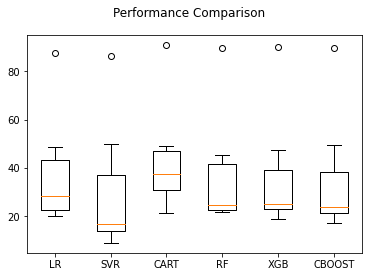

In [61]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_sj)
ax.set_xticklabels(names)
plt.show()

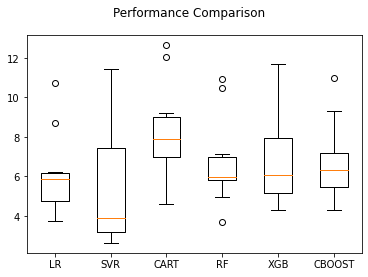

In [62]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_iq)
ax.set_xticklabels(names)
plt.show()

# Hyperparameter Tuning - Tuning SVM

For San Juan

In [120]:
scaler = StandardScaler().fit(X_sj_train)
rescaledX_sj = scaler.transform(X_sj_train)

scaler = StandardScaler().fit(X_iq_train)
rescaledX_iq = scaler.transform(X_iq_train)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVR()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(mean_absolute_error), cv=kfold)


grid_result = grid.fit(rescaledX_sj, Y_sj_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print(param)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 28.646611 using {'C': 2.0, 'kernel': 'poly'}
27.840474 with: {'C': 0.1, 'kernel': 'linear'}
27.753210 with: {'C': 0.1, 'kernel': 'poly'}
27.643742 with: {'C': 0.1, 'kernel': 'rbf'}
27.503037 with: {'C': 0.1, 'kernel': 'sigmoid'}
27.858313 with: {'C': 0.3, 'kernel': 'linear'}
28.022973 with: {'C': 0.3, 'kernel': 'poly'}
27.627098 with: {'C': 0.3, 'kernel': 'rbf'}
27.456772 with: {'C': 0.3, 'kernel': 'sigmoid'}
28.009768 with: {'C': 0.5, 'kernel': 'linear'}
28.129864 with: {'C': 0.5, 'kernel': 'poly'}
27.632679 with: {'C': 0.5, 'kernel': 'rbf'}
27.437966 with: {'C': 0.5, 'kernel': 'sigmoid'}
27.986574 with: {'C': 0.7, 'kernel': 'linear'}
28.189915 with: {'C': 0.7, 'kernel': 'poly'}
27.683719 with: {'C': 0.7, 'kernel': 'rbf'}
27.523973 with: {'C': 0.7, 'kernel': 'sigmoid'}
28.048035 with: {'C': 0.9, 'kernel': 'linear'}
28.265004 with: {'C': 0.9, 'kernel': 'poly'}
27.683510 with: {'C': 0.9, 'kernel': 'rbf'}
27.488865 with: {'C': 0.9, 'kernel': 'sigmoid'}
28.075669 with: {'C': 1.0, 'k

For Iquitos

In [121]:
scaler = StandardScaler().fit(X_sj_train)
rescaledX_sj = scaler.transform(X_sj_train)

scaler = StandardScaler().fit(X_iq_train)
rescaledX_iq = scaler.transform(X_iq_train)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVR()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(mean_absolute_error), cv=kfold)


grid_result = grid.fit(rescaledX_iq, Y_iq_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print(param)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 6.637858 using {'C': 2.0, 'kernel': 'sigmoid'}
5.462074 with: {'C': 0.1, 'kernel': 'linear'}
5.555716 with: {'C': 0.1, 'kernel': 'poly'}
5.565017 with: {'C': 0.1, 'kernel': 'rbf'}
5.492539 with: {'C': 0.1, 'kernel': 'sigmoid'}
5.508252 with: {'C': 0.3, 'kernel': 'linear'}
5.568211 with: {'C': 0.3, 'kernel': 'poly'}
5.458239 with: {'C': 0.3, 'kernel': 'rbf'}
5.551381 with: {'C': 0.3, 'kernel': 'sigmoid'}
5.520962 with: {'C': 0.5, 'kernel': 'linear'}
5.603098 with: {'C': 0.5, 'kernel': 'poly'}
5.401070 with: {'C': 0.5, 'kernel': 'rbf'}
5.625412 with: {'C': 0.5, 'kernel': 'sigmoid'}
5.527574 with: {'C': 0.7, 'kernel': 'linear'}
5.640573 with: {'C': 0.7, 'kernel': 'poly'}
5.387587 with: {'C': 0.7, 'kernel': 'rbf'}
{'C': 0.7, 'kernel': 'rbf'}
5.686731 with: {'C': 0.7, 'kernel': 'sigmoid'}
5.544977 with: {'C': 0.9, 'kernel': 'linear'}
5.665848 with: {'C': 0.9, 'kernel': 'poly'}
5.397268 with: {'C': 0.9, 'kernel': 'rbf'}
5.817104 with: {'C': 0.9, 'kernel': 'sigmoid'}
5.549074 with: {'C'

# Application of SVC on dataset

In [143]:
def general_model(model):
    """
    returns the mean absolute error combined for both the cities.
    """
    
    (X_sj_train, X_sj_test, Y_sj_train, Y_sj_test), (X_iq_train, X_iq_test, Y_iq_train, Y_iq_test) = split(X_sj, X_iq, y_sj, y_iq)
    scaler = StandardScaler().fit(X_sj_train)
    X_sj_train = scaler.transform(X_sj_train)

    scaler = StandardScaler().fit(X_iq_train)
    X_iq_train = scaler.transform(X_iq_train)

    scaler = StandardScaler().fit(X_sj_test)
    X_sj_test = scaler.transform(X_sj_test)

    scaler = StandardScaler().fit(X_iq_test)
    X_iq_test = scaler.transform(X_iq_test)
        
    # Model for Sj for different hyperparameters
    clt = SVR(C = 1.7, kernel = 'sigmoid')
    clt.fit(X_sj_train, Y_sj_train)
    
    results_sj = cross_val_score(clt, X_sj_train, Y_sj_train, cv = 5, scoring=make_scorer(mean_absolute_error))    
    print(results_sj)
    print("Mean Absolute Error for Sj: %f" %results_sj.mean())
    print("------------------------------------------------------------------------------------------------")
    cv_splits = TimeSeriesSplit(n_splits=3).split(X_sj_train, Y_sj_train)
    time_series_results_sj = cross_val_score(clt, X_sj_train, Y_sj_train, cv=cv_splits, scoring=make_scorer(mean_absolute_error))
    print(time_series_results_sj)
    print("Mean Absolute Error for Sj using time Series: %f" %time_series_results_sj.mean())
    print("------------------------------------------------------------------------------------------------")
    
    Y_sj_pred = clt.predict(X_sj_test)
    
    #Model for Iq for different hyperparameters
    model = SVR(C = 0.7, kernel= 'rbf')
    model.fit(X_iq_train, Y_iq_train)
    
    results_iq = cross_val_score(model, X_iq_train, Y_iq_train, cv = 5, scoring=make_scorer(mean_absolute_error))    
    
    print(results_iq)
    print("Mean Absolute Error for Iq: %f" %results_iq.mean())        
    print("------------------------------------------------------------------------------------------------")
    cv_splits = TimeSeriesSplit(n_splits=3).split(X_iq_train, Y_iq_train)
    time_series_results_iq = cross_val_score(model, X_iq_train, Y_iq_train, cv=cv_splits, scoring=make_scorer(mean_absolute_error))
    print(time_series_results_iq)
    print("Mean Absolute Error for iq using time Series: %f" %time_series_results_iq.mean())
    print("------------------------------------------------------------------------------------------------")

    Y_iq_pred = model.predict(X_iq_test)
    
    Y_pred = np.concatenate([Y_sj_pred, Y_iq_pred])
    Y_pred = Y_pred.astype(int).clip(0)
    
    Y_test = Y_sj_test.append(Y_iq_test)
    
    return print("Overall Mean Absolute Error: %f" %mean_absolute_error(Y_test, Y_pred))

In [144]:
general_model(SVR())

[27.35866611 46.95593557 14.47416427 31.24728217 17.96456727]
Mean Absolute Error for Sj: 27.600123
------------------------------------------------------------------------------------------------
[39.61165763 29.66869064 19.13497475]
Mean Absolute Error for Sj using time Series: 29.471774
------------------------------------------------------------------------------------------------
[5.07386784 7.82734622 6.75133627 5.0881959  3.33696782]
Mean Absolute Error for Iq: 5.615543
------------------------------------------------------------------------------------------------
[5.98385243 8.93225831 3.85990804]
Mean Absolute Error for iq using time Series: 6.258673
------------------------------------------------------------------------------------------------
Overall Mean Absolute Error: 14.151099


# Run the following Steps For Testing 

In [166]:
#Testing the model prediction
Xtest = pd.read_csv(r'E:\Python\DengAI\dengue_features_test.csv')
Xtest.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [167]:
Xtest.shape

(416, 24)

In [168]:
label_list = [
    'city',
    'year',
    'weekofyear'
]
dengue_label_test = Xtest[label_list]

In [169]:
Xtest_sj, Xtest_iq = process(Xtest)

In [170]:
Xtest_sj

,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,sj
0,-1.022360,-1.329535,-1.202002,1.150400,-0.220788,-0.613221,-0.580182,-0.810494,0.238429,-0.341282,-0.500163,1.150400,-0.641981,-0.561605,-0.678175,-0.328620,0.399890,-0.371713,1.194332,True
1,-0.976118,-1.591652,-1.407634,-0.728707,-0.232489,-0.607741,-0.666444,-0.907362,0.347425,-0.413849,-0.575003,-0.728707,-0.723582,-0.719264,-1.052428,-0.941514,-1.314836,-0.081759,0.010337,True
2,-1.002678,-0.716813,-1.198425,-0.981948,0.436390,0.006040,-0.067301,-0.455311,0.238429,-0.776891,-0.569575,-0.981948,-0.156956,-0.193735,0.467977,-0.030928,0.140083,0.266187,-0.895752,True
3,-1.029237,-1.055833,-0.826513,-1.086090,0.596297,0.291010,-0.661756,-0.196996,0.420089,-0.816250,-1.282693,-1.086090,-0.733668,-0.217990,0.573235,-0.649660,0.399890,1.194041,-0.973913,True
4,-0.604523,-1.842244,-1.368437,-1.064465,0.657724,0.247168,-0.427349,-0.423021,0.565417,-0.771971,-1.137665,-1.064465,-0.501699,-0.444372,0.210677,-0.316945,0.399890,0.556141,1.451974,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-1.003033,-0.650167,-1.049722,-0.222793,-0.099883,-0.355653,-0.482669,-0.745915,0.238429,-0.809075,-0.500357,-0.222793,-0.598888,-0.509052,0.152200,0.033280,0.711659,0.266187,-0.881277,True
256,-1.441620,-0.044113,-0.246948,-0.899716,-0.532802,-0.914632,-0.513611,-0.681336,0.056769,0.456754,-0.110837,-0.899716,-0.665819,-0.646498,-0.584611,-0.497895,0.399890,0.266187,-0.473103,True
257,-0.946239,-0.189471,-0.339342,-1.086090,0.164353,-0.015881,-0.303582,-0.681336,0.638080,-0.846999,-0.567442,-1.086090,-0.453105,-0.549478,0.456281,0.103325,0.140083,0.556141,-0.710481,True
258,-0.665942,-0.920430,-1.379947,-1.086090,0.065874,-0.218648,-0.480794,-0.875072,0.565417,-0.832649,-0.650426,-1.086090,-0.611724,-0.585860,0.304241,-0.375316,-0.431492,0.904086,-0.319676,True


In [171]:
Xtest_iq.shape

(156, 20)

In [172]:
def model_test(X_sj_test,X_iq_test):
   
    scaler = StandardScaler().fit(X_sj_test)
    X_sj_test = scaler.transform(X_sj_test)

    scaler = StandardScaler().fit(X_iq_test)
    X_iq_test = scaler.transform(X_iq_test)
    
    # Model for Sj for different hyperparameters
    clt = SVR(C = 1.7, kernel = 'sigmoid')
    clt.fit(X_sj_train, Y_sj_train)
    
    Y_sj_pred = clt.predict(X_sj_test)
    
    #Model for Iq for different hyperparameters
    model = SVR(C = 0.7, kernel= 'rbf')
    model.fit(X_iq_train, Y_iq_train)
    
    Y_iq_pred = model.predict(X_iq_test)
    
    Y_pred = np.concatenate([Y_sj_pred, Y_iq_pred])
    Y_pred = Y_pred.astype(int).clip(0)
    
    return Y_pred

In [173]:
y_pred = model_test(Xtest_sj,Xtest_iq) 

In [175]:
y_pred= list(y_pred)
dengue_label_test['total_cases'] = y_pred

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [176]:
dengue_label_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         416 non-null    object
 1   year         416 non-null    int64 
 2   weekofyear   416 non-null    int64 
 3   total_cases  416 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.1+ KB


In [178]:
dengue_label_test.to_csv(r'E:\Python\DengAI\SVR.csv', index=False)